In [519]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [520]:
 #Reading data
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\hWFH_COMBINE.csv',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0))
df.head()

created_at                                               text  \
0  30-01-2022 09:08  b'Giveaway of the Day : PDF Mixer Pro 1.4.1 ht...   
1  30-01-2022 09:04  b'#Russia #HomeOffice UK urged to suspend \xe2...   
2  30-01-2022 09:00  b'Have you tried adding greenery to your desk?...   
3  30-01-2022 08:49  b'Calls for UK to suspend \xe2\x80\x98golden v...   
4  30-01-2022 08:40  b'NBR Yoga Set 7 Pcs\n\xe2\x9e\xa2\xe2\x9e\xa2...   

          screen_name                     location  
0         b'KostNixx'                          b''  
1   b'videoactualize'  b'Somerset, United Kingdom'  
2       b'FlexispotU'           b'London, England'  
3  b'UKVisaBarrister'                b'London, UK'  
4   b'make_home_cozy'                          b''

In [521]:
df.columns
tweet=df.copy()

In [522]:
tweet.shape

(6719, 4)

In [523]:
#check missing values
tweet.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       created_at   text  screen_name  location
0          False  False        False     False
1          False  False        False     False
2          False  False        False     False
3          False  False        False     False
4          False  False        False     False
...          ...    ...          ...       ...
6714       False  False        False     False
6715       False  False        False     False
6716       False  False        False     False
6717       False  False        False     False
6718       False  False        False     False

[6719 rows x 4 columns]>

In [524]:
# data preprocessing
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head(10)

0    b giveaway of the day pdf mixer pro 1 4 1 via ...
1    b russia homeoffice uk urged to suspend xe2 x8...
2    b have you tried adding greenery to your desk ...
3    b calls for uk to suspend xe2 x80 x98golden vi...
4    b nbr yoga set 7 pcs n xe2 x9e xa2 xe2 x9e xa2...
5    b my etsy shop antique numbering machines stam...
6    b choose the best folding desks design ideas f...
7    b adjustable folding laptop stand n n 29 99 n ...
8    b chair elly n n moderndesign officespace work...
9    b xf0 x9f x92 xbc hurry 25 off lazada home off...
Name: text, dtype: object

In [525]:
#some more preprocessing deletion X..../b 
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("([' ']f[' ']|[' ']e[' ']|[' ']n[' ']|[' ']x[' ']|[' ']x|x[a-z][0-9])|([0-9])|(b[' '])", " ", tweet['text'][i]).split()).lower()
tweet['text'].head(30)

0     giveaway of the day pdf mixer pro via spartipp...
1     russia homeoffice uk urged to suspend e golden...
2     have you tried adding greenery to your desk f ...
3     calls for uk to suspend e golden visas e after...
4     nbr yoga set pcs e a e e a e e a e e a e e a e...
5     my etsy shop antique numbering machines stampe...
6     choose the best folding desks design ideas for...
7     adjustable folding laptop stand n n smarthome ...
8     chair elly n moderndesign officespace workspac...
9     f bc hurry off lazada home office desks amp ch...
10    chair elly ms n moderndesign officespace works...
11    deuxmontagnes bakerlake california this might ...
12    biancoaris nfasa stone build a natural focused...
13    handcrafted office sign antiqued distressed mi...
14    my twister movie posters hung in my home offic...
15    chair elly ms n moderndesign officespace works...
16    hardworking dining rooms serve as an art galle...
17    get my art printed on awesome products sup

In [526]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

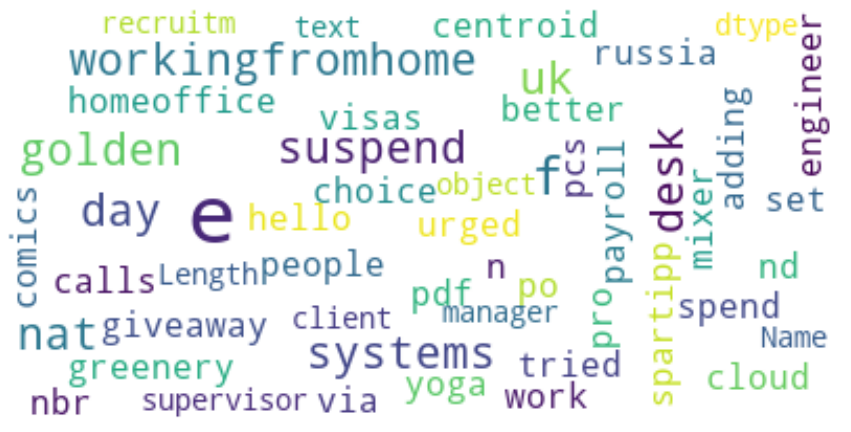

In [527]:
#wordcloud without removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [528]:
#Removing Stop Words
tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head() 

0    giveaway day pdf mixer pro via spartipp softwa...
1    russia homeoffice uk urged suspend e golden vi...
2    tried adding greenery desk f f d green deskset...
3    calls uk suspend e golden visas e fast trackin...
4    nbr yoga set pcs e e e e e e e e e e e massage...
Name: text, dtype: object

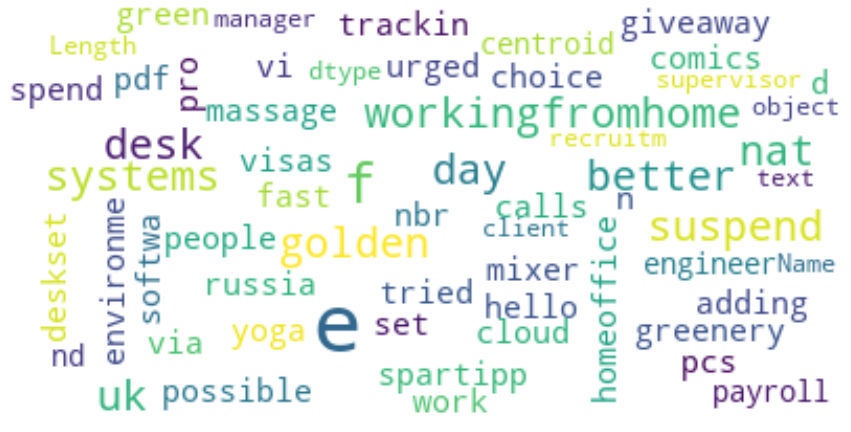

In [529]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [530]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

created_at                                               text  \
0  30-01-2022 09:08  giveaway day pdf mixer pro via spartipp softwa...   
1  30-01-2022 09:04  russia homeoffice uk urged suspend e golden vi...   
2  30-01-2022 09:00  tried adding greenery desk f f d green deskset...   
3  30-01-2022 08:49  calls uk suspend e golden visas e fast trackin...   
4  30-01-2022 08:40  nbr yoga set pcs e e e e e e e e e e e massage...   

          screen_name                     location sentiment  polarity  
0         b'KostNixx'                          b''   neutral       0.0  
1   b'videoactualize'  b'Somerset, United Kingdom'  positive  0.166667  
2       b'FlexispotU'           b'London, England'  negative      -0.2  
3  b'UKVisaBarrister'                b'London, UK'  positive  0.166667  
4   b'make_home_cozy'                          b''   neutral       0.0

In [531]:
tweet['sentiment'].value_counts()

positive    3208
neutral     2499
negative    1012
Name: sentiment, dtype: int64

In [532]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.head(10)
sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\hWFH_COMBINE pol sent.csv")

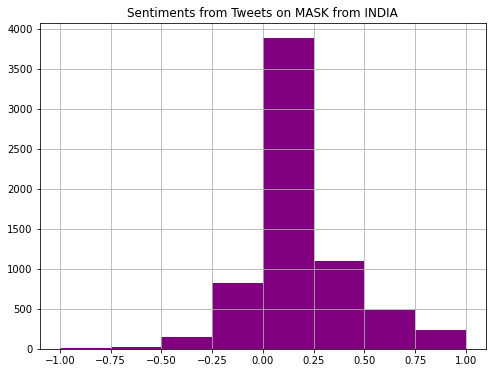

In [533]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on MASK from INDIA")
plt.show()

In [534]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(6719,)

In [535]:
x=tweet['text'].values
x.shape

(6719,)

In [536]:
from sklearn.model_selection import train_test_split

In [537]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(5375,)
(5375,)
(1344,)


(1344,)

positive    3208
neutral     2499
negative    1012
Name: sentiment, dtype: int64


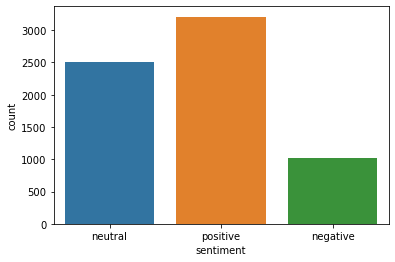

In [538]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

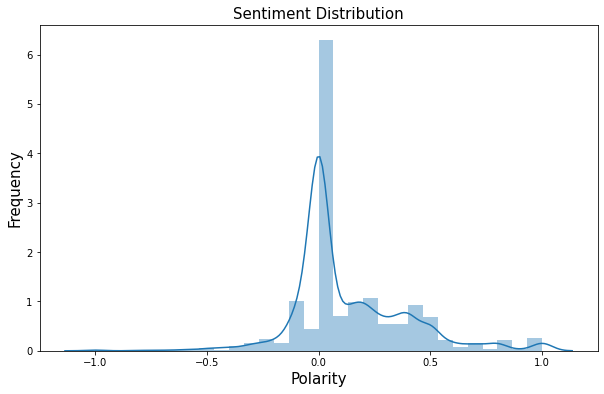

In [539]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

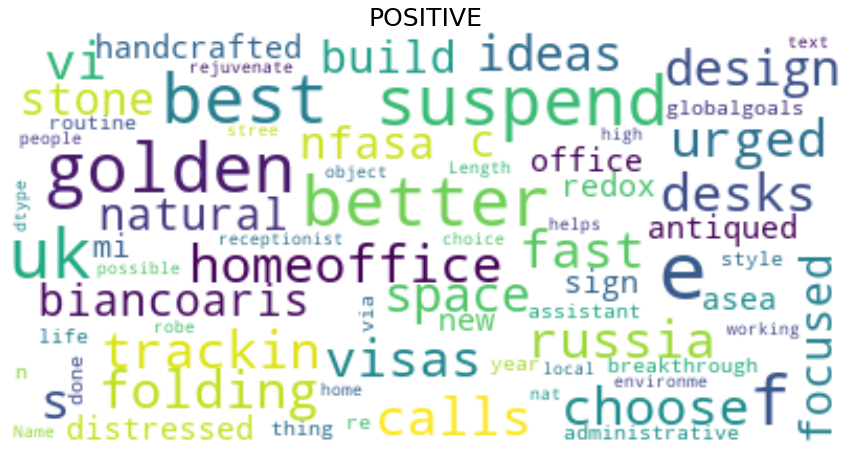

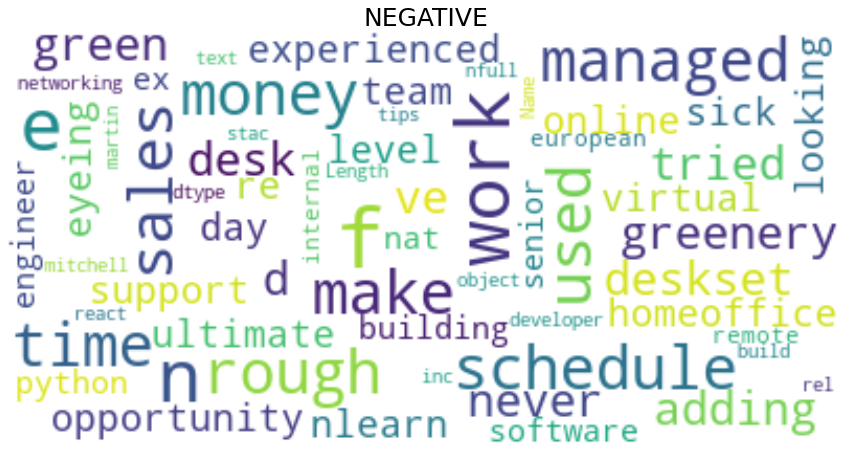

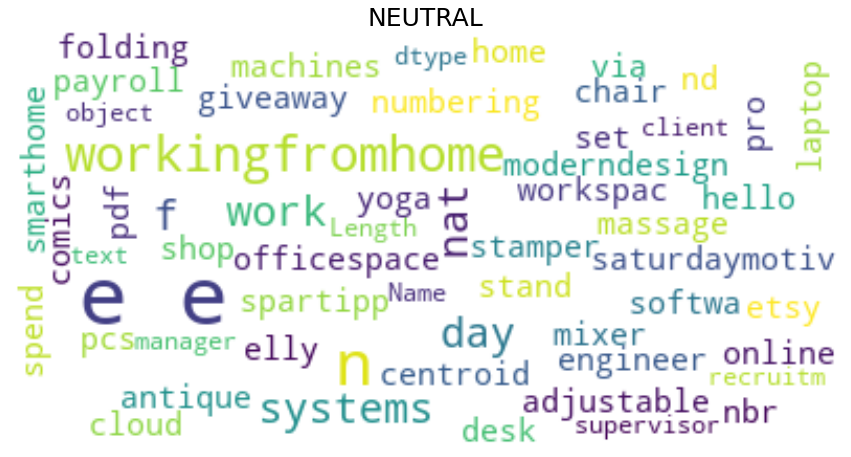

In [540]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [541]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

created_at  \
sentiment                                                      
negative   30-01-2022 09:0029-01-2022 21:3929-01-2022 19:...   
neutral    30-01-2022 09:0830-01-2022 08:4030-01-2022 08:...   
positive   30-01-2022 09:0430-01-2022 08:4930-01-2022 08:...   

                                                        text  \
sentiment                                                      
negative   tried adding greenery desk f f d green deskset...   
neutral    giveaway day pdf mixer pro via spartipp softwa...   
positive   russia homeoffice uk urged suspend e golden vi...   

                                                 screen_name  \
sentiment                                                      
negative   b'FlexispotU'b'daniellejallard'b'ProdVoice'b'a...   
neutral    b'KostNixx'b'make_home_cozy'b'bleakhouse302'b'...   
positive   b'videoactualize'b'UKVisaBarrister'b'KreateCub...   

                                                    location     polarity  
sentiment                                                                  
negative   b'London, England'b'Ottawa, Canada'b'New Jerse...  -170.878089  
neutral    b''b''b'Delaware, USA'b''b''b'Philippines'b''b...     0.000000  
positive   b'Somerset, United Kingdom'b'London, UK'b'Indi...  1039.947424

In [542]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [543]:
words

['giveaway',
 'day',
 'pdf',
 'mixer',
 'pro',
 'via',
 'spartipp',
 'software',
 'tools',
 'tool',
 'e',
 'russia',
 'homeoffice',
 'uk',
 'urged',
 'suspend',
 'e',
 'golden',
 'visas',
 'e',
 'fast',
 'tracking',
 'russian',
 'millionaires',
 'liberal',
 'democra',
 'e',
 'tried',
 'adding',
 'greenery',
 'desk',
 'f',
 'f',
 'd',
 'green',
 'desksetup',
 'homeoffice',
 'officedesk',
 'homedecor',
 'plants',
 'calls',
 'uk',
 'suspend',
 'e',
 'golden',
 'visas',
 'e',
 'fast',
 'tracking',
 'russian',
 'millionaires',
 'russia',
 'e',
 'nbr',
 'yoga',
 'set',
 'pcs',
 'e',
 'e',
 'e',
 'e',
 'e',
 'e',
 'e',
 'e',
 'e',
 'e',
 'e',
 'massage',
 'relax',
 'makehomecozy',
 'home',
 'homeliving',
 'e',
 'etsy',
 'shop',
 'antique',
 'numbering',
 'machines',
 'stamper',
 'numberedstamper',
 'homeoffice',
 'decor',
 'choose',
 'best',
 'folding',
 'desks',
 'design',
 'ideas',
 'space',
 'smart',
 'home',
 'offices',
 'officedesk',
 'e',
 'adjustable',
 'folding',
 'laptop',
 'stand',


In [544]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

word  frequency
0                 e       6744
1                 f       4746
2      workfromhome       1411
3                 n       1167
4              home        904
5            remote        824
6              work        819
7                 d        788
8   workingfromhome        696
9                 b        691
10                s        636
11       homeoffice        586
12              new        544
13          working        513
14                c        497
15           office        469
16               jo        380
17                t        338
18              nat        326
19            today        322

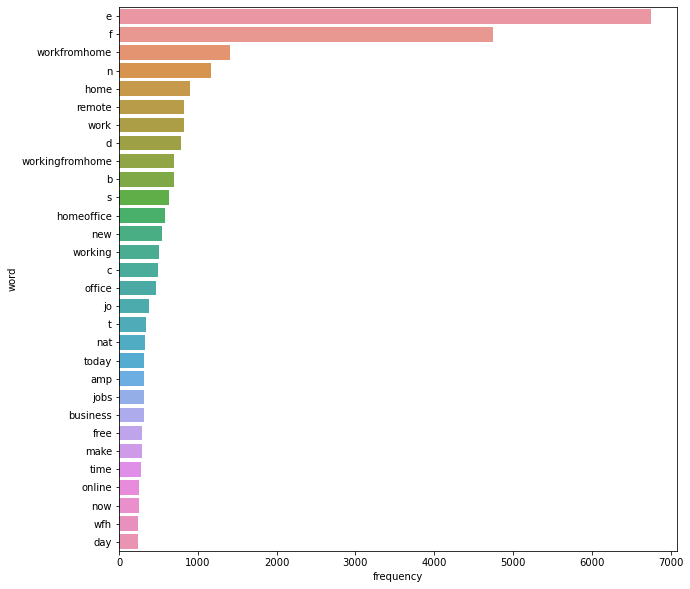

In [545]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [546]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_Final_sent_analysis.csv',index=False)

In [547]:
sentiment_df.head()

text  polarity sentiment
0  giveaway day pdf mixer pro via spartipp softwa...       0.0   neutral
1  russia homeoffice uk urged suspend e golden vi...  0.166667  positive
2  tried adding greenery desk f f d green deskset...      -0.2  negative
3  calls uk suspend e golden visas e fast trackin...  0.166667  positive
4  nbr yoga set pcs e e e e e e e e e e e massage...       0.0   neutral

In [548]:
sentiment_df.describe()

text  polarity sentiment
count                                                6719    6719.0      6719
unique                                               5852     557.0         3
top     new underground affiliate marketing system gua...       0.0  positive
freq                                                   76    2499.0      3208

In [549]:
sentiment_df.groupby('sentiment').size()

sentiment
negative    1012
neutral     2499
positive    3208
dtype: int64

In [550]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000000     10
-0.800000      5
-0.766667      1
-0.714286      1
-0.700000      2
            ... 
 0.850000      4
 0.900000     10
 0.916667      1
 0.925000      1
 1.000000    112
Length: 557, dtype: int64


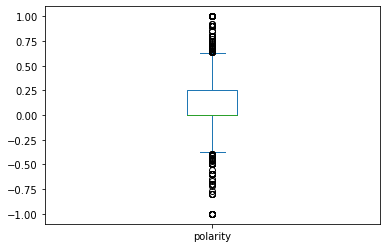

In [551]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()


In [552]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

sentiment  polarity                                               text
0   neutral       0.0  giveaway day pdf mixer pro via spartipp softwa...
1  positive  0.166667  russia homeoffice uk urged suspend e golden vi...
2  negative      -0.2  tried adding greenery desk f f d green deskset...
3  positive  0.166667  calls uk suspend e golden visas e fast trackin...
4   neutral       0.0  nbr yoga set pcs e e e e e e e e e e e massage...
5   neutral       0.0  etsy shop antique numbering machines stamper n...
6  positive  0.607143  choose best folding desks design ideas space s...
7   neutral       0.0  adjustable folding laptop stand n n smarthome ...
8   neutral       0.0  chair elly n moderndesign officespace workspac...
9   neutral       0.0  f bc hurry lazada home office desks amp chairs...

In [553]:
dataset2.describe()#dataset2.hist()
#plt.show()

sentiment  polarity                                               text
count       6719    6719.0                                               6719
unique         3     557.0                                               5852
top     positive       0.0  new underground affiliate marketing system gua...
freq        3208    2499.0                                                 76

In [554]:
dataset2.describe()

sentiment  polarity                                               text
0   neutral       0.0  giveaway day pdf mixer pro via spartipp softwa...
1  positive  0.166667  russia homeoffice uk urged suspend e golden vi...
2  negative      -0.2  tried adding greenery desk f f d green deskset...
3  positive  0.166667  calls uk suspend e golden visas e fast trackin...
4   neutral       0.0  nbr yoga set pcs e e e e e e e e e e e massage...
5   neutral       0.0  etsy shop antique numbering machines stamper n...
6  positive  0.607143  choose best folding desks design ideas space s...
7   neutral       0.0  adjustable folding laptop stand n n smarthome ...
8   neutral       0.0  chair elly n moderndesign officespace workspac...
9   neutral       0.0  f bc hurry lazada home office desks amp chairs...

In [555]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [556]:
df1.head()

text
0  uploaded short new video new cryptocurrency ai...
1  electrical engineer global standards nat meta ...
2  free ebook writing cash shows different ways s...
3                        love love work workfromhome
4  ve worked remotely yrs career great workfromho...

In [557]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [558]:
df_train.head()

text sentiment
0  uploaded short new video new cryptocurrency ai...  positive
1  electrical engineer global standards nat meta ...  positive
2  free ebook writing cash shows different ways s...  positive
3                        love love work workfromhome  positive
4  ve worked remotely yrs career great workfromho...  positive

In [559]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [560]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [561]:
df_test.head()

text sentiment
0  working home zoom video calls s well good find...  positive
1  problem every gtd app faces n nooffice homeoff...  positive
2  join us work home full time marketing associat...  positive
3  want senior ruby rails react developer social ...  positive
4  internet millionaire reveals exactly made join...  positive

In [562]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [563]:
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [564]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [565]:
df_train.head()
#punctuations are removed from news column in train dataset

text sentiment
0  uploaded short new video new cryptocurrency ai...  positive
1  electrical engineer global standards nat meta ...  positive
2  free ebook writing cash shows different ways s...  positive
3                        love love work workfromhome  positive
4  ve worked remotely yrs career great workfromho...  positive

In [566]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [567]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [568]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [569]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['uploaded', 'short', 'new', 'video', 'new', 'cryptocurrency', 'ai', 'bot', 'helps', 'earn', 'profits', 'whether', 'markets', 'e']
Sentence after removing stopwords: ['electrical', 'engineer', 'global', 'standards', 'nat', 'meta', 'nmeta', 'seeking', 'electrical', 'engineer', 'strong', 'project', 'management', 'e']
Sentence after removing stopwords: ['free', 'ebook', 'writing', 'cash', 'shows', 'different', 'ways', 'starting', 'writing', 'earning', 'money', 'st', 'e']
Sentence after removing stopwords: ['love', 'love', 'work', 'workfromhome']
Sentence after removing stopwords: ['worked', 'remotely', 'yrs', 'career', 'great', 'workfromhome', 'wednesdaymotivation', 'n', 'working', 'remotely', 'hu', 'e']
Sentence after removing stopwords: ['hide', 'bathroom', 'day', 'work', 'still', 'work', 'right', 'homeoffice', 'workingfromhome']
Sentence after removing stopwords: ['true', 'immigrationupdate', 'immigrationnews', 'immigrationchanges', 'uk', 'immigration

Sentence after removing stopwords: ['f', 'elemeno', 'hiring', 'remote', 'client', 'success', 'associate', 'elemeno', 'remotework', 'remotejo', 'workfromhome', 'zendesk', 'e']
Sentence after removing stopwords: ['looking', 'top', 'talent', 'work', 'remotely', 'home', 'new', 'hires', 'collaborate', 'closely', 'e']
Sentence after removing stopwords: ['homeoffice', 'n', 'e', 'c', 'boosts', 'short', 'term', 'productivity', 'higher', 'focus', 'efficiency', 'n', 'e', 'c', 'hurts', 'long', 'term', 'productivity', 'low', 'e']
Sentence after removing stopwords: ['logcabins', 'ideal', 'workingfromhome', 'provide', 'quiet', 'location', 'focus', 'without', 'distractions']
Sentence after removing stopwords: ['cheap', 'flights', 'f', 'f', 'f', 'f', 'london', 'zigitrip', 'zigi', 'workfromhome', 'try', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'f']
Sentence after removing stopwords: ['anyone', 'know', 'genuine', 'workingfromhome', 'jobs', 'hiring', 'particularly', 'night', 'shift', 'limited', 'u', 'w', 'e']


Sentence after removing stopwords: ['makemoneyonline', 'workfromhome', 'know', 'ideal', 'website', 'visitors', 'found', 'social', 'networking', 'e']
Sentence after removing stopwords: ['settle', 'drink', 'coffee', 'enjoy', 'n', 'designonabudget', 'designtips', 'homedesigntrends', 'homeoffice', 'e']
Sentence after removing stopwords: ['workshop', 'free', 'dank', 'manifestation', 'reprogramming', 'tool', 'takes', 'days', 'reprogram', 'reality', 'thi', 'e']
Sentence after removing stopwords: ['latest', 'column', 'nme', 'frig', 'workfromhome', 'n']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['primary', 'goal', 'sales', 'development', 'engage', 'pre', 'sales', 'leads', 'outbound', 'calls', 'persona', 'e']
Sentence after removing stopwords: ['working', 'home', 'right', 'request', 'remote', 'working', 'bill', 'becoming', 'law', 'via', 'e']
Sentence after removing stopwords: ['rip', 'young', 'dolp

Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['youtube', 'vid', 'might', 'free', 'make', 'seconds', 'workathome', 'workfromhome', 'e']
Sentence after removing stopwords: ['data', 'entry', 'associate', 'nat', 'carerx', 'corporation', 'nthe', 'pharmacy', 'assistantdata', 'entry', 'associate', 'plays', 'important', 'role', 'th', 'e']
Sentence after removing stopwords: ['want', 'work', 'c', 'fort', 'washington', 'pa', 'view', 'latest', 'opening', 'workfromhome', 'jobhunt']
Sentence after removing stopwords: ['working', 'home', 'nif', 'thinking', 'upgrading', 'home', 'office', 'steer', 'clear', 'time', 'money', 'wasting', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stop

Sentence after removing stopwords: ['make', 'first', 'dollars', 'online', 'never', 'made', 'money', 'online', 'chance', 'workfromhome']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['remove', 'hassle', 'increase', 'productivity', 'n', 'n', 'hassle', 'free', 'remoteservices', 'workfromhome']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['work', 'pu', 'offers', 'pubs', 'bars', 'amp', 'restaurant', 'near', 'mywateringhole', 'pubs', 'publife', 'workfrompu', 'workfromhome', 'e']
Sentence after removing stopwords: ['context', 'help', 'see', 'accurate', 'steps', 'effective', 'faster', 'efficient', 'nothing', 'e']
Sentence after removing stopwords: ['workingfromhome',

Sentence after removing stopwords: ['town', 'planning', 'consultant', 'officer', 'urban', 'planner', 'uk', 'wide', 'nat', 'capita', 'nwere', 'supporting', 'clients', 'adapt']
Sentence after removing stopwords: ['first', 'steps', 'always', 'baby', 'steps', 'via', 'n', 'motivation', 'sales', 'salestraining', 'e']
Sentence after removing stopwords: ['workfromhome', 'mlm', 'internetmarketing', 'construct', 'influence', 'plus', 'generate', 'greater', 'market', 'using', 'e']
Sentence after removing stopwords: ['full', 'stack', 'developer', 'indigo', 'slate', 'nat', 'indigo', 'slate', 'full', 'stack', 'developers', 'devoted', 'problem', 'solvers', 'responsi', 'e']
Sentence after removing stopwords: ['write', 'comment', 'section', 'work', 'home', 'work', 'office', 'better', 'nvisit', 'website']
Sentence after removing stopwords: ['need', 'smartphone', 'computer', 'smarttv', 'good', 'internet', 'connection', 'e', 'nyou', 'e', 'need', 'hig', 'e']
Sentence after removing stopwords: ['vnctalk', 'e

Sentence after removing stopwords: ['fun', 'week', 'friend', 'f', 'f', 'e', 'make', 'priority', 'funfriday', 'fempreneur', 'workingfromhome', 'empowerment', 'e']
Sentence after removing stopwords: ['technical', 'seo', 'manager', 'nat', 'manchester', 'staff', 'ltd', 'nseo', 'manager', 'manchester', 'staff', 'working', 'fast', 'growing', 'digital', 'e']
Sentence after removing stopwords: ['main', 'thing', 'changed', 'years', 'gtd', 'audience', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['freelancers', 'need', 'learn', 'every', 'day', 'f', 'f', 'ntaking', 'absorbing', 'world', 'f', 'f', 'c', 'around', 'throughout', 'journey', 'f', 'f', 'b', 'e', 'e', 'ef', 'b', 'f', 'wil', 'e']
Sentence after removing stopwords: ['chair', 'easy', 'n', 'moderndesign', 'offices

Sentence after removing stopwords: ['real', 'success', 'productivity', 'happens', 'understand', 'things', 'surrounding', 'invisi', 'e']
Sentence after removing stopwords: ['entertainment', 'science', 'history', 'news', 'writer', 'nat', 'static', 'media', 'ngrunge', 'looking', 'enthusiastic', 'hardworking', 'free', 'e']
Sentence after removing stopwords: ['e', 'regoing', 'kick', 'e', 'take', 'look', 'right', 'days', 'cash', 'said', 'e']
Sentence after removing stopwords: ['f', 'b', 'f', 'f', 'keep', 'team', 'family', 'safe', 'ncheck', 'benefits', 'mintsd', 'company', 'n', 'f', 'f', 'e']
Sentence after removing stopwords: ['able', 'begin', 'work', 'day', 'wandering', 'along', 'nearby', 'coffee', 'shop', 'imagine', 'open', 'e']
Sentence after removing stopwords: ['find', 'surprising', 'tool', 'made', 'joyce', 'days', 'online', 'c', 'join', 'e']
Sentence after removing stopwords: ['workingfromhome', 'clean', 'mess']
Sentence after removing stopwords: ['new', 'year', 'resolution', 'organize

Sentence after removing stopwords: ['seamless', 'set', 'nsize', 'l', 'n', 'e', 'ac', 'wonho', 'gymmotivation', 'gymlife', 'running', 'e']
Sentence after removing stopwords: ['work', 'home', 'professional', 'nobviously', 'yes', 'f', 'f', 'n', 'f', 'f', 'read', 'full', 'blog', 'know', 'gt', 'gt', 'e']
Sentence after removing stopwords: ['homeoffice', 'simply', 'fit', 'purpose', 'e', 'matter', 'lose', 'asylum', 'claim', 'appeal', 'e']
Sentence after removing stopwords: ['know', 'lot', 'pritipatel', 'amp', 'history', 'realise', 'totally', 'believable', 'e']
Sentence after removing stopwords: ['funny', 'f', 'f', 'great', 'video', 'nbuilding', 'emotional', 'commitment', 'sense', 'belonging', 'workingfromhome', 'hybridwork', 'wo', 'e']
Sentence after removing stopwords: ['perfect', 'workingfromhome', 'excellent', 'condition', 'c', 'rrp', 'c']
Sentence after removing stopwords: ['kind', 'art', 'good', 'home', 'office', 'take', 'look', 'picks', 'online', 'resources', 'nread', 'full', 'article',

Sentence after removing stopwords: ['biztips', 'workfromhome', 'excellent', 'strategy', 'teach', 'practical', 'ideas', 'tempt', 'people', 'e']
Sentence after removing stopwords: ['real', 'connections', 'nreal', 'results', 'n', 'workingfromhome']
Sentence after removing stopwords: ['today', 'workingfromhome', 'soundtrack', 'includes', 'girl', 'doubt', 'honestly', 'paid', 'much', 'much', 'attention', 'e']
Sentence after removing stopwords: ['learn', 'best', 'practices', 'marketing', 'target', 'audience', 'targetaudience', 'e']
Sentence after removing stopwords: ['latest', 'amp', 'greatest', 'movies', 'tv', 'hu', 'houston', 'sanantonio', 'riverside', 'e']
Sentence after removing stopwords: ['good', 'sunday', 'morning', 'workingfromhome', 'today', 'workingmom', 'workingout', 'staying', 'fit', 'healthy', 'e']
Sentence after removing stopwords: ['good', 'start', 'got', 'another', 'pick', 'ufc', 'fight', 'hit', 'dms', 'squid', 'game', 'play', 'days', 'e']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['turning', 'part', 'home', 'new', 'office', 'space', 'major', 'hurdle', 'goinghomebased', 'homebased', 'workfromhome', 'e']
Sentence after removing stopwords: ['jan', 'new', 'year', 'full', 'opportunities', 'problem', 'many', 'people', 'nearly', 'year', 'e']
Sentence after removing stopwords: ['two', 'new', 'exciting', 'opportunities', 'opened', 'join', 'billi', 'team', 'nwe', 'looking', 'ui', 'ux', 'designer', 'vp', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['cc', 'e', 'ing', 'colleague', 'e', 'cyou', 'e', 'incompetent', 'e', 'making', 'sure', 'people', 'witness', 'ur', 'huge', 'e', 'e']
Sentence after removing stopwords: ['fun', '

Sentence after removing stopwords: ['back', 'work', 'tomorrow', 'e', 'fancy', 'new', 'monitor', 'make', 'productive', 'great', 'guide', 'work', 'hom', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'mid', 'market', 'first', 'order', 'account', 'executive', 'new', 'york', 'boston', 'washington', 'dc', 'e']
Sentence after removing stopwords: ['content', 'writer', 'digital', 'shift', 'nwe', 'looking', 'talented', 'writer', 'exceptional', 'critical', 'thinking', 'analysi', 'e']
Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'deliver', 'f', 'f', 'c', 'f', 'f', 'f', 'b', 'expertise', 'f', 'f', 'f', 'f', 'advanced', 'f', 'f', 'c', 'f', 'f', 'c', 'research', 'f', 'f', 'development', 'tracking', 'f', 'f', 'c', 'main', 'space', 'f', 'f', 'f', 'f', 'b', 'program', 'develop', 'e']
Sentence after removing stopwords: ['look', 'free', 'paid', 'seconds', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['build', 'bridge', 'seeking', 'hot',

Sentence after removing stopwords: ['nice', 'video', 'related', 'free', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'java', 'software', 'engineer', 'solutions', 'workfromhome', 'allotherremote', 'n']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['new', 'l', 'cloning', 'process', 'launches', 'online', 'lifestyle', 'business', 'within', 'hours', 'even', 'though', 'e']
Sentence after removing stopwords: ['home', 'based', 'working', 'become', 'increasingly', 'popular', 'last', 'years', 'obvious', 'reasons', 'n', 'f', 'f', 'bc', 'f', 'f', 'f', 'f', 'f', 'b', 'f', 'f', 'nwe', 'e']
Sentence after removing stopwords: ['c', 'panna', 'knows', 'llc', 'talent', 'role', 'available', 'amazing', 'candidates', 'ready', 'demonstrate', 'knowledge', 'ta', 'e']
Sentence after

Sentence after removing stopwords: ['time', 'restock', 'favorite', 'home', 'scents', 'scentsy', 'homefragrance', 'e']
Sentence after removing stopwords: ['today', 'national', 'havefunatworkday', 'ideas', 'make', 'workplace', 'little', 'fun', 'e']
Sentence after removing stopwords: ['drawing', 'calls', 'thinking', 'main', 'character', 'creating', 'future', 'comic', 'book', 'e']
Sentence after removing stopwords: ['c', 'f', 'ef', 'b', 'f', 'working', 'home', 'led', 'significant', 'decrease', 'greenhouse', 'gases', 'due', 'reduced', 'number', 'cars', 'th', 'e']
Sentence after removing stopwords: ['canada', 'among', 'top', 'ten', 'countries', 'live', 'worldwide', 'consulting', 'kuroken', 'e']
Sentence after removing stopwords: ['workfromhome', 'networkmarketingrecruiting', 'mlmleads', 'today', 'times', 'easy', 'loads', 'outstanding', 'pote', 'e']
Sentence after removing stopwords: ['start', 'online', 'business', 'gain', 'freedom', 'ndon', 'know', 'start', 'sure', 'model', 'adopt', 'e']
Sen

Sentence after removing stopwords: ['interested', 'dm', 'f', 'f', 'f', 'love', 'money', 'workingfromhome', 'entrepreneur', 'compound']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['know', 'say', 'hope', 'yes', 'noes', 'okay', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'e']
Sentence after removing stopwords: ['shoutout', 'jc', 'team', 'working', 'magic', 'repairing', 'macbook', 'overnight', 'f', 'f', 'c', 'f', 'f', 'f', 'bd', 'workfromhome']
Sentence after removing stopwords: ['handsome', 'grade', 'ii', 'listed', 'bedroom', 'late', 'georgian', 'house', 'providing', 'spacious', 'accommodation', 'together', 'detac', 'e']
Sentence after removing stopwords: ['happy', 'saturday', 'nenjoy', 'breakfast', 'views', 'homeoffice', 'torre', 'pacheco', 'murcia', 'e', 'ef', 'b', 'f', 'f', 'f', 'c', 'b', 'pool', 'open', 'e']
Sentence after removing

Sentence after removing stopwords: ['working', 'home', 'comfortable', 'organized', 'home', 'office', 'heaven', 'sale', 'save', 'home', 'office', 'furniture', 'e']
Sentence after removing stopwords: ['c', 'senior', 'quality', 'assurance', 'role', 'available', 'amazing', 'candidates', 'ready', 'demonstrate', 'knowledge', 'ta', 'e']
Sentence after removing stopwords: ['new', 'app', 'inspired', 'original', 'behemoth', 'generated', 'well']
Sentence after removing stopwords: ['free', 'download', 'making', 'money', 'online', 'gt', 'gt', 'make', 'time', 'waste', 'e']
Sentence after removing stopwords: ['workfromhome', 'networkmarketingsponsoring', 'homebusiness', 'actually', 'many', 'potential', 'customers', 'social', 'netwo', 'e']
Sentence after removing stopwords: ['critical', 'marketing', 'real', 'estate', 'lives', 'online', 'remote', 'economy', 'make', 'claim', 'di', 'e']
Sentence after removing stopwords: ['proven', 'marketing', 'tips', 'home', 'business', 'success', 'anyone', 'know', 'bu

Sentence after removing stopwords: ['spending', 'time', 'home', 'time', 'homedecor', 'w', 'famous', 'quote', 'throwpillows', 'deals', 'discount', 'e']
Sentence after removing stopwords: ['people', 'provide', 'secure', 'remote', 'support', 'remote', 'pc', 'management', 'pc', 'health', 'monitoring', 'amp', 'alerts', 'e']
Sentence after removing stopwords: ['create', 'figure', 'automated', 'income', 'streams', 'even', 'newbie', 'free', 'training', 'reveals', 'click', 'e']
Sentence after removing stopwords: ['exposed', 'new', 'e', 'csecret', 'system', 'e', 'pays', 'us', 'completing', 'simple', 'online', 'tasks', 'clicks', 'e']
Sentence after removing stopwords: ['thinking', 'starting', 'online', 'business', 'amazon', 'online', 'fba', 'store', 'e', 'better', 'alternative', 'join', 'e']
Sentence after removing stopwords: ['e', 'done', 'bought', 'pair', 'e', 'nthis', 'means', 'settled', 'remote', 'work', 'much', 'four', 'years', 'e', 'e']
Sentence after removing stopwords: ['customer', 'servi

Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['workfromhome', 'networkmarketingrecruiting', 'internetmarketing', 'specific', 'guideline', 'proving', 'much', 'leads', 'yo', 'e']
Sentence after removing stopwords: ['employee', 'working', 'home', 'may', 'able', 'claim', 'tax', 'relief', 'bills', 'pay', 'ar', 'e']
Sentence after removing stopwords: ['first', 'funnel', 'builder', 'pays', 'use', 'nsee', 'details', 'via', 'f', 'f', 'link']
Sentence after removing stopwords: ['recently', 'solarpanels', 'installed', 'home', 'nthis', 'droneshot', 'originally', 'worked', 'ngreat', 'see', 'e']
Sentence after removing stopwords: ['fire', 'risk', 'assessor', 'atk', 'solutions', 'nan', 'excellent', 'opportunity', 'arisen', 'fire', 'risk', 'assessors', 'fire', 'risk', 'consultan', 'e']
Sentence after removing stopwords: ['sign', 'discover', 'earn', 'money', 'writing', 'plus', '

Sentence after removing stopwords: ['pr', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['join', 'remotasks', 'popular', 'secure', 'freelancing', 'platform', 'stable', 'work', 'hours']
Sentence after removing stopwords: ['amid', 'rising', 'number', 'cases', 'lot', 'us', 'back', 'wfh', 'may', 'hectic', 'many', 'us', 'ar', 'e']
Sentence after removing stopwords: ['organizational', 'productivity', 'top', 'social', 'fabric', 'organization', 'n', 'nooffice', 'homeoffice', 'e']
Sentence after removing stopwords: ['f', 'nactually', 'trading', 'market', 'first', 'time', 'long', 'time', 'going', 'well', 'workingfromhome', 'deriv', 'e']
Sentence after removing stopwords: ['limited', 'time', 'save', 'pair', 'mobile', 'pixels', 'trio', 'amp', 'trio', 'max', 'dual', 'screen', 'external', 'monitors', 'new', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'inclu

Sentence after removing stopwords: ['homeoffice', 'uniforms', 'simply', 'classic', 'amp', 'chic', 'blackandwhite', 'sustainablymade', 'navailable', 'thru', 'th', 'e']
Sentence after removing stopwords: ['workfromhome', 'mlm', 'internetmarketing', 'grow', 'authority', 'establish', 'greater', 'target', 'audience', 'e']
Sentence after removing stopwords: ['really', 'appreciate', 'optimhire', 'refer', 'earn', 'partner', 'helping', 'share', 'word', 'us', 'nour', 'miss', 'e']
Sentence after removing stopwords: ['workfromhome', 'homebusiness', 'internetmarketing', 'certainly', 'need', 'experience', 'business', 'lead', 'perhap', 'e']
Sentence after removing stopwords: ['best', 'selling', 'ergonomic', 'chair', 'star', 'reviews', 'around', 'chairs', 'ergonomichair', 'furniture', 'e']
Sentence after removing stopwords: ['love', 'able', 'amp', 'spend', 'little', 'bit', 'time', 'guys', 'lunch', 'break', 'workingfromhome']
Sentence after removing stopwords: ['invest', 'deep', 'cleaning', 'nthe', 'li

Sentence after removing stopwords: ['jameshicks', 'particular', 'daily', 'traffic', 'system', 'method', 'getting', 'traffic', 'actually', 'unique', 'e']
Sentence after removing stopwords: ['want', 'improve', 'home', 'office', 'examples', 'recent', 'projects', 'included', 'new', 'office', 'spaces', 'e']
Sentence after removing stopwords: ['learn', 'workfromhome', 'entrepreneur', 'success', 'affiliatemarketing', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['got', 'wall', 'length', 'desktop', 'office', 'omg', 'much', 'space', 'e', 'know', 'put', 'things', 'diy', 'homeoffice']
Sentence after removing stopwords: ['go', 'space', 'hour', 'epic', 'futuristic', 'space', 'music', 'mix', 'epic', 'sci', 'fi', 'hy', 'via', 'e']
Sentence after removing stopwords: ['new', 'jo', 'kundendienstmitarbeiter', 'portugal', 'location', 'lisbon', 'salary'

Sentence after removing stopwords: ['promote', 'ads', 'free', 'n', 'losangeles', 'houston', 'sanantonio', 'riverside', 'detroit', 'newyork', 'e']
Sentence after removing stopwords: ['something', 'much', 'unanticipated', 'nafter', 'couple', 'months', 'workingfromhome', 'concave', 'curved', 'screen', 'e']
Sentence after removing stopwords: ['love', 'read', 'narrate', 'audiobooks', 'home', 'via', 'workathome', 'workfromhome', 'jobs', 'moms']
Sentence after removing stopwords: ['happiness', 'waking', 'looking', 'clock', 'finding', 'still', 'two', 'hours', 'left', 'sleep', 'charles', 'e']
Sentence after removing stopwords: ['social', 'jacker', 'review', 'online', 'biz', 'must', 'haves', 'onlinebusiness', 'workfromhome']
Sentence after removing stopwords: ['nice', 'video', 'related', 'free', 'paid', 'daily', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['desk', 'booking', 'system', 'gives', 'employees', 'certainty', 'desk', 'available', 'arrive', 'wor

Sentence after removing stopwords: ['f', 'c', 'bfwhere', 'e', 'e', 'work', 'direct', 'impact', 'wellbeing', 'performance', 'nmy', 'thoughts', 'f', 'f', 'e']
Sentence after removing stopwords: ['know', 'never', 'run', 'fresh', 'prospects', 'good', 'news', 'page', 'free', 'report', 'w', 'e']
Sentence after removing stopwords: ['promote', 'ads', 'free', 'n', 'losangeles', 'houston', 'sanantonio', 'riverside', 'detroit', 'newyork', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['successful', 'person', 'asked', 'went', 'particular', 'thing', 'made', 'fortune', 'e']
Sentence after removing stopwords: ['massive', 'news', 'onecoin', 'cryptocurrency', 'onelife', 'network', 'join', 'free', 'monthly', 'fees']
Sentence after removing stopwords: ['really', 'hitting', 'home', 'homeoffice', 'style']
Sentence after removing stopwords:

Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['checklist', 'buying', 'estate', 'nread', 'full', 'article', 'n']
Sentence after removing stopwords: ['many', 'remotejobs', 'opportunities', 'protection', 'website', 'quotes', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['truly', 'great', 'way', 'advertise', 'business', 'via', 'classified', 'ad', 'sites', 'keep', 'posting', 'ads', 'keep', 'making', 'profits', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission

Sentence after removing stopwords: ['build', 'strong', 'team', 'nin', 'employees', 'sense', 'belonging', 'flexibility', 'became', 'evaluated', 'e']
Sentence after removing stopwords: ['step', 'free', 'traffic', 'system', 'makes', 'us', 'per', 'day', 'works', 'even', 'zero', 'tech', 'skills', 'amp', 'zero', 'experience', 'wa', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['great', 'recognition', 'tutorme', 'especially', 'world', 'class', 'product', 'team', 'join', 'crew', 'e']
Sentence after removing stopwords: ['even', 'working', 'home', 'becomes', 'much', 'needed', 'slack', 'offices', 'e']
Sentence after removing stopwords: ['workingfromhome', 'continuing', 'dominate', 'lives', 'nwe', 'provide', 'secure', 'reliable', 'hosted', 'desktops', 'companies', 'e']
Sentence after removing stopwords: ['blogpost', 'use', 'step'

Sentence after removing stopwords: ['write', 'art', 'creating', 'thinking', 'certain', 'kind', 'music', 'puts', 'magic', 'place', 'e']
Sentence after removing stopwords: ['greetings', 'explore', 'latest', 'remote', 'writing', 'jobs', 'gigs', 'best', 'wishes', 'e']
Sentence after removing stopwords: ['f', 'b', 'one', 'best', 'things', 'freelancing', 'opportunity', 'create', 'work', 'space', 'hard', 'e']
Sentence after removing stopwords: ['quick', 'view', 'projects', 'inside', 'nozbe', 'teams', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['back', 'work', 'tomorrow', 'e', 'fancy', 'new', 'monitor', 'make', 'productive', 'great', 'guide', 'work', 'hom', 'e']
Sentence after removing stopwords: ['e', 'really', 'easy', 'enroll', 'consultant', 'thrive', 'life', 'month', 'e', 'extra', 'thrive', 'credit', 'e']
Sentence after removing stopwords: ['stonewater', 'workingfromhome', 'one', 'many', 'benefits', 'working', 'sterling',

Sentence after removing stopwords: ['cybersecurity', 'threats', 'rise', 'many', 'businesses', 'realise', 'employees', 'home', 'office', 'printers', 'e']
Sentence after removing stopwords: ['opportunity', 'f', 'f', 'e', 'nlooking', 'straightforward', 'bs', 'way', 'increase', 'income', 'improve', 'sales', 'skills', 'ngo', 'e']
Sentence after removing stopwords: ['jesuschrist', 'workfromhome', 'biblestudy', 'realitycheck', 'f', 'f', 'f', 'b', 'c', 'ef', 'b', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'n', 'years', 'social', 'media', 'f', 'f', 'f', 'b', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'n', 'embarrassing', 'e']
Sentence after removing stopwords: ['used', 'tools', 'particular', 'one', 'feel', 'free', 'leave', 'comm', 'e']
Sentence after removing stopwords: ['f', 'f', 'project', 'admission', 'hiring', 'remote', 'senior', 'software', 'engineer', 'full', 'stack', 'php', 'web', 'projectadmission', 'e']
Sentence after removing stopwords: ['work', 'home', 'ends', 'tech', 'company', 'warns', 'talent', '

Sentence after removing stopwords: ['smart', 'app', 'plays', 'videos', 'right', 'inside', 'emails', 'drive', 'massive', 'traffic', 'nconversions', 'sales', 'clients', 'e']
Sentence after removing stopwords: ['complete', 'done', 'system', 'gives', 'everything', 'need', 'create', 'thousands', 'per', 'month', 'passive', 'monthly', 'income', 'e']
Sentence after removing stopwords: ['introverts', 'actually', 'win', 'lockdown', 'via', 'worklife', 'consulting', 'kuroken', 'e']
Sentence after removing stopwords: ['check', 'free', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['biztips', 'workfromhome', 'bright', 'businesses', 'enjoy', 'simple', 'easy', 'find', 'copious', 'amounts', 'pag', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['supervisor', 'hard', 'work', 'lol', 'lucy', 'miss', 'go', 'back', 'office',

Sentence after removing stopwords: ['live', 'workshop', 'steps', 'year', 'days', 'smartphone', 'ad', 'digital', 'e']
Sentence after removing stopwords: ['tell', 'us', 'far', 'commute', 'work', 'f', 'f', 'ndo', 'find', 'workfromhome', 'e']
Sentence after removing stopwords: ['biztips', 'workfromhome', 'exactly', 'website', 'targeted', 'traffic', 'statistics', 'shaping']
Sentence after removing stopwords: ['farewell', 'full', 'time', 'office', 'employment', 'business', 'vp', 'businessnews', 'hybridwork', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['brands', 'programme', 'support', 'manager', 'nat', 'marks', 'amp', 'spencer', 'nwe', 'great', 'opportunity', 'brands', 'programme', 'support', 'e']
Sente

Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['main', 'work', 'home', 'benefits', 'find', 'nwork', 'home', 'always', 'topic', 'leaves', 'room', 'e']
Sentence after removing stopwords: ['exposed', 'new', 'e', 'csecret', 'system', 'e', 'pays', 'us', 'completing', 'simple', 'online', 'tasks', 'clicks', 'e']
Sentence after removing stopwords: ['best', 'way', 'manage', 'multiple', 'google', 'adwords', 'accounts', 'across', 'multiple', 'clients', 'us', 'touch', 'today', 'e']
Sentence after removing stopwords: ['leather', 'chairs', 'assembled', 'north', 'bethesda', 'nget', 'free', 'quote', 'call', 'officechair', 'officefurniture', 'e']
Sentence after removing stopwords: ['sweatshirt', 'season', 'day', 'giving', 'honor', 'city', 'birth', 'new', 'york', 'city', 'nbrooklyn', 'style', 'workingfromhome']
Sentence after removing stopwo

Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['best', 'selling', 'ergonomic', 'chair', 'star', 'reviews', 'around', 'homeoffice', 'furniture']
Sentence after removing stopwords: ['fulfill', 'dreams', 'live', 'happy', 'life', 'nfor', 'details', 'call', 'us', 'visit', 'e']
Sentence after removing stopwords: ['social', 'media', 'traffic', 'breakthrough', 'software', 'c', 'course', 'likes', 'advertising', 'biz', 'hot', 'e']
Sentence after removing stopwords: ['okay', 'e', 'stepping', 'soapbox', 'need', 'go', 'wash', 'recyclable', 'sandwich', 'snack', 'bags', 'phones', 'e', 'e']
Sentence after removing stopwords: ['make', 'money', 'typing', 'writing', 'speaking', 'e', 'best', 'data', 'entry', 'jobs', 'f', 'f', 'b', 'f', 'workfromhome', 'dataentryjobs', 'e']
Sentence after removing stopwords: ['living', 'best', 'life', 'workingf

Sentence after removing stopwords: ['invited', 'robyn', 'odegaard', 'attend', 'quick', 'chat', 'executive', 'team', 'identify', 'address', 'absente', 'e']
Sentence after removing stopwords: ['price', 'drop', 'e', 'ac', 'ef', 'b', 'f', 'n', 'bic', 'cristal', 'tra', 'bold', 'fashion', 'ballpoint', 'pens', 'assorted', 'colors', 'count', 'f', 'n', 'f', 'f', 'c', 'f', 'ra', 'e']
Sentence after removing stopwords: ['workfromhome', 'member', 'try', 'getresponse', 'free', 'forever', 'software', 'ultimate', 'list', 'building', 'marketing', 'tool']
Sentence after removing stopwords: ['senior', 'software', 'engineer', 'workday', 'ndo', 'love', 'love', 'workday', 'help', 'worlds', 'largest', 'organiz', 'e']
Sentence after removing stopwords: ['find', 'home', 'office', 'design', 'trends', 'reflect', 'personal', 'style', 'inspire', 'best', 'work']
Sentence after removing stopwords: ['choosing', 'right', 'virtual', 'office', 'space', 'business', 'operate', 'facilities', 'available', 'e']
Sentence aft

Sentence after removing stopwords: ['data', 'transfer', 'record', 'holder', 'nwe', 'research', 'data', 'entry', 'professional', 'nm', 'n']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['home', 'jo', 'search', 'legit', 'steer', 'clear', 'one', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'e']
Sentence after removing stopwords: ['newest', 'desk', 'organizer', 'available', 'zazzle', 'store', 'office', 'homeoffice', 'birds', 'ducks', 'naturelover', 'e']
Sentence after removing stopwords: ['metallic', 'themed', 'logo', 'design', 'nhit', 'dm', 'need', 'new', 'logo', 'business', 'n', 'logo', 'logodesigner', 'businesslogo', 'e']
Sentence after removing stopwords: ['remote', 'working', 'stay', 'managers', 'try', 'keep', 'staff', 'loyal', 'wfh', 'gt', 'workfromhome']
Sentence after removing stopwords: ['want', 'true', 'lov

Sentence after removing stopwords: ['hey', 'free', 'presentation', 'allowed', 'manifest', 'pretty', 'cool', 'stuff', 'e']
Sentence after removing stopwords: ['ac', 'ef', 'b', 'f', 'e', 'ac', 'ef', 'b', 'f', 'e', 'ac', 'ef', 'b', 'f', 'nanyone', 'looking', 'nd', 'nincome', 'without', 'clocking', 'npaid', 'direct', 'deposit', 'f', 'f', 'b', 'f', 'f', 'b', 'ntraining', 'provided', 'e', 'bc', 'ef', 'b', 'f', 'ncomment', 'f', 'f', 'f', 'f', 'f', 'e']
Sentence after removing stopwords: ['finland', 'usa', 'residents', 'ni', 'jo', 'proposal', 'guys', 'nkindly', 'send', 'dm', 'interested', 'ppl', 'f', 'f', 'f', 'usa', 'e']
Sentence after removing stopwords: ['people', 'already', 'early', 'bird', 'wow', 'f', 'f', 'ad', 'digitalasset', 'digitalart', 'e']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['working', 'home', 'apartment', 'space', 'build', 'productive', 'office', 'ppm', 'offers', 'fully', 'fun

Sentence after removing stopwords: ['beautiful', 'practical', 'teapot', 'infuser', 'ideal', 'making', 'aromatic', 'delicious', 'tea', 'nlink', 'e']
Sentence after removing stopwords: ['wants', 'make', 'per', 'week', 'promoting', 'peoples', 'products', 'join']
Sentence after removing stopwords: ['thriftbooks', 'hiring', 'work', 'home', 'customer', 'service', 'agents', 'following', 'u', 'states', 'nv', 'tx', 'az', 'full', 'p', 'e']
Sentence after removing stopwords: ['real', 'find', 'average', 'star', 'reviews', 'standing', 'desk', 'convenient', 'cute', 'ready', 'e']
Sentence after removing stopwords: ['list', 'today', 'e', 'ef', 'b', 'f', 'check', 'glass', 'dry', 'erase', 'notepads', 'give', 'clean', 'slate', 'time', 'wi', 'e']
Sentence after removing stopwords: ['workfromhome', 'new', 'computer', 'tutor', 'repair', 'expert', 'joins', 'ohana', 'honolulu', 'hawaii']
Sentence after removing stopwords: ['workfromhome', 'need', 'right', 'tools', 'succeed', 'work', 'home', 'increase', 'work'

Sentence after removing stopwords: ['free', 'report', 'make', 'money', 'internet', 'gt', 'rtplz', 'makingmoneyonline', 'e']
Sentence after removing stopwords: ['love', 'early', 'morning', 'walk', 'really', 'sets', 'day', 'ahead', 'energised', 'day', 'e']
Sentence after removing stopwords: ['making', 'money', 'spend', 'finally', 'unlock', 'step', 'top', 'earner', 'framework', 'learn', 'g', 'e']
Sentence after removing stopwords: ['admit', 'love', 'winter', 'days', 'nothing', 'beats', 'big', 'fluffy', 'snow', 'flakes', 'n', 'mindfulmonday', 'localagent', 'e']
Sentence after removing stopwords: ['pretty', 'nwelcome', 'makehomecozy', 'homeoffice', 'homecooking', 'e']
Sentence after removing stopwords: ['mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'important', 'video', 'overview', 'reveals', 'proven', 'methods', 'start', 'e']
Sentence after removing stopwords: ['f', 'bc', 'enjoy', 'lazada', 'home', 'office', 'desks', 'amp', 'chairs', 'n', 'homeoffice', 'nasalazadayan', 'legit

In [570]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['nyle', 'enough', 'today', 'cat', 'e', 'life', 'hard', 'catsoftwitter', 'workingfromhome']
Sentence after removing stopwords: ['workfromhome', 'feeling', 'tired', 'sometime', 'sitting', 'chair', 'f', 'f', 'aa', 'whole', 'day', 'bump', 'flat', 'shape', 'nwha', 'e']
Sentence after removing stopwords: ['one', 'common', 'mistakes', 'productivity', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['software', 'developer', 'front', 'end', 'remote', 'nat', 'geota', 'nwho', 'geota', 'global', 'leader', 'iot', 'connected', 'transpo', 'e']
Sentence after removing stopwords: ['squid', 'game', 'play', 'day', 'tonight', 'reach', 'dms', 'purchase', 'gamblingtwiitter', 'workingfromhome']
Sentence after removing stopwords: ['fullstack', 'developer', 'mirego', 'quebec', 'city', 'qc', 'canada', 'allows', 'remote', 'remotejobs', 'e']
Sentence after removing stopwords: ['senior', 'software', 'developer', 'b

Sentence after removing stopwords: ['remote', 'work', 'workfromhome', 'rather', 'workfromwherever', 'check', 'country', 'st', 'place', 'f', 'f', 'f']
Sentence after removing stopwords: ['high', 'court', 'found', 'homeoffice', 'guilty', 'illegal', 'mugging', 'asylum', 'seekers', 'nit', 'illegal', 'flee', 'da', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'frontend', 'android', 'f', 'f', 'ef', 'b', 'f', 'jobsity', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply', 'e']
Sentence after removing stopwords: ['weighs', 'younger', 'employees', 'miss', 'remote', 'work', 'workfromhome', 'flexiblework', 'remotework']
Sentence after removing stopwords: ['software', 'engineer', 'upmetrics', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['anyone', 'game', 'never', 'workfromhome', 'edition', 'thread']
Sentence after removing stopwords: ['digital'

Sentence after removing stopwords: ['workfromhome', 'networkmarketingrecruiting', 'homebusiness', 'one', 'way', 'build', 'internet', 'business', 'usually', 'bring', 'e']
Sentence after removing stopwords: ['remote', 'working', 'charities', 'need', 'know', 'check', 'blog', 'remoteworking', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'ar', 'software', 'engineer', 'remote', 'americas', 'workfromhome']
Sentence after removing stopwords: ['communicate', 'well', 'enough', 'thrive', 'remotely', 'people', 'skills', 'might', 'need', 'work', 'e', 'e']
Sentence after removing stopwords: ['companies', 'returned', 'office', 'others', 'remain', 'remote', 'know', 'use', 'fsa', 'hsa', 'funds', 'h', 'e']
Sentence after removing stopwords: ['businesses', 'evolving', 'rapidly', 'due', 'remotework', 'workfromhome', 'behaviors', 'creating', 'processautomation', 'e']
Sentence after removing stopwords: ['homeoffice', 'broken', 'arrow', 'oklahoma']
Sentence after removing stopwords: ['data

Sentence after removing stopwords: ['senior', 'react', 'engineer', 'mobile', 'software', 'developer', 'remote', 'branding', 'brand', 'allows', 'remote', 'e']
Sentence after removing stopwords: ['devops', 'engineer', 'flyr', 'inc', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['amazon', 'remote', 'jobs', 'amazon', 'career', 'hr', 'expansion', 'nat', 'amazon', 'uk', 'services', 'ltd', 'njo', 'responsibilities', 'hr', 'expansion', 'e']
Sentence after removing stopwords: ['want', 'remote', 'fullstack', 'net', 'software', 'engineer', 'cigen', 'workfromhome', 'fullstackprogramming', 'n']
Sentence after removing stopwords: ['went', 'sit', 'secret', 'la', 'titan', 'edition', 'aluminum', 'caster', 'base', 'decided', 'shear', 'gouged', 'floor', 'e']
Sentence after removing stopwords: ['want', 'work', 'remote', 'python', 'developer', 'python', 'django', 'generation', 'marketing', 'workfromhome', 'e']
Sentence afte

Sentence after removing stopwords: ['reality', 'tv', 'features', 'writer', 'nat', 'screen', 'rant', 'nthis', 'paid', 'freelance', 'remote', 'position', 'means', 'work', 'e']
Sentence after removing stopwords: ['sr', 'lead', 'site', 'reliability', 'engineer', 'observability', 'e', 'cisco', 'meraki', 'source', 'coders', 'inc', 'allows', 'remote', 'e']
Sentence after removing stopwords: ['frontend', 'developer', 'robert', 'half', 'nthis', 'person', 'needs', 'ability', 'share', 'communicate', 'ideas', 'verbally', 'orally', 'e']
Sentence after removing stopwords: ['field', 'quality', 'manager', 'remote', 'nat', 'raytheon', 'intelligence', 'amp', 'space', 'nraytheon', 'intelligence', 'space', 'ris', 'opportunity', 'e']
Sentence after removing stopwords: ['desperate', 'need', 'amazon', 'anonymous', 'group', 'name', 'mommye', 'amazon', 'addict', 'shopping', 'e']
Sentence after removing stopwords: ['f', 'curbio', 'hiring', 'remote', 'director', 'strategic', 'partnerships', 'corporate', 'curbio'

Sentence after removing stopwords: ['person', 'meetings', 'without', 'anger', 'management', 'way', 'mute', 'others', 'npeople', 'bla', 'l', 'e']
Sentence after removing stopwords: ['senior', 'backend', 'engineer', 'leaf', 'logistics', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['work', 'relationships', 'built', 'trust', 'office', 'remotely', 'harlan', 'schafir', 'shares', 'advice', 'building', 'tr', 'e']
Sentence after removing stopwords: ['dip', 'live', 'coverage', 'trading', 'plain', 'english', 'uncle', 'bruce', 'n']
Sentence after removing stopwords: ['late', 'work', 'via', 'actor', 'youtube', 'youtuber', 'filmtwitter', 'filmmaking', 'subscribenow', 'e']
Sentence after removing stopwords: ['microsoft', 'continuously', 'updating', 'servers', 'responsibly', 'utilise', 'green', 'remote', 'working', 'en', 'e']
Sentence after removing stopwords: ['nhorrifying', 'experience', 'fido', 'internet', 'past', 'days', 'husband', 'teach', 'online', 

Sentence after removing stopwords: ['see', 'many', 'people', 'focusing', 'helping', 'wrong', 'people', 'time', 'jimrohn', 'waste', 'energy', 'enthu', 'e']
Sentence after removing stopwords: ['sr', 'front', 'end', 'engineer', 'nat', 'trader', 'corporation', 'nsenior', 'front', 'end', 'engineer', 'trader', 'corporation', 'team', 'behind', 'canada', 'e']
Sentence after removing stopwords: ['today', 'friday', 'f', 'f', 'long', 'hour', 'week', 'f', 'f', 'b', 'f', 'f', 'b', 'heading', 'gym', 'destroy', 'chicken', 'legs', 'f', 'f', 'e']
Sentence after removing stopwords: ['bad', 'dream', 'started', 'whinny', 'ing', 'horse', 'mom', 'stifle', 'laughs', 'put', 'meeting', 'e']
Sentence after removing stopwords: ['beauty', 'amp', 'art', 'minimal', 'presentation', 'template', 'presentation', 'workfromhome', 'powerpoint', 'templates']
Sentence after removing stopwords: ['deep', 'learning', 'researcher', 'asr', 'remote', 'assemblyai', 'san', 'francisco', 'ca', 'allows', 'remote']
Sentence after remov

Sentence after removing stopwords: ['cressida', 'dicky', 'saves', 'borisjohnson', 'bacon', 'priti', 'patel', 'alleged', 'bully', 'long', 'time', 'ally', 'e']
Sentence after removing stopwords: ['well', 'back', 'work', 'home', 'warrior', 'short', 'period', 'test', 'negative', 'wfh', 'covid', 'covid', 'e']
Sentence after removing stopwords: ['set', 'goals', 'list', 'watch', 'quickly', 'subconscious', 'mind', 'actively', 'works', 'mark', 'things', 'e']
Sentence after removing stopwords: ['parts', 'today', 'e', 'bad', 'suppose', 'dogsoftwitter', 'dogsofinstagram', 'itsadogslife', 'workingfromhome']
Sentence after removing stopwords: ['finally', 'friday', 'e', 'ef', 'b', 'f', 'nwhat', 'week', 'nthis', 'lately', 'e']
Sentence after removing stopwords: ['hit', 'point', 'e', 'staring', 'screen', 'wondering', 'wtf', 'e', 'n', 'workfromhome']
Sentence after removing stopwords: ['make', 'money', 'online', 'day', 'f', 'f', 'e', 'nlearn', 'make', 'money', 'online', 'newbies', 'making', 'serious', '

Sentence after removing stopwords: ['tried', 'adding', 'greenery', 'desk', 'f', 'f', 'green', 'desksetup', 'homeoffice', 'officedesk', 'homedecor', 'plants']
Sentence after removing stopwords: ['shabbychic', 'crazy', 'important', 'part', 'writing', 'routine', 'f', 'f', 'chalkpaint', 'painting', 'homedecor', 'homeoffice', 'e']
Sentence after removing stopwords: ['sr', 'manager', 'information', 'security', 'compliance', 'volusion', 'llc', 'allows', 'remote']
Sentence after removing stopwords: ['another', 'piece', 'feedback', 'week', 'mental', 'health', 'managers', 'workshop', 'n', 'humanresources', 'e']
Sentence after removing stopwords: ['great', 'thing', 'workfromhome', 'bottomless', 'pot', 'coffee', 'worst', 'thing', 'e', 'sleep', 'well', 'used']
Sentence after removing stopwords: ['f', 'superhuman', 'hiring', 'remote', 'product', 'lead', 'superhuman', 'remotework', 'remotejo', 'workfromhome', 'userexperience', 'e']
Sentence after removing stopwords: ['people', 'ready', 'f', 'f', 'b',

Sentence after removing stopwords: ['every', 'business', 'big', 'small', 'story', 'n', 'smallbusiness', 'workfromhome', 'piccolosolutions']
Sentence after removing stopwords: ['f', 'litmus', 'hiring', 'remote', 'technical', 'onboarding', 'specialist', 'saas', 'litmus', 'remotework', 'remotejo', 'workfromhome', 'e']
Sentence after removing stopwords: ['staff', 'accountant', 'robert', 'half', 'nrobert', 'half', 'partnered', 'esteemed', 'organization', 'cpa', 'firm', 'business', 'mg', 'e']
Sentence after removing stopwords: ['f', 'actually', 'decent', 'paying', 'remote', 'wfh', 'jobs', 'hiring', 'f', 'f', 'f', 'f', 'b', 'f', 'f', 'f', 'f', 'f', 'e', 'f', 'f', 'b', 'va', 'wfh', 'workfromhome', 'remote', 'sendhelp', 'f', 'f']
Sentence after removing stopwords: ['sick', 'tired', 'affiliatemarketing', 'businessowner', 'smallbusiness', 'workfromhome']
Sentence after removing stopwords: ['set', 'reminder', 'upcoming', 'space', 'fyptt', 'fyp', 'e', 'b', 'fyp', 'internships', 'paid', 'remote', 'e

Sentence after removing stopwords: ['torymps', 'narcissists', 'homeoffice', 'stops', 'disabled', 'recruiting', 'carers', 'care', 'homes', 'amp', 'agencies', 'nwith', 'e']
Sentence after removing stopwords: ['stiff', 'sore', 'sitting', 'front', 'screen', 'day', 'want', 'optimize', 'home', 'office', 'setup', 'join', 'us', 'e']
Sentence after removing stopwords: ['debate', 'time', 'formal', 'fridays', 'casual', 'fridays', 'work', 'workfromhome', 'n', 'f', 'f', 'formal', 'f', 'casual']
Sentence after removing stopwords: ['work', 'home', 'customer', 'service', 'rep', 'nat', 'qualfon', 'ncustomer', 'service', 'remote', 'call', 'center', 'residents', 'al', 'customer', 'se', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'react', 'maven', 'f', 'f', 'ef', 'b', 'f', 'dellent', 'consulting', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply', 'e']
Sentence after removing stopwords: ['spread', 'word', 'small', 'business', 'owne

Sentence after removing stopwords: ['read', 'deals', 'items', 'designed', 'make', 'working', 'home', 'little', 'easier']
Sentence after removing stopwords: ['senior', 'business', 'systems', 'analyst', 'remote', 'nat', 'epsilon', 'njo', 'description', 'leading', 'industry', 'epsilon', 'allenco', 'e']
Sentence after removing stopwords: ['clause', 'make', 'easier', 'government', 'strip', 'people', 'uk', 'citizenship', 'e', 'oppose', 'nas', 'long', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'bash', 'python', 'f', 'f', 'ef', 'b', 'f', 'decskill', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply', 'e']
Sentence after removing stopwords: ['long', 'term', 'career', 'stability', 'nemployee', 'wellbeing', 'workers', 'said', 'felt', 'cared', 'employer', 'e']
Sentence after removing stopwords: ['gonna', 'blow', 'mind', 'hired', 'hrinsight', 'workfromhome', 'godinezlife', 'remote', 'ho', 'digitalnomad', 'e']
Sentence after 

Sentence after removing stopwords: ['grateful', 'dead', 'sunshine', 'daydream', 'veneta', 'oregon', 'vinyl', 'e']
Sentence after removing stopwords: ['departments', 'servicedesks', 'center', 'stage', 'workfromhome', 'world', 'done', 'well', 'make', 'transi', 'e']
Sentence after removing stopwords: ['want', 'become', 'colony', 'next', 'remote', 'frontend', 'developer', 'utc', 'utc', 'learn', 'remote', 'role', 'e']
Sentence after removing stopwords: ['typical', 'tuesday', 'workingfromhome', 'workinghard', 'coffeetime']
Sentence after removing stopwords: ['engineering', 'manager', 'cosuno', 'berlin', 'germany', 'allows', 'remote', 'remotejobs', 'jobs', 'e']


In [571]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['senior', 'software', 'engineer', 'e', 'enterprise', 'semaphore', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['six', 'month', 'sabbaticals', 'may', 'valuable', 'perk', 'given', 'burnout', 'mentalhealth', 'issues', 'people', 'face', 'today', 'v', 'e']
Sentence after removing stopwords: ['subscript', 'client', 'partner', 'sales', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['traffic', 'hackster', 'review', 'via', 'affiliatemarketing', 'affiliate', 'traffic', 'workingfromhome']
Sentence after removing stopwords: ['show', 'us', 'see', 'workstation', 'let', 'go', 'places', 'virtually', 'f', 'f', 'e', 'n', 'workingfromhome']
Sentence after removing stopwords: ['without', 'lot', 'organization', 'restrictions', 'hybrid', 'e', 'work', 'risks', 'sacrificing', 'productivity', 'e']
Sentence after removing stopwords: ['join', 'us', 'w

Sentence after removing stopwords: ['copy', 'editor', 'ringer', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['profile', 'sla', 'cabinet', 'door', 'rounded', 'edge', 'custom', 'design', 'edge', 'profile', 'amp', 'colour', 'cabinet', 'e']
Sentence after removing stopwords: ['start', 'lt', 'makemoneyonline', 'makemoneyonlinefree', 'makemoneyonlinenow', 'e']
Sentence after removing stopwords: ['dear', 'michelle', 'campaign', 'requests', 'nthank', 'shinning', 'lig', 'e']
Sentence after removing stopwords: ['home', 'office', 'cooking', 'eating', 'tips', 'alter', 'ego', 'thinks', 'cook', 'even', 'writing', 'advice', 'posts', 'f', 'f', 'f', 'f', 'f', 'b', 'f', 'check', 'e']
Sentence after removing stopwords: ['benefits', 'hiring', 'va', 'n', 'virtualassistant', 'virtualassistantservices', 'smallbusiness', 'workfromhome', 'e']
Sentence after removing stopwords: ['review', 'tell', 'n', 'affiliatemarketing', 'workfromhome', 'onlinem

Sentence after removing stopwords: ['passive', 'income', 'ideas', 'e', 'make', 'per', 'week', 'video', 'passiveincome', 'remotework', 'workfromhome']
Sentence after removing stopwords: ['home', 'office', 'simple', 'folding', 'computer', 'desk', 'home', 'decor', 'homeofficeideas', 'e']
Sentence after removing stopwords: ['join', 'page', 'see', 'value', 'feel', 'change', 'plugged', 'w', 'rd', 'muhammad', 'courses', 'sale', 'txt', 'getstarted', 'e']
Sentence after removing stopwords: ['video', 'show', 'share', 'google', 'drive', 'files', 'amp', 'folders', 'expiry', 'date', 'ncheck', 'e']
Sentence after removing stopwords: ['assistant', 'sheptonmallet', 'workfromhome', 'ninfo', 'apply']
Sentence after removing stopwords: ['email', 'marketing', 'make', 'money', 'e', 'make', 'money', 'sending', 'emails', 'affiliate', 'e']
Sentence after removing stopwords: ['room', 'house', 'must', 'next', 'nhome', 'theater', 'ngame', 'room', 'nhome', 'gym', 'nhome', 'office', 'e']
Sentence after removing st

Sentence after removing stopwords: ['jesuschrist', 'workfromhome', 'bible', 'timemanagement', 'realitycheck', 'demon', 'obesity', 'f', 'f', 'f', 'bbco', 'f', 'f', 'vid', 'f', 'f', 'x', 'germ', 'f', 'f', 'f', 'f', 'n', 'romans', 'e']
Sentence after removing stopwords: ['finished', 'updating', 'calendars', 'week', 'already', 'looking', 'forward', 'weekend', 'f', 'f', 'mondaymood', 'mondayvibes', 'e']
Sentence after removing stopwords: ['ahh', 'e', 'poured', 'steaming', 'cup', 'fave', 'coffee', 'local', 'roaster', 'settle', 'e']
Sentence after removing stopwords: ['many', 'projects', 'fail', 'even', 'started', 'pmot', 'projectmanagement', 'e']
Sentence after removing stopwords: ['start', 'online', 'fitness', 'product', 'store', 'c', 'n']
Sentence after removing stopwords: ['thinking', 'want', 'dream', 'home', 'pick', 'three', 'things', 'list', 'want', 'e']
Sentence after removing stopwords: ['know', 'use', 'recmic', 'ii', 'word', 'using', 'windows', 'built', 'speech', 'recognition', 'read

Sentence after removing stopwords: ['zigi', 'metaverse', 'f', 'f', 'c', 'combination', 'f', 'f', 'f', 'f', 'multiple', 'elements', 'f', 'f', 'b', 'f', 'f', 'b', 'technology', 'f', 'f', 'users', 'work', 'within', 'f', 'f', 'c', 'f', 'f', 'digita', 'e']
Sentence after removing stopwords: ['currently', 'home', 'secretary', 'power', 'determine', 'e', 'cconducive', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'projectmanagement', 'communicationskills', 'f', 'f', 'ef', 'b', 'f', 'kcs', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remo', 'e']
Sentence after removing stopwords: ['webtalk', 'make', 'money', 'webtalk', 'webtalk', 'socialmedia', 'via', 'workfromhome', 'e']
Sentence after removing stopwords: ['strategies', 'use', 'stay', 'focused', 'working', 'home', 'workfromhome', 'e']
Sentence after removing stopwords: ['opinioninn', 'poll', 'join', 'community', 'influence', 'workingfromhome', 'earnings']
Sentence after removing stopw

Sentence after removing stopwords: ['fa', 'qistan', 'wood', 'wireless', 'phone', 'holder', 'stand', 'need', 'working', 'home', 'e']
Sentence after removing stopwords: ['video', 'show', 'add', 'outlook', 'alias', 'receive', 'emails', 'alias', 'email', 'addresses', 'ncheck', 'e']
Sentence after removing stopwords: ['joys', 'workingfromhome', 'scraping', 'chocolate', 'paste', 'chair', 'starting', 'day', 'changing', 'outfi', 'e']
Sentence after removing stopwords: ['oh', 'feels', 'back', 'early', 'days', 'pandemic', 'w', 'preschool', 'closed', 'week', 'last', 'week', 'stayed', 'e']
Sentence after removing stopwords: ['chosen', 'next', 'workingfromhome', 'rewatch', 'killjoys']
Sentence after removing stopwords: ['bet', 'go', 'f', 'f', 'resources', 'via', 'instagram', 'officememes', 'officememe', 'theofficememes', 'humanresources', 'e']
Sentence after removing stopwords: ['day', 'kitchen', 'table', 'time', 'cuppa', 'f', 'f', 'n', 'kitchentable', 'homeoffice', 'professionaldevelopment', 'cpd'

Sentence after removing stopwords: ['director', 'sales', 'jobs', 'pennsylvania', 'nat', 'cruickshank', 'sons', 'ndirector', 'sales', 'jobs', 'pennsylvania', 'people', 'se', 'e']
Sentence after removing stopwords: ['c', 'businesses', 'start', 'home', 'using', 'video', 'conferencing', 'e', 'gt']
Sentence after removing stopwords: ['passive', 'income', 'using', 'flare', 'app', 'review', 'demo', 'adsense', 'makemoneyonline', 'passiveincome', 'e']
Sentence after removing stopwords: ['tools', 'use', 'productive', 'produce', 'income', 'used', 'play', 'n', 'nooffice', 'homeoffice', 'e']
Sentence after removing stopwords: ['dive', 'nhouse', 'hunters', 'international', 'premiere', 'loscabos', 'mexico', 'n', 'c', 'n', 'changeofpace', 'workfromhome', 'e']
Sentence after removing stopwords: ['payroll', 'supervisor', 'client', 'manager', 'nat', 'recruitment', 'nspecialise', 'payroll', 'looking', 'step', 'one', 'e']
Sentence after removing stopwords: ['f', 'tax', 'relief', 'working', 'home', 'f', 'f'

Sentence after removing stopwords: ['bulls', 'vs', 'thunder', 'e', 'c', 'nboston', 'college', 'wake', 'forest', 'e', 'c', 'npacers', 'vs', 'pelicans', 'e', 'c', 'ntexas', 'tech', 'vs', 'kansa', 'e']
Sentence after removing stopwords: ['hybrid', 'working', 'stay', 'thoughts', 'wfh', 'workingfromhome', 'flexibleworking']
Sentence after removing stopwords: ['sometimes', 'bowl', 'soup', 'crusty', 'roll', 'need', 'f', 'f', 'homemade', 'vegetables', 'workingfromhome']
Sentence after removing stopwords: ['sign', 'enter', 'chance', 'walmart', 'nyou', 'chance', 'signing', 'nsign', 'e']
Sentence after removing stopwords: ['time', 'take', 'work', 'break', 'w', 'amp', 'today', 'talk', 'superbowl', 'chat', 'e']
Sentence after removing stopwords: ['writing', 'today', 'going', 'n', 'supposedtobewriting', 'amwriting', 'writerslife', 'newbook', 'workingfromhome', 'e']
Sentence after removing stopwords: ['godrej', 'recruitment', 'branch', 'executive', 'posts', 'napply']
Sentence after removing stopwords

Sentence after removing stopwords: ['cpagrip', 'network', 'earn', 'every', 'day', 'cpagrip', 'affilate', 'via', 'make', 'every', 'e']
Sentence after removing stopwords: ['vp', 'sales', 'widerfunnel', 'nwho', 'widerfunnel', 'organization', 'intends', 'prove', 'evidencebased', 'decis', 'e']
Sentence after removing stopwords: ['makemoneyonline', 'workfromhome', 'ecstatic', 'demonstrate', 'anyone', 'following', 'assist', 'gr', 'e']
Sentence after removing stopwords: ['project', 'brand', 'relent', 'upwork', 'e', 'c', 'dmodeling', 'freelance', 'upworkchat', 'nfts', 'brand', 'project', 'workfromhome', 'e']
Sentence after removing stopwords: ['wfh', 'flex', 'workingfromhome', 'wfhlife', 'wfhsetup', 'wfhhustle', 'e']
Sentence after removing stopwords: ['specialist', 'merchandising', 'building', 'materials', 'nat', 'lowe', 'canada', 'nspecialist', 'merchandising', 'building', 'materials', 'banner', 'l', 'e']
Sentence after removing stopwords: ['revealed', 'billion', 'dollar', 'loophole', 'npays'

Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'e', 'f', 'f', 'c', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'ac', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'ae', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'bc', 'f', 'f', 'f', 'ac', 'f', 'f', 'e', 'f', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'amp', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'e']
Sentence after removing stopwords: ['contrarian', 'entrepreneurs', 'always', 'ones', 'create', 'value', 'everyone', 'talks', 'e']
Sentence after removing stopwords: ['needs', 'sales', 'executive', 'workfromhome', 'salesmarketing', 'n']
Sentence after removing stopwords: ['see', 'mark', 'sign', 'gonna', 'loooooonggg', 'day', 'f', 'f', 'e', 'e', 'ef', 'b', 'f', 'welcomebackfromrd', 'workingfromhome']
Sentence after removing stopwords:

Sentence after removing stopwords: ['companies', 'hire', 'medical', 'coders', 'medical', 'coding', 'jobs', 'medicalcoding', 'medicalbilling', 'medical', 'e']
Sentence after removing stopwords: ['join', 'us', 'show', 'guys', 'using', 'multiple', 'streams', 'income', 'create', 'life', 'freedom', 'prosperit', 'e']
Sentence after removing stopwords: ['lifestyle', 'make', 'money', 'online', 'broke', 'beginner']
Sentence after removing stopwords: ['work', 'home', 'one', 'day', 'week', 'e', 'done', 'without', 'office', 'distractions', 'timetip', 'work', 'e']
Sentence after removing stopwords: ['workfromhome', 'internetmarketing', 'networkmarketingsuccess', 'video', 'reveal', 'start', 'profitable', 'discu', 'e']
Sentence after removing stopwords: ['daschunds', 'nutshell', 'dog', 'homeoffice']
Sentence after removing stopwords: ['listen', 'body', 'according', 'cleveland', 'clinic', 'biggest', 'red', 'flags', 'e']
Sentence after removing stopwords: ['replay', 'friday', 'work', 'break', 'w', 'amp

Sentence after removing stopwords: ['digital', 'transformation', 'benefit', 'business', 'n']
Sentence after removing stopwords: ['engineering', 'manager', 'connectivity', 'nat', 'nylas', 'nnylas', 'pioneer', 'leading', 'provider', 'productivity', 'infrastructure', 'e']
Sentence after removing stopwords: ['todays', 'work', 'position', 'e', 'workfromhome', 'workbuddy', 'catsoftwitter', 'catsontwitter', 'catlovers']
Sentence after removing stopwords: ['pn', 'home', 'sale', 'section', 'site', 'going', 'curated', 'selection', 'rotating', 'products', 'changes', 'regularly', 'e']
Sentence after removing stopwords: ['working', 'home', 'toddler', 'oh', 'joys', 'btw', 'e', 'work', 'side', 'snacks', 'workingdad', 'e']
Sentence after removing stopwords: ['non', 'engineering', 'intern', 'sourcegraph', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['giveaway', 'day', 'website', 'start', 'via', 'spartipp', 'software', 'tools', 'e']
Senten

Sentence after removing stopwords: ['want', 'achieve', 'make', 'money', 'online', 'goals', 'f', 'f', 'n', 'makemoneyonline', 'e']
Sentence after removing stopwords: ['sureswift', 'capital', 'technical', 'delivery', 'manager', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['click', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e']
Sentence after removing stopwords: ['e', 'expert', 'without', 'putting', 'work', 'neverstoplearning', 'gettheedge', 'homeoffice', 'bernhard']
Sentence after removing stopwords: ['growth', 'marketing', 'manager', 'mural', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['work', 'home', 'earn', 'money', 'online', 'lock', 'retweet', 'please', 'lockdown', 'e']
Sentence after removing stopwords: ['measuring', 'employeeexperience', 'business', 'context', 'made', 'kpis', 'customizable', 'e']
Sentence after removing stopwords

Sentence after removing stopwords: ['sometimes', 'say', 'say', 'yes', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['alhamdulillah', 'completed', 'hashtag', 'isntagram', 'scraping', 'project', 'upwork', 'starreview', 'n', 'instagramdata', 'e']
Sentence after removing stopwords: ['nozbe', 'teams', 'activity', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'personalproductivity', 'e']
Sentence after removing stopwords: ['need', 'support', 'nsyedtaxsolutionspk', 'tax', 'incometax', 'fbr', 'registration', 'workfromhome', 'e']
Sentence after removing stopwords: ['tesla', 'ceo', 'elon', 'musk', 'accused', 'c', 'billionaire', 'c', 'philanthropist', 'bill', 'gates', 'shorting', 'company']
Sentence after removing stopwords: ['guidance', 'urging', 'people', 'work', 'home', 'wherever', 'possible', 'scotland', 'relaxed', 'monday', 'e']
Sentence after removing stopwords: ['given', 'millions', 'dollars', 'p

Sentence after removing stopwords: ['niche', 'website', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'earnmoneyonline', 'e']
Sentence after removing stopwords: ['e', 'time', 'daily', 'hourly', 'one', 'one', 'meeting', 'office', 'mates', 'rather', 'demanding', 'chihuahuasofinstagram', 'e']
Sentence after removing stopwords: ['multi', 'tasking', 'finest', 'nwould', 'feel', 'productive', 'home', 'office', 'space', 'e']
Sentence after removing stopwords: ['organized', 'office', 'visually', 'pleasing', 'reduces', 'stress', 'see', 'clutter', 'around', 'make', 'e']
Sentence after removing stopwords: ['tax', 'season', 'means', 'time', 'calculate', 'homeoffice', 'tax', 'deduction', 'compare', 'contrast', 'tr', 'e']
Sentence after removing stopwords: ['workingfromhome', 'bliss', 'ed', 'sheeran', 'playing', 'background', 'kitty', 'keeping', 'company', 'e', 'bliss']
Sentence after removing stopwords: ['work', 'home', 'links', 'working', 'home', 'workathome', 

Sentence after removing stopwords: ['meeting', 'notes', 'printable', 'printable', 'planner', 'inserts', 'team', 'meeting', 'discussion', 'notes', 'template', 'e']
Sentence after removing stopwords: ['sometimes', 'bowl', 'soup', 'crusty', 'roll', 'need', 'f', 'f', 'homemade', 'vegetables', 'workingfromhome']
Sentence after removing stopwords: ['senior', 'manager', 'analyst', 'amp', 'public', 'relations', 'nat', 'zerto', 'nwhy', 'zerto', 'zerto', 'vision', 'create', 'world', 'uninterrupted', 'e']
Sentence after removing stopwords: ['presence', 'airtel', 'workingfromhome', 'sunilbhartimittal', 'e']
Sentence after removing stopwords: ['zigi', 'metaverse', 'f', 'f', 'c', 'combination', 'f', 'f', 'f', 'f', 'multiple', 'elements', 'f', 'f', 'b', 'f', 'f', 'b', 'technology', 'f', 'f', 'users', 'work', 'within', 'f', 'f', 'c', 'f', 'f', 'digita', 'e']
Sentence after removing stopwords: ['working', 'home', 'policy', 'ask', 'us', 'tailor', 'one', 'organization', 'wfh', 'workfromhome', 'righttoask

Sentence after removing stopwords: ['become', 'amazon', 'reviewer', 'make', 'money', 'via', 'n', 'amazonreviewer', 'amazon', 'e']
Sentence after removing stopwords: ['productive', 'working', 'home', 'report', 'upwork', 'showed', 'majority', 'managers', 'felt', 'e']
Sentence after removing stopwords: ['click', 'n', 'affiliatemarketing', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e']
Sentence after removing stopwords: ['weeks', 'jobfest', 'return', 'next', 'thursday', 'workfromhome', 'jobs', 'nplease', 'follow', 'us', 'e']
Sentence after removing stopwords: ['discover', 'x', 'internet', 'income', 'starting', 'today', 'join', 'workfromhome', 'e']
Sentence after removing stopwords: ['next', 'demand', 'jo', 'title', 'head', 'future', 'work', 'futureofwork', 'workfromhome', 'workfromanywhere', 'coworking', 'e']
Sentence after removing stopwords: ['workingfromhome', 'virtualevent', 'remotework', 'nzoom', 'fashion', 'styles', 'n']
Sentence after removing stopwords: ['te

Sentence after removing stopwords: ['watch', 'recycled', 'wood', 'target', 'bookcases', 'diy', 'short', 'via', 'books', 'office', 'e']
Sentence after removing stopwords: ['remote', 'working', 'e', 'completely', 'revive', 'e', 'rural', 'ireland', 'e', 'mep', 'wfh', 'gt', 'workfromhome']
Sentence after removing stopwords: ['bill', 'baker', 'cox', 'employee', 'years', 'learned', 'time', 'tap', 'link', 'bio', 'e']
Sentence after removing stopwords: ['developer', 'nodejs', 'bmo', 'financial', 'group', 'naddress', 'ysc', 'sheppard', 'avenue', 'east', 'jo', 'family', 'group', 'technology', 'loo', 'e']
Sentence after removing stopwords: ['work', 'home', 'essentials', 'must', 'e', 'ac', 'ef', 'b', 'f', 'n', 'wfh', 'workfromhome', 'essentials', 'worklife']
Sentence after removing stopwords: ['working', 'home', 'realised', 'dining', 'chair', 'e', 'quite', 'cut', 'anymore', 'take', 'look', 'som', 'e']
Sentence after removing stopwords: ['wish', 'sell', 'line', 'course', 'e', 'another', 'option', '

Sentence after removing stopwords: ['ta', 'daaaaaa', 'f', 'f', 'e', 'b', 'nwow', 'look', 'finished', 'pod', 'f', 'f', 'completed', 'perfection', 'f', 'f', 'f', 'nget', 'gt', 'gt', 'gt', 'e']
Sentence after removing stopwords: ['futuro', 'anywhere', 'office', 'homeoffice', 'trabalho']
Sentence after removing stopwords: ['working', 'home', 'give', 'employees', 'extra', 'dose', 'motivation', 'personalized', 'miniatures', 'wfh', 'e']
Sentence after removing stopwords: ['zigi', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'bc', 'f', 'f', 'f', 'f', 'b', 'freedom', 'coin', 'f', 'f', 'b', 'f', 'f', 'massive', 'time', 'f', 'f', 'b', 'proven', 'ecosystem', 'consisting', 'f', 'f', 'b', 'f', 'f', 'e', 'b', 'e']
Sentence after removing stopwords: ['aha', 'sr', 'site', 'reliability', 'engineer', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['celebrating', 'achievements', 'help', 'focus', 'help', 'motivate', 'increase', 'self', 'esteem',

Sentence after removing stopwords: ['time', 'valuable', 'asset', 'money', 'workfromhome', 'bitcoin', 'investing']
Sentence after removing stopwords: ['saintstephen', 'fortsimpson', 'newjersey', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'esp', 'e']
Sentence after removing stopwords: ['time', 'put', 'end', 'workfromhome', 'nwhy', 'look', 'role', 'matches', 'personal', 'needs', 'nprivate', 'em', 'e']
Sentence after removing stopwords: ['think', 'need', 'powernap', 'rn', 'productive', 'rhe', 'rest', 'day', 'n', 'workingfromhome']
Sentence after removing stopwords: ['coffee', 'gura', 'f', 'f', 'n', 'workingfromhome']
Sentence after removing stopwords: ['comingsoon', 'anothermastamyndhit', 'mastamynd', 'ohiocannabislive', 'dprinting', 'workfromhome', 'smallbusiness', 'e']
Sentence after removing stopwords: ['steps', 'work', 'home', 'efficiently', 'despite', 'pandemic', 'outbreak', 'via', 'e']
Sentence after removing stopwords: ['create', 'landing', 'page',

Sentence after removing stopwords: ['way', 'soon', 'vantage', 'flexidesk', 'novus', 'ergonomics', 'homeoffice', 'desk', 'office', 'officedesign', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'playframework', 'projectmanagement', 'f', 'f', 'ef', 'b', 'f', 'climate', 'catalyst', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'e']
Sentence after removing stopwords: ['schedule', 'twitter', 'facebook', 'instagram', 'post', 'today', 'njoin', 'today', 'workfromhome', 'e']
Sentence after removing stopwords: ['thinking', 'starting', 'online', 'store', 'start', 'online', 'store', 'low', 'start', 'costs', 'e']
Sentence after removing stopwords: ['work', 'home', 'nget', 'work', 'home', 'life', 'essential', 'products']
Sentence after removing stopwords: ['proudlysouthafrican', 'workfromhome', 'let', 'know', 'create', 'freelance']
Sentence after removing stopwords: ['e', 'discovered', 'nutritional', 'deficiencies', 'inflammation', 'medication

Sentence after removing stopwords: ['proudmoment', 'leadership', 'leadbyexample', 'jobtracks', 'careercoach', 'recruiterlife', 'workfromhomelife', 'ni', 'heard', 'e']
Sentence after removing stopwords: ['researchers', 'work', 'done', 'home', 'campus', 'n', 'poll', 'polloftheday', 'spjimrfpm', 'scholars', 'e']
Sentence after removing stopwords: ['start', 'making', 'per', 'day', 'online', 'minutes', 'c', 'im', 'advertising', 'bestoftheday', 'e']
Sentence after removing stopwords: ['chatty', 'cat', 'e']
Sentence after removing stopwords: ['click', 'n', 'affiliatemarketing', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e']
Sentence after removing stopwords: ['write', 'amp', 'publish', 'books', 'one', 'year', 'plus', 'bonus', 'ebook', 'one', 'month', 'author', 'promo', 'code', 'mthprom', 'e']
Sentence after removing stopwords: ['going', 'keep', 'company', 'office', 'work', 'spare', 'bedroom', 'wearing', 'e']
Sentence after removing stopwords: ['f', 'c', 'f', 'introduci

Sentence after removing stopwords: ['create', 'well', 'balanced', 'space', 'art', 'contermporary', 'designers', 'e']
Sentence after removing stopwords: ['workingfromhome', 'nat', 'unoppurtune', 'time', 'e', 'cexcuse', 'moment', 'children', 'savagely', 'beating', 'eathother', 'sticks', 'e']
Sentence after removing stopwords: ['moth', 'food', 'almost', 'th', 'monday', 'workingfromhome']
Sentence after removing stopwords: ['home', 'office', 'signs', 'c', 'deal', 'ibm', 'support', 'core', 'border', 'force', 'platform', 'via', 'e']
Sentence after removing stopwords: ['emea', 'payroll', 'specialist', 'hybrid', 'working', 'nat', 'wade', 'macdonald', 'nemea', 'payroll', 'specialist', 'hybrid', 'working', 'slough', 'berkshire', 'e']
Sentence after removing stopwords: ['viewer', 'advertisement', 'earns', 'day', 'based', 'number', 'ads', 'watched', 'nwe', 'implement', 'proof', 'stake', 'e']
Sentence after removing stopwords: ['morning', 'chicago', 'sunrise', 'showoff', 'homeoffice', 'wfh', 'natur

Sentence after removing stopwords: ['admin', 'coordinator', 'adecco', 'nbased', 'united', 'kingdom', 'administrative', 'coordinator', 'provides', 'support', 'diff', 'e']
Sentence after removing stopwords: ['business', 'floral', 'thank', 'gift', 'tag', 'nmore', 'designs', 'bb']
Sentence after removing stopwords: ['workfromhome', 'networkmarketingsponsoring', 'affiliatemarketing', 'simple', 'build', 'profitable', 'online', 'businesses', 'e']
Sentence after removing stopwords: ['tips', 'managing', 'content', 'sprawl', 'work', 'home', 'era', 'wfh', 'gt', 'workfromhome']
Sentence after removing stopwords: ['choice', 'view', 'bedroom', 'home', 'office', 'n', 'fitin', 'workfromhome', 'remotewrok', 'e']
Sentence after removing stopwords: ['remember', 'affiliatemarketingtips', 'business', 'smallbusinessowner', 'workingfromhome']
Sentence after removing stopwords: ['use', 'two', 'browsers', 'one', 'work', 'one', 'play', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e'

Sentence after removing stopwords: ['write', 'amp', 'publish', 'books', 'one', 'year', 'plus', 'bonus', 'ebook', 'one', 'month', 'author', 'promo', 'code', 'mthprom', 'e']
Sentence after removing stopwords: ['imagine', 'f', 'e', 'f', 'f', 'f', 'ae', 'f', 'f', 'f', 'f', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'aa', 'f', 'earn', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'f', 'even', 'f', 'f', 'e', 'f', 'f', 'f', 'e', 'f', 'f', 'f', 'nto', 'learn', 'e']
Sentence after removing stopwords: ['reminded', 'videos', 'amp', 'rags', 'vinod', 'preparation', 'brother', 'f', 'f', 'workfromhome', 'upsc']
Sentence after removing stopwords: ['know', 'secrets', 'people', 'actually', 'succeed', 'home', 'business', 'e', 'time', 'learn', 'successf', 'e']
Sentence after removing stopwords: ['find', 'workfromhome', 'jobs', 'search', 'vacancies', 'ninfo']
Sentence after removing stopwords: ['he

Sentence after removing stopwords: ['drinking', 'coffee', 'listening', 'music', 'without', 'use', 'headphones', 'cat', 'lap']
Sentence after removing stopwords: ['zigi', 'metaverse', 'f', 'f', 'c', 'combination', 'f', 'f', 'f', 'f', 'multiple', 'elements', 'f', 'f', 'b', 'f', 'f', 'b', 'technology', 'f', 'f', 'users', 'work', 'within', 'f', 'f', 'c', 'f', 'f', 'digita', 'e']
Sentence after removing stopwords: ['take', 'fina', 'go', 'min', 'shower', 'workingfromhome']
Sentence after removing stopwords: ['need', 'plan', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'personalproductivity', 'e']
Sentence after removing stopwords: ['zigi', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'bc', 'f', 'f', 'f', 'f', 'b', 'freedom', 'coin', 'f', 'f', 'b', 'f', 'f', 'massive', 'time', 'f', 'f', 'b', 'proven', 'ecosystem', 'consisting', 'f', 'f', 'b', 'f', 'f', 'e', 'b', 'e']
Sentence after removing stopwords: ['stretto', 'music', 'today', 'reflecting', 'workspaces', 'try',

Sentence after removing stopwords: ['upscope', 'sales', 'engineer', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['pack', 'cigarettes', 'times', 'homeoffice']
Sentence after removing stopwords: ['lumas', 'gallery', 'lumasgallery', 'wallart', 'photoart', 'artyourwall', 'artxlicense', 'homeoffice', 'e']
Sentence after removing stopwords: ['students', 'protest', 'upset', 'preparing', 'workingfromhome', 'future', 'n', 'wfhlife', 'wfh']
Sentence after removing stopwords: ['learn', 'affiliate', 'marketing', 'comfort', 'home', 'wish', 'e']
Sentence after removing stopwords: ['congratulations', 'samera', 'madam', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'arising', 'stars', 'phygital', 'life', 'team', 'capital', 'team', 'olympian', 'e']
Sentence after removing stopw

Sentence after removing stopwords: ['infographic', 'ecommerce', 'statistics', 'trends', 'merchbyamazon', 'etsy', 'e']
Sentence after removing stopwords: ['f', 'hundreds', 'thousands', 'workers', 'adaoted', 'workingfromhome', 'overnight', 'yrs', 'ago', 'f', 'government', 'given', 'employers', 'e']
Sentence after removing stopwords: ['government', 'workfromhome', 'guidance', 'lifted', 'continue', 'update', 'resources', 'support', 'people', 'pr', 'e']
Sentence after removing stopwords: ['frosinone', 'ohio', 'newjersey', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'espresso', 'mach', 'e']
Sentence after removing stopwords: ['already', 'pm', 'working', 'restore', 'f', 'f', 'c', 'workingfromhome', 'impacted', 'hightime', 'e']
Sentence after removing stopwords: ['share', 'gems', 'minded', 'parents', 'parenting', 'discussion', 'workfromhome', 'education', 'workingmom']
Sentence after removing stopwords: ['cnearly', 'two', 'every', 'five', 'people', 'workingfro

In [572]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [573]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigramneutral.csv",mode='w',index=False,header=False)

In [574]:
df_positive.shape

(5996, 2)

In [575]:
df_negative.shape

(2999, 2)

In [576]:
df_neutral.shape

(5623, 2)

In [577]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",mode='a',index=False,header=False)

In [578]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

unigram  repetation
0  unigram  repetation
1  unigram  repetation
2  unigram  repetation
3        x        4520
4        n        1221

In [579]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",index=False)

In [580]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [581]:
df3.shape

(72875, 2)

In [582]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [583]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

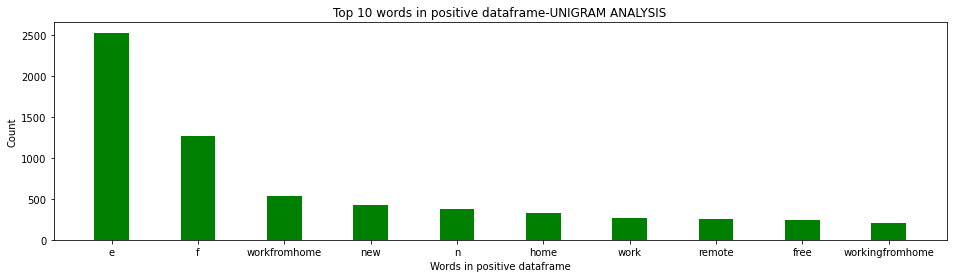

In [584]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

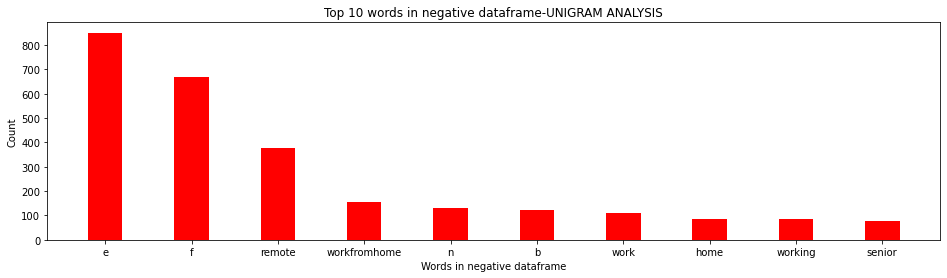

In [585]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

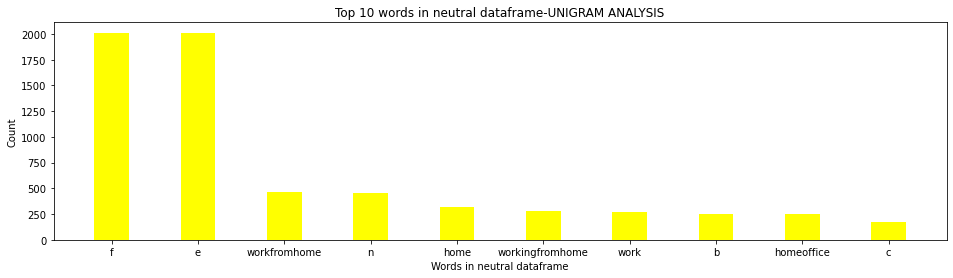

In [586]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [587]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes



In [588]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['uploaded', 'short', 'new', 'video', 'new', 'cryptocurrency', 'ai', 'bot', 'helps', 'earn', 'profits', 'whether', 'markets', 'e']
Sentence after removing stopwords: ['electrical', 'engineer', 'global', 'standards', 'nat', 'meta', 'nmeta', 'seeking', 'electrical', 'engineer', 'strong', 'project', 'management', 'e']
Sentence after removing stopwords: ['free', 'ebook', 'writing', 'cash', 'shows', 'different', 'ways', 'starting', 'writing', 'earning', 'money', 'st', 'e']
Sentence after removing stopwords: ['love', 'love', 'work', 'workfromhome']
Sentence after removing stopwords: ['worked', 'remotely', 'yrs', 'career', 'great', 'workfromhome', 'wednesdaymotivation', 'n', 'working', 'remotely', 'hu', 'e']
Sentence after removing stopwords: ['hide', 'bathroom', 'day', 'work', 'still', 'work', 'right', 'homeoffice', 'workingfromhome']
Sentence after removing stopwords: ['true', 'immigrationupdate', 'immigrationnews', 'immigrationchanges', 'uk', 'immigration

Sentence after removing stopwords: ['learn', 'workfromhome', 'entrepreneur', 'success', 'affiliatemarketing', 'e']
Sentence after removing stopwords: ['nd', 'edition', 'e', 'credefine', 'space', 'e', 'series', 'e', 'introducing', 'magical', 'transformation', 'e']
Sentence after removing stopwords: ['come', 'amp', 'join', 'us', 'f', 'f', 'nyou', 'honestly', 'e', 'regret', 'f', 'f', 'n', 'n', 'workfromhome', 'workfromhomeopportunities', 'joinus', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['orsen', 'swivel', 'chair', 'f', 'f', 'nnow', 'c', 'f', 'f', 'nlimited', 'stock', 'available', 'f', 'f', 'nfree', 'layaway', 'today', 'f', 'f', 'officechair', 'e']
Sentence after removing stopwords: ['full', 'stack', 'developer', 'reactjs', 'calligo', 'napplication', 'deadline', 'february', 'department', 'consultancy', 'services', 'emp', 'e']
Sentence after 

Sentence after removing stopwords: ['new', 'remote', 'jo', 'chief', 'staff', 'marketing', 'organization', 'workfromhome']
Sentence after removing stopwords: ['let', 'skip', 'good', 'part', 'coco', 'enjoy', 'smooth', 'fun', 'experience', 'never', 'nlink', 'e']
Sentence after removing stopwords: ['nfind', 'full', 'training', 'right', 'n']
Sentence after removing stopwords: ['check', 'easy', 'wfh', 'jobs', 'pay', 'well', 'f', 'f', 'b', 'f', 'f', 'b', 'n', 'remotework', 'jobseeker', 'workfromhome', 'c']
Sentence after removing stopwords: ['today', 'affirmation', 'important', 'workfromhomelife', 'e']
Sentence after removing stopwords: ['wireless', 'desk', 'perfect', 'accessory', 'desk', 'side', 'table', 'simply', 'place', 'phone', 'top', 'charg', 'e']
Sentence after removing stopwords: ['earn', 'income', 'paid', 'weekly', 'become', 'beauty', 'partner', 'vic', 'beauty', 'today', 'f', 'f', 'full', 'support', 'training', 'love', 'yo', 'e']
Sentence after removing stopwords: ['best', 'printers'

Sentence after removing stopwords: ['great', 'friday', 'weekend', 'everyone', 'join', 'us', 'next', 'week', 'n', 'f', 'f', 'mentalhealth', 'amp', 'supporting', 'employees', 'f', 'f', 'especiall', 'e']
Sentence after removing stopwords: ['work', 'pyjamas', 'double', 'socks', 'day', 'nhave', 'great', 'one', 'everyone', 'nstay', 'warm', 'n', 'b', 'ad', 'ae', 'b', 'fridaymorning', 'workfromhome', 'covid']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['using', 'techniques', 'brains', 'able', 'pick', 'apart', 'information', 'reassemble', 'pieces', 'puzzle', 'e']
Sentence after removing stopwords: ['happy', 'home', 'starts', 'two', 'happy', 'people', 'showing', 'support', 'partner', 'helps', 'lead', 'successfu', 'e']
Sentence after removing stopwords: ['passion', 'football', 'turn', 'passion', 'income', 'source', 'e', 'bd', 'nif'

Sentence after removing stopwords: ['unexpected', 'benefits', 'homeworking', 'homeoffice', 'hr', 'smallbiz']
Sentence after removing stopwords: ['easily', 'start', 'earning', 'month', 'experience', 'needed', 'n']
Sentence after removing stopwords: ['want', 'increase', 'income', 'gain', 'experience', 'start', 'new', 'career', 'easy', 'jobs', 'c', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['thought', 'extra', 'income', 'selling', 'something', 'one', 'top', 'workfromhome', 'tips', 'open', 'shopify', 'store', 'e']
Sentence after removing stopwords: ['special', 'offer', 'n', 'c', 'c', 'c', 'buy', 'n', 'tradelines', 'n', 'c', 'c', 'c', 'n', 'n', 'losangeles', 'ho

Sentence after removing stopwords: ['modern', 'study', 'room', 'interior', 'design', 'n', 'contact', 'us', 'visit', 'websites']
Sentence after removing stopwords: ['doubt', 'found', 'time', 'surprised', 'tipped', 'certainly', 'homeoffice', 'mi', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['sales', 'executive', 'life', 'sciences', 'safety', 'technology', 'amp', 'professional', 'service', 'solutions', 'nat', 'iqvia', 'njoin', 'us', 'excitin', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'content', 'manager', 'fixed', 'term', 'months', 'workfromhome']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'area', 'sales', 'manager', 'mid', 'market', 'emea', 'workfromhome']
Sentence after removing stopwords: ['proximity', 'bias', 'idea', 'employees', 'close', 'proximity', 'leadership', 'seen', 'be

Sentence after removing stopwords: ['make', 'money', 'watching', 'youtube', 'may', 'new', 'way', 'n', 'makemoneyonline', 'covid', 'e']
Sentence after removing stopwords: ['set', 'rules', 'know', 'best', 'makes', 'efficient', 'happy', 'e', 'c', 'c', 'ef', 'b', 'f', 'nwhat', 'favorite', 'place', 'work', 'f', 'f', 'x']
Sentence after removing stopwords: ['medium', 'complete', 'firm', 'favourite', 'much', 'offer', 'e']
Sentence after removing stopwords: ['software', 'developer', 'remote', 'reqiva', 'nthis', 'exciting', 'opportunity', 'midlevel', 'software', 'developer', 'join', 'l', 'e']
Sentence after removing stopwords: ['movement', 'desk', 'head', 'neck', 'balance', 'please', 'enjoy', 'minute', 'exercise', 'important', 'take', 'breaks', 'e']
Sentence after removing stopwords: ['essentially', 'vas', 'time', 'savers', 'time', 'important', 'commodity', 'business', 'life', 'virtualassistants', 'e']
Sentence after removing stopwords: ['hsbc', 'outlined', 'trend', 'working', 'home', 'impactin

Sentence after removing stopwords: ['latest', 'freelance', 'projects', 'freelance', 'projects', 'true', 'jobs', 'truejobs', 'truejobs', 'e']
Sentence after removing stopwords: ['top', 'reasons', 'medical', 'billing', 'amp', 'coding', 'medicalcoding', 'medicalbilling', 'workfromhome', 'jobs', 'wahm', 'moms', 'e']
Sentence after removing stopwords: ['firstimpressions', 'count', 'important', 'business', 'let', 'us', 'help', 'office', 'options', 'nottingham', 'p', 'e']
Sentence after removing stopwords: ['makemoneyonline', 'workfromhome', 'simplest', 'way', 'grow', 'organization', 'produce', 'great', 'deal', 'e']
Sentence after removing stopwords: ['nice', 'video', 'related', 'free', 'earn', 'daily', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['late', 'nights', 'la', 'creative', 'customcigarpicks', 'workfromhome']
Sentence after removing stopwords: ['seamless', 'set', 'nsize', 'l', 'n', 'n', 'workout', 'wonho', 'gymmotivation', 'gymlife', 'running

Sentence after removing stopwords: ['wishing', 'friday', 'free', 'last', 'minute', 'inbox', 'notifications', 'hear', 'dreaded', 'ding', 'e']
Sentence after removing stopwords: ['check', 'free', 'earn', 'seconds', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['working', 'home', 'wfh', 'stay', 'e', 'helping', 'keep', 'workers', 'safe', 'cyber', 'crime', 'nthe', 'e']
Sentence after removing stopwords: ['sharing', 'office', 'home', 'neutral', 'still', 'inspiring', 'bwe', 'love', 'built', 'ins', 'hide', 'away', 'messy', 'paperwo', 'e']
Sentence after removing stopwords: ['check', 'vintage', 'wilhold', 'large', 'thread', 'caddy', 'tc', 'original', 'box', 'box', 'mint', 'ebay', 'ebaysales', 'resell', 'e']
Sentence after removing stopwords: ['delicious', 'start', 'day', 'brought', 'shop', 'owner', 'tahseen', 'f', 'f', 'premium', 'everything', 'nwant', 'set', 'e']
Sentence after removing stopwords: ['majority', 'night', 'clothes', 'lol', 'workingfromhome

Sentence after removing stopwords: ['covid', 'positive', 'force', 'change', 'women', 'work', 'place', 'finally', 'positive', 'news', 'cassie', 'mcmaster', 'p', 'e']
Sentence after removing stopwords: ['community', 'back', 'delighted', 'welcome', 'nsay', 'big', 'hi', 'lisa', 'jeff', 'reception', 'come', 'e']
Sentence after removing stopwords: ['good', 'tips', 'start', 'work', 'week', 'right', 'productivity', 'organization', 'office', 'homeoffice', 'resolutions', 'e']
Sentence after removing stopwords: ['customers', 'kind', 'customer', 'service', 'problems', 'diffuse', 'situation', 'people', 'e', 'leave', 'e']
Sentence after removing stopwords: ['rick', 'kaleem', 'lively', 'inspiring', 'discussion', 'goncalo', 'hall', 'ceo', 'nomadx']
Sentence after removing stopwords: ['ebac', 'dehumidifier', 'condensation', 'useful', 'article', 'using', 'ebac', 'dehumidifiers', 'n', 'damp', 'e']
Sentence after removing stopwords: ['lancing', 'provides', 'wonderful', 'engaging', 'memorable', 'experience

Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['try', 'postly', 'learn', 'bring', 'free', 'traffic', 'business', 'nget', 'free', 'bonuses', 'gt', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'isv', 'solutions', 'engineer', 'remotejo', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['sweatshirt', 'season', 'day', 'virginia', 'tech', 'special', 'shout', 'greatest', 'hokie', 'falcon', 'ti', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['member', 'team', 'making', 'far', 'much', 'noise', 'typing', 'today', 'amused', 'n', 'catsoftwitter', 'cats', 'e']
Sentence after removing stopwords: ['surprising', 'surprising', 'signals', 'story', 'thegreatresignation', 'lack', 'workingfromhome', 'shows', 'e']
Sentence a

Sentence after removing stopwords: ['best', 'medical', 'careers', 'work', 'life', 'balance', 'medical', 'careers', 'workfromhome', 'jobs', 'wahm', 'moms', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['recent', 'changes', 'world', 'work', 'home', 'become', 'common', 'practice', 'among', 'companies', 'nfor', 'detailed', 'e']
Sentence after removing stopwords: ['live', 'product', 'showcases', 'one', 'way', 'online', 'presentation', 'platform', 'helps', 'grow', 'business', 'nread', 'full', 'blog', 'e']
Sentence after removing stopwords: ['working', 'progress', 'good', 'nstarting', 'marathon', 'editing', 'old', 'stuff', 'n', 'manga', 'mangaart', 'illustration', 'e']
Sentence after removing stopwords: ['f', 'f', 'apply', 'fast', 'hr', 'part', 'time', 'amp', 'full', 'time', 'work', 'home', 'jobs', 'littl', 'via', 'e']
Sentence after remov

Sentence after removing stopwords: ['often', 'come', 'across', 'hard', 'work', 'fall', 'love', 'blogger', 'e']
Sentence after removing stopwords: ['us', 'solve', 'great', 'resignation', 'create', 'better', 'jobs', 'labor', 'secretary', 'marty', 'walsh', 'says']
Sentence after removing stopwords: ['great', 'meeting', 'ellie', 'dataflex', 'studio', 'manchester', 'super', 'products', 'workfromhome', 'e']
Sentence after removing stopwords: ['quick', 'view', 'projects', 'inside', 'nozbe', 'teams', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['bring', 'monday', 'everyone', 'please', 'adjust', 'minute', 'zoom', 'meetings', 'e', 'make', 'everyone', 'e', 'life', 'much', 'e']
Sentence after removing stopwords: ['administrative', 'store', 'support', 'nat', 'walmart', 'canada', 'nwhat', 'youll', 'never', 'dull', 'moment', 'much', 'goes', 'running', 'massi', 'e']
Sentence after removing stopwords: ['contexts', 'productivity', 'eff

Sentence after removing stopwords: ['turn', 'happy', 'snaps', 'online', 'income', 'stream', 'stockphotography', 'e']
Sentence after removing stopwords: ['remote', 'sales', 'chat', 'representatives', 'nat', 'afni', 'inc', 'per', 'hour', 'base', 'pay', 'unlimited', 'commission', 'best', 'agents', 'earn', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['workingfromhome', 'highlighted', 'investing', 'good', 'hot', 'water', 'bottle', 'worthwhile']
Sentence after removing stopwords: ['shop', 'nfor', 'owner', 'ndeco', 'grey', 'metal', 'contemporary', 'sculpture', 'e']
Sentence after removing stopwords: ['staging', 'decorating', 'home', 'based', 'office', 'success', 'businessarticles', 'businesstopics', 'howto', 'business', 'e']
Sentence after removing stopwords: ['phish', 'live', 'one', 'vinyl', 'nowspinning', 'phish', 'teletravail', 'e']
Sentence after removing sto

Sentence after removing stopwords: ['top', 'tips', 'improve', 'amazon', 'earnings', 'laptoplifestyle', 'wealthy', 'travel', 'e']
Sentence after removing stopwords: ['make', 'money', 'fiverr', 'e', 'become', 'best', 'seller', 'fiverr', 'f', 'f', 'af', 'f', 'f', 'fiverr', 'freelance', 'workfromhome', 'makemoneyfromhome', 'e']
Sentence after removing stopwords: ['front', 'end', 'developer', 'creative', 'circle', 'nagency', 'seeking', 'front', 'end', 'developer', 'join', 'growing', 'team', 'looking']
Sentence after removing stopwords: ['everblocks', 'shelving', 'allows', 'design', 'storage', 'meets', 'needs', 'love', 'person', 'displayed', 'e']
Sentence after removing stopwords: ['top', 'resources', 'new', 'casino', 'affiliates', 'affiliatemarketing', 'digitalmarketing', 'business', 'e']
Sentence after removing stopwords: ['tutors', 'tutorgigs', 'teach', 'students', 'best', 'abilities', 'nbe', 'part', 'growing', 'online', 'teaching', 'platform', 'e']
Sentence after removing stopwords: ['he

Sentence after removing stopwords: ['graduate', 'sales', 'consultant', 'nat', 'prime', 'nwant', 'work', 'business', 'consistently', 'recognised', 'one', 'th', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['want', 'many', 'targeted', 'subscribers', 'onto', 'list', 'fast', 'possible', 'take', 'look', 'e', 'f', 'f', 'f', 'f', 'f', 'e']
Sentence after removing stopwords: ['biztips', 'workfromhome', 'time', 'easy', 'large', 'number', 'best', 'quality', 'potential', 'buyers', 'fo', 'e']
Sentence after removing stopwords: ['sometimes', 'labeler', 'makes', 'huge', 'difference', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['f', 'c', 'b', 'sleek', 'orazio', 'writing', 'table', 'brushed', 'quartered', 'oak', 'veneer', 'works', 'perfectly', 'light', 'filled', 'space', 'imagin'

Sentence after removing stopwords: ['samuel', 'new', 'sleek', 'smooth', 'fragrance', 'bodyoil', 'scent', 'men', 'e']
Sentence after removing stopwords: ['production', 'jobs', 'available', 'careerbarn', 'apply', 'production', 'production', 'associate', 'packaging', 'operator', 'e']
Sentence after removing stopwords: ['discover', 'beautiful', 'wall', 'clocks', 'art', 'shop', 'nft', 'clock', 'minimalist', 'large', 'classic', 'white', 'grid', 'pattern', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['instant', 'access', 'super', 'affiliate', 'swipe', 'file', 'generates', 'commissions', 'daily', 'c', 'join', 'e']
Sentence after removing stopwords: ['list', 'seven', 'general', 'public', 'expectations', 'upcoming', 'indian', 'budget', 'sag', 'infotech', 'offic', 'e']
Sentence after removing stopwords: ['fun', 'facts', 'wfh', 'life', 'n', 'n

Sentence after removing stopwords: ['great', 'whole', 'hpc', 'team', 'back', 'office', 'monday', 'f', 'f', 'c', 'f', 'f', 'c', 'nif', 'looking', 'bring', 'employ', 'e']
Sentence after removing stopwords: ['administrative', 'assistant', 'receptionist', 'nat', 'robert', 'half', 'ncalling', 'highly', 'organized', 'detailed', 'orientated', 'professio', 'e']
Sentence after removing stopwords: ['wee', 'shoogle', 'amazon', 'choice', 'mouse', 'mover', 'device', 'sound', 'n', 'mousemover', 'e']
Sentence after removing stopwords: ['happy', 'vibes', 'eh', 'homeoffice']
Sentence after removing stopwords: ['affiliate', 'marketing', 'super', 'easy', 'step', 'step', 'beginners', 'entrepreneur', 'e']
Sentence after removing stopwords: ['time', 'failure', 'finally', 'transform', 'results', 'magic', 'affiliate', 'marketing', 'magic', 'e']
Sentence after removing stopwords: ['truly', 'great', 'way', 'advertise', 'business', 'via', 'classified', 'ad', 'sites', 'keep', 'posting', 'ads', 'keep', 'making', '

Sentence after removing stopwords: ['ad', 'edwards', 'offers', 'two', 'hour', 'workshop', 'providing', 'insight', 'common', 'virtual', 'hybrid', 'team', 'challenges', 'best', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'graphic', 'designer', 'remotejo', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['nice', 'video', 'related', 'free', 'earn', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['workfromhome', 'homebusiness', 'internetmarketing', 'important', 'model', 'disclose', 'exactly', 'assist', 'invite', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['yo', 'e', 'game', 'day', 'houts', 'amp', 'amp', 'amp', 'amp', 'amp', 'nit', 'e', 'alumni', 'day', 'great', 'former', 'suwb', 'members', 'house', 'today', 'e']
Sentence after removing stopwords: ['wish', 

Sentence after removing stopwords: ['software', 'developer', 'nat', 'caranci', 'consulting', 'corp', 'nwe', 'create', 'opportunity', 'organizations', 'helping', 'make', 'best', 'use', 'e']
Sentence after removing stopwords: ['people', 'employment', 'working', 'home', 'last', 'year', 'may', 'wondering', 'measure', 'success', 'e']
Sentence after removing stopwords: ['make', 'youtube', 'videos', 'amp', 'stunning', 'results', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'e']
Sentence after removing stopwords: ['responsible', 'sourcing', 'amp', 'quality', 'assurance', 'manager', 'nat', 'travis', 'perkins', 'nhere', 'travis', 'perkins', 'looking', 'respon', 'e']
Sentence after removing stopwords: ['nincrease', 'congenital', 'syphilis', 'amp', 'pregnant', 'women', 'sero', 'positivity', 'e']
Sentence after removing stopwords: ['video', 'show', 'use', 'import', 'folders', 'easily', 'automatically', 'save', 'files', 'evernote', 'ncheck', 'e']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['new', 'remote', 'jo', 'deal', 'desk', 'specialist', 'vacancy', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['absolutely', 'loving', 'new', 'aroma', 'diffuser', 'n', 'aromatherapy', 'chilled', 'clearmind', 'homeoffice']
Sentence after removing stopwords: ['laravel', 'jedi', 'creative', 'force', 'ltd', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['spice', 'meetings', 'playing', 'gameapart', 'team', 'f', 'f', 'f', 'f', 'ngameapart', 'easy', 'use', 'whether', 'together', 'e']
Sentence after removing stopwords: ['ruling', 'delivered', 'wednesday', 'lady', 'justice', 'whipple', 'said', 'e', 'cthere', 'may', 'good', 'policy', 'e']
Sentence after removing stopwords: ['remote', 'work', 'stay', 'ultra', 'comfortable', 'tee', 'great', 'cause', 'must', 'nrock', 'beakwe', 'e']
Sentence after removing stopwords: ['create', 'perfect', 'remotework', 'environment', 

Sentence after removing stopwords: ['looking', 'factors', 'determine', 'success', 'working', 'home', 'n', 'workingfromhome', 'remotework', 'e']
Sentence after removing stopwords: ['new', 'year', 'new', 'setup', 'n', 'streamer', 'homeoffice']
Sentence after removing stopwords: ['covid', 'mainly', 'disease', 'poor', 'tge', 'essential', 'workfromhome', 'new', 'kind', 'wealth', 'retirement', 'ne', 'e']
Sentence after removing stopwords: ['krisp', 'highly', 'effective', 'noise', 'cancellation', 'app', 'remote', 'working', 'read', 'detailed', 'review', 'e']
Sentence after removing stopwords: ['home', 'office', 'upgrades', 'health', 'happiness', 'n', 'entrepreneurs', 'homeoffice', 'health']
Sentence after removing stopwords: ['clever', 'dog', 'systems', 'n', 'cleverdogit', 'backtooffice', 'technology', 'workfromhome', 'yow', 'news', 'ottcity', 'technology', 'e']
Sentence after removing stopwords: ['senior', 'full', 'stack', 'developer', 'nat', 'weir', 'motion', 'metrics', 'nsenior', 'full', '

Sentence after removing stopwords: ['new', 'remote', 'jo', 'software', 'engineer', 'remotejo', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['working', 'home', 'learn', 'tips', 'stay', 'productive', 'positive', 'workfromhome', 'workremote', 'wfh', 'via']
Sentence after removing stopwords: ['make', 'money', 'home', 'proofreader', 'free', 'proofreading', 'workshop', 'proofreading', 'proofreader', 'workfromhome', 'wahm', 'e']
Sentence after removing stopwords: ['laughed', 'told', 'made', 'single', 'weekend', 'single', 'copy', 'cut', 'paste', 'c', 'join', 'e']
Sentence after removing stopwords: ['try', 'explain', 'much', 'online', 'affiliatemarketing', 'business', 'makes', 'week', 'n', 'f', 'f', 'f', 'f', 'f', 'bbit', 'e', 'si', 'e']
Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'f', 'bdwotd', 'f', 'f', 'f', 'f', 'f', 'f', 'bd', 'e', 'ef', 'b', 'fgratitude', 'e', 'ef', 'b', 'f', 'grateful', 'appreciationpost', 'lovestay', 'amen', 'thanksgiving', 'january', 'blesse

Sentence after removing stopwords: ['achieving', 'healthy', 'worklife', 'balance', 'means', 'enough', 'time', 'energy', 'everyone', 'everything', 'e']
Sentence after removing stopwords: ['residualincome', 'workfromhome', 'networkmarketingrecruiting', 'certainly', 'need', 'put', 'lead', 'traffi', 'e']
Sentence after removing stopwords: ['refugees', 'mainly', 'women', 'children', 'barred', 'home', 'office', 'e', 'proposed', 'changes', 'nmore', 'th', 'e']
Sentence after removing stopwords: ['last', 'days', 'e', 'wfh', 'due', 'positive', 'case', 'within', 'household', 'yesterday', 'virtually', 'taught', 'e']
Sentence after removing stopwords: ['world', 'e', 'first', 'super', 'affiliate', 'weapon', 'start', 'earning', 'commissions', 'jvzoo', 'amp', 'warriorplus', 'without', 'manu', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['finally',

Sentence after removing stopwords: ['bold', 'penguin', 'looking', 'remote', 'cloud', 'engineer', 'remotejobs', 'techjobs', 'e']
Sentence after removing stopwords: ['path', 'happiness', 'happiness', 'path', 'n', 'money', 'jk', 'e', 'b', 'e', 'c', 'fashion', 'workingfromhome']
Sentence after removing stopwords: ['create', 'sensory', 'friendly', 'emails', 'workfromhome', 'business', 'smallbusiness']
Sentence after removing stopwords: ['creativity', 'wait', 'perfect', 'moment', 'fashions', 'perfect', 'moments', 'ordinary', 'ones', 'bruce', 'e']
Sentence after removing stopwords: ['c', 'remote', 'licensed', 'realtor', 'role', 'available', 'amazing', 'candidates', 'ready', 'demonstrate', 'knowledge', 'e']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['telesales', 'executive', 'neuvoo', 'nan', 'exciting', 'opportunity', 'arisen', 'experienced', 'telesales', 'professional', 'join', 'e']
Sentence aft

Sentence after removing stopwords: ['reason', 'people', 'prefer', 'workingfromhome', 'n', 'saving', 'money', 'n', 'amazing', 'work', 'life', 'balance', 'great', 'e']
Sentence after removing stopwords: ['nice', 'video', 'related', 'free', 'make', 'daily', 'homebusiness', 'workfromhome']
Sentence after removing stopwords: ['important', 'security', 'trends', 'benefitsofremoteworking', 'cloudbasedsystems', 'e']
Sentence after removing stopwords: ['f', 'c', 'c', 'ef', 'b', 'f', 'e', 'f', 'b', 'tactics', 'made', 'million', 'f', 'f', 'f', 'f', 'free', 'money', 'making', 'work', 'home', 'blue', 'jeans', 'never', 'h', 'e']
Sentence after removing stopwords: ['love', 'bmw', 'zs', 'highly', 'detailed', 'illustration', 'z', 'z', 'z', 'navailable', 'large', 'cm', 'e']
Sentence after removing stopwords: ['look', 'free', 'paid', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'in

Sentence after removing stopwords: ['many', 'careers', 'require', 'strong', 'internet', 'connection', 'specialized', 'training', 'great', 'time', 'consider', 'e']
Sentence after removing stopwords: ['organization', 'supporting', 'c', 'neurodiverse', 'c', 'c', 'neurodivergent', 'c', 'team', 'members', 'know', 'c', 'e']
Sentence after removing stopwords: ['junior', 'payroll', 'specialist', 'bdo', 'nputting', 'people', 'first', 'every', 'day', 'bdo', 'firm', 'built', 'foundation', 'positive', 'rel', 'e']
Sentence after removing stopwords: ['always', 'ask', 'anything', 'e', 'happy', 'help', 'built', 'website', 'explain', 'teach', 'e']
Sentence after removing stopwords: ['given', 'fast', 'paced', 'nature', 'social', 'media', 'tools', 'hand', 'critical', 'ensuring', 'company', 'e']
Sentence after removing stopwords: ['full', 'stack', 'developer', 'remote', 'writable', 'inc', 'allows', 'remote', 'remotejobs', 'jobs', 'e']
Sentence after removing stopwords: ['f', 'hybrid', 'work', 'good', 'n',

Sentence after removing stopwords: ['workfromhome', 'novascotia', 'small', 'joy', 'covidlife', 'today', 'friendly', 'f', 'f', 'c', 'deer', 'decided', 'visit', 'worked', 'e']
Sentence after removing stopwords: ['lovely', 'finally', 'back', 'e', 'long', 'peaceful', 'workingfromhome', 'focus']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['cool', 'sharing', 'homeoffice', 'little', 'guy', 'today', 'thank', 'joy', 'winterwatch', 'e']
Sentence after removing stopwords: ['honor', 'data', 'privacy', 'day', 'remember', 'use', 'best', 'practices', 'comes', 'security', 'home', 'work', 'office', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['find', 'exactly', 'declutter', 'organise

Sentence after removing stopwords: ['biztips', 'workfromhome', 'bright', 'businesses', 'enjoy', 'simple', 'easy', 'find', 'copious', 'amounts', 'pag', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['supervisor', 'hard', 'work', 'lol', 'lucy', 'miss', 'go', 'back', 'office', 'workfromhome', 'f', 'f']
Sentence after removing stopwords: ['eckerle', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['accomplishments', 'going', 'online', 'necessitates', 'smart', 'often', 'guide', 'e']
Sentence after removing stopwords: ['help', 'easy', 'guide', 'teach', 'create', 'office', 'space', 'kitchen', 'nno', 'matter', 'e']
Sentence after removing stopwords: ['looks', 'ending', 'covid', 'restrictions', 'much', 'e']
Sentence after removing stopwords: ['securing', 'worksp

Sentence after removing stopwords: ['better', 'people', 'choice', 'possible', 'better', 'environment', 'convert', 'unused', 'office', 'space', 'e']
Sentence after removing stopwords: ['believes', 'happy', 'customers', 'happy', 'employees', 'njoin', 'team', 'enthusiastic', 'ind', 'e']
Sentence after removing stopwords: ['enjoy', 'writing', 'journal', 'pretty', 'notebooks', 'work', 'perfectly', 'f', 'f', 'takenotes', 'e']
Sentence after removing stopwords: ['live', 'workshop', 'steps', 'year', 'days', 'smartphone', 'ad', 'digital', 'e']
Sentence after removing stopwords: ['tell', 'us', 'far', 'commute', 'work', 'f', 'f', 'ndo', 'find', 'workfromhome', 'e']
Sentence after removing stopwords: ['biztips', 'workfromhome', 'exactly', 'website', 'targeted', 'traffic', 'statistics', 'shaping']
Sentence after removing stopwords: ['farewell', 'full', 'time', 'office', 'employment', 'business', 'vp', 'businessnews', 'hybridwork', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middlem

Sentence after removing stopwords: ['see', 'instagram', 'photo', 'hindesights', 'success', 'entrepreneur', 'e']
Sentence after removing stopwords: ['workfromhome', 'homebusiness', 'internetmarketing', 'important', 'video', 'tutorials', 'explains', 'ways', 'begin', 'worthwhile', 'ta', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['use', 'social', 'media', 'promote', 'company', 'f', 'f', 'nconsider', 'networks', 'likely', 'help', 'achieve', 'e']
Sentence after removing stopwords: ['happy', 'birthday', 'tobe', 'hooper', 'filmmakers', 'filmmaking', 'horror', 'e']
Sentence after removing stopwords: ['happy', 'quotes', 'coffee', 'thank', 'universe', 'homeoffice']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['post', 'ads', 'internet', 'often', 'reap', 'bi

Sentence after removing stopwords: ['desk', 'booking', 'system', 'gives', 'employees', 'certainty', 'desk', 'available', 'arrive', 'work', 'e']
Sentence after removing stopwords: ['members', 'team', 'enjoying', 'spot', 'training', 'workingfromhome', 'thanks', 'employment', 'specialist', 'dave', 'e']
Sentence after removing stopwords: ['want', 'work', 'remotely', 'experienced', 'python', 'django', 'contractor', 'full', 'time', 'stack', 'builders', 'e']
Sentence after removing stopwords: ['e', 'hard', 'see', 'anyone', 'pick', 'zoom', 'either', 'free', 'paid', 'versions', 'packages', 'e']
Sentence after removing stopwords: ['life', 'worth', 'living', 'unless', 'willing', 'take', 'big', 'chances', 'go', 'broke', 'eliot', 'wiggington', 'go', 'e']
Sentence after removing stopwords: ['senior', 'full', 'stack', 'developer', 'open', 'remote', 'nat', 'moveworks', 'nsenior', 'full', 'stack', 'developer', 'moveworks', 'redefining', 'e']
Sentence after removing stopwords: ['stopped', 'think', 'need

Sentence after removing stopwords: ['today', 'day', 'speak', 'lines', 'every', 'morning', 'discover', 'powerful', 'omnipotent', 'yo', 'e']
Sentence after removing stopwords: ['craft', 'good', 'open', 'rate', 'email', 'campaigns', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e']
Sentence after removing stopwords: ['best', 'ways', 'improve', 'email', 'marketing', 'open', 'rates', 'affiliate', 'affiliatemarketingtips', 'e']
Sentence after removing stopwords: ['style', 'new', 'moms', 'javnet', 'group', 'bags', 'business', 'fashion', 'moms', 'shapewear', 'wallets', 'e']
Sentence after removing stopwords: ['soothing', 'relaxation', 'meditative', 'instrumental', 'music', 'perfect', 'music', 'use', 'background', 'music', 'e']
Sentence after removing stopwords: ['play', 'f', 'f', 'e', 'chess', 'f', 'f', 'x', 'c', 'f', 'f', 'f', 'f', 'c', 'e', 'ac', 'clean', 'f', 'f', 'c', 'interface', 'f', 'f', 'b', 'f', 'registration', 'f', 'f', 'f', 'bc', 'ads', 'f', 'f

Sentence after removing stopwords: ['new', 'episode', 'productivity', 'cast', 'four', 'day', 'workweek', 'productivity']
Sentence after removing stopwords: ['funny', 'wfh', 'memes', 'brighten', 'day', 'whether', 'back', 'office', 'still', 'working', 'remotely', 'e']
Sentence after removing stopwords: ['busy', 'day', 'working', 'home', 'quite', 'easily', 'stayed', 'inside', 'extra', 'minutes', 'desk', 'glad', 'e']
Sentence after removing stopwords: ['crazy', 'amounts', 'cute', 'forecast', 'e', 'beautiful', 'workingmom', 'e']
Sentence after removing stopwords: ['video', 'free', 'earn', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['make', 'amp', 'one', 'click', 'button', 'easy', 'method']
Sentence after removing stopwords: ['happy', 'saturday', 'everyday', 'set', 'goals', 'anything', 'big', 

Sentence after removing stopwords: ['jaysus', 'wordsalad', 'read', 'loud', 'without', 'laughing', 'remotework', 'e']
Sentence after removing stopwords: ['best', 'nft', 'games', 'earn', 'money', 'n', 'makemoneyonline', 'business', 'bitcoin', 'success', 'workfromhome', 'investment', 'motivation', 'e']
Sentence after removing stopwords: ['check', 'free', 'make', 'daily', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['workfromhome', 'advertising', 'mlmsponsoring', 'getting', 'leads', 'daily', 'basis', 'really', 'important', 'success', 'yo', 'e']
Sentence after removing stopwords: ['rising', 'gen', 'philanthropy', 'amp', 'social', 'wellbeing']
Sentence after removing stopwords: ['work', 'besties', 'workingfromhome', 'make', 'rich', 'colleague', 'e']
Sentence after removing stopwords: ['pretty', 'snow', 'day', 'behappy', 'workfromhome', 'momlife']
Sentence after removing stopwords: ['episode', 'impact', 'jo', 'talk', 'talk', 'employers', 'best', 'leve

Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['soooooo', 'f', 'f', 'f', 'f', 'n', 'creativity', 'zoom', 'videocall', 'funny', 'humour', 'videoconference', 'tea', 'wine', 'wfh', 'e']
Sentence after removing stopwords: ['start', 'high', 'ticket', 'affiliate', 'marketing', 'money']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'customer', 'success', 'director', 'vacancy', 'workfromhome']
Sentence after removing stopwords: ['f', 'chance', 'win', 'upto', 'f', 'f', 'b', 'ef', 'b', 'fjust', 'sign', 'site', 'participate', 'contest', 'njust', 'follow', 'link', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['art', 'deco', 'journal', 'writers', 'friend', 'vintage', 'blotter', 'pi

Sentence after removing stopwords: ['sales', 'bigger', 'sales', 'amp', 'customers', 'invest', 'good', 'online', 'marketing', 'coach', 'e']
Sentence after removing stopwords: ['amalinks', 'pro', 'review', 'good', 'true', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'e']
Sentence after removing stopwords: ['hey', 'free', 'presentation', 'allowed', 'manifest', 'pretty', 'cool', 'stuff', 'makemoney', 'e']
Sentence after removing stopwords: ['jacksonville', 'system', 'engineer', 'major', 'accounts', 'nat', 'fortinet', 'nposition', 'systems', 'engineer', 'major', 'accounts', 'objective', 'e']
Sentence after removing stopwords: ['happy', 'birthday', 'scott', 'glenn', 'actors', 'apocalypsenow', 'urbancowboy', 'e']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['never', 'better', 'time', 'book', 'free', 'home', 'office', 'design', 'appointment', 'avanti', 'e']
Sentence after r

Sentence after removing stopwords: ['another', 'excellent', 'outcome', 'leave', 'remain', 'application', 'lawmadesimple', 'fridaymorning', 'fridayfeeling', 'e']
Sentence after removing stopwords: ['looking', 'work', 'open', 'culture', 'environment', 'welcomes', 'new', 'ideas', 'amp', 'provides', 'growth', 'opportunities', 'write', 'hr', 'e']
Sentence after removing stopwords: ['look', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['happy', 'friday', 'e', 'e', 'come', 'log', 'week', 'workflow', 'pgemp', 'workfromhomelife', 'f', 'f', 'f', 'f', 'f', 'e', 'f', 'f', 'b', 'ef', 'b', 'f']
Sentence after removing stopwords: ['one', 'best', 'things', 'freelancing', 'opportunity', 'create', 'workspace', 'nif', 'need', 'home', 'e']
Sentence after removing stopwords: ['good', 'evening', 'pamelafoland', 'selfie', 'smile', 'homewithmypets', 'workingfromhome', 'fiverrseller', 'e']
Sentence after removing stopwords: ['good', 'morning',

In [589]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

 


 

Sentence after removing stopwords: ['nyle', 'enough', 'today', 'cat', 'e', 'life', 'hard', 'catsoftwitter', 'workingfromhome']
Sentence after removing stopwords: ['workfromhome', 'feeling', 'tired', 'sometime', 'sitting', 'chair', 'f', 'f', 'aa', 'whole', 'day', 'bump', 'flat', 'shape', 'nwha', 'e']
Sentence after removing stopwords: ['one', 'common', 'mistakes', 'productivity', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['software', 'developer', 'front', 'end', 'remote', 'nat', 'geota', 'nwho', 'geota', 'global', 'leader', 'iot', 'connected', 'transpo', 'e']
Sentence after removing stopwords: ['squid', 'game', 'play', 'day', 'tonight', 'reach', 'dms', 'purchase', 'gamblingtwiitter', 'workingfromhome']
Sentence after removing stopwords: ['fullstack', 'developer', 'mirego', 'quebec', 'city', 'qc', 'canada', 'allows', 'remote', 'remotejobs', 'e']
Sentence after removing stopwords: ['senior', 'software', 'developer', 'b

Sentence after removing stopwords: ['tribe', 'hiring', 'looking', 'remote', 'ui', 'developer', 'freelancer', 'permanent', 'remotejobs', 'e']
Sentence after removing stopwords: ['lead', 'instructor', 'e', 'data', 'science', 'wbs', 'gruppe', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['want', 'become', 'fingerprintjs', 'next', 'remote', 'marketing', 'designer', 'learn', 'remote', 'role', 'e']
Sentence after removing stopwords: ['ridiculous', 'e', 'subtitle', 'tonight', 'cats', 'catsoftwitter', 'workingfromhome', 'e']
Sentence after removing stopwords: ['one', 'biggest', 'consequences', 'working', 'desk', 'jo', 'poor', 'blood', 'circulation', 'nhere', 'ways', 'prevent', 'poo', 'e']
Sentence after removing stopwords: ['think', 'math', 'hard', 'try', 'nwe', 'design', 'homeoffice', 'luciano', 'naiara', 'bbb', 'e', 'e', 'ac', 'e', 'b', 'e', 'bf', 'e', 'e', 'b', 'e', 'e', 'b', 'e', 'scooby', 'tadeu', 'e']
Sentence after removing stopwords: ['team

Sentence after removing stopwords: ['companies', 'adding', 'jo', 'titles', 'focused', 'remote', 'hybridwork', 'experiences', 'shift', 'workfromhome', 'becomes', 'e']
Sentence after removing stopwords: ['sorry', 'need', 'say', 'reading', 'suic', 'de', 'cases', 'day', 'jo', 'quite', 'bad', 'mental', 'health', 'n']
Sentence after removing stopwords: ['frustrated', 'slow', 'wifi', 'need', 'help', 'getting', 'tech', 'work', 'efficiently', 'n', 'remotesupport', 'e']
Sentence after removing stopwords: ['ruby', 'engineer', 'canada', 'remote', 'fullscript', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['senior', 'software', 'engineer', 'go', 'e', 'remote', 'east', 'canada', 'time', 'zones', 'form', 'e', 'financial', 'cloud', 'allows', 'remote', 'e']
Sentence after removing stopwords: ['one', 'common', 'mistakes', 'productivity', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['cec', '

Sentence after removing stopwords: ['devops', 'engineer', 'flyr', 'inc', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['amazon', 'remote', 'jobs', 'amazon', 'career', 'hr', 'expansion', 'nat', 'amazon', 'uk', 'services', 'ltd', 'njo', 'responsibilities', 'hr', 'expansion', 'e']
Sentence after removing stopwords: ['want', 'remote', 'fullstack', 'net', 'software', 'engineer', 'cigen', 'workfromhome', 'fullstackprogramming', 'n']
Sentence after removing stopwords: ['went', 'sit', 'secret', 'la', 'titan', 'edition', 'aluminum', 'caster', 'base', 'decided', 'shear', 'gouged', 'floor', 'e']
Sentence after removing stopwords: ['want', 'work', 'remote', 'python', 'developer', 'python', 'django', 'generation', 'marketing', 'workfromhome', 'e']
Sentence after removing stopwords: ['chief', 'product', 'officer', 'ignitetech', 'remote', 'year', 'usd', 'nat', 'crossover', 'work', 'ncrossover', 'worlds', 'sour', 'e']


Sentence after removing stopwords: ['field', 'quality', 'manager', 'remote', 'nat', 'raytheon', 'intelligence', 'amp', 'space', 'nraytheon', 'intelligence', 'space', 'ris', 'opportunity', 'e']
Sentence after removing stopwords: ['desperate', 'need', 'amazon', 'anonymous', 'group', 'name', 'mommye', 'amazon', 'addict', 'shopping', 'e']
Sentence after removing stopwords: ['f', 'curbio', 'hiring', 'remote', 'director', 'strategic', 'partnerships', 'corporate', 'curbio', 'remotework', 'remotejo']
Sentence after removing stopwords: ['working', 'two', 'vpns', 'mfa', 'makes', 'annoying', 'day', 'workfromhome', 'firstworldproblems']
Sentence after removing stopwords: ['thinking', 'working', 'remotely', 'seven', 'truths', 'consider', 'taking', 'plunge', 'e']
Sentence after removing stopwords: ['working', 'remotely', 'boomers', 'amp', 'seniors', 'resources', 'freelancing', 'entrepreneur', 'babyboomers', 'e']
Sentence after removing stopwords: ['element', 'structure', 'paramount', 'organization',

Sentence after removing stopwords: ['medical', 'coding', 'jobs', 'home', 'lexicode', 'remote', 'medical', 'coding', 'jobs', 'medicalcoding', 'medical', 'coding', 'e']
Sentence after removing stopwords: ['person', 'meetings', 'without', 'anger', 'management', 'way', 'mute', 'others', 'npeople', 'bla', 'l', 'e']
Sentence after removing stopwords: ['senior', 'backend', 'engineer', 'leaf', 'logistics', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['work', 'relationships', 'built', 'trust', 'office', 'remotely', 'harlan', 'schafir', 'shares', 'advice', 'building', 'tr', 'e']
Sentence after removing stopwords: ['dip', 'live', 'coverage', 'trading', 'plain', 'english', 'uncle', 'bruce', 'n']
Sentence after removing stopwords: ['late', 'work', 'via', 'actor', 'youtube', 'youtuber', 'filmtwitter', 'filmmaking', 'subscribenow', 'e']
Sentence after removing stopwords: ['microsoft', 'continuously', 'updating', 'servers', 'responsibly', 'utilise', 'gree

Sentence after removing stopwords: ['bad', 'dream', 'started', 'whinny', 'ing', 'horse', 'mom', 'stifle', 'laughs', 'put', 'meeting', 'e']
Sentence after removing stopwords: ['beauty', 'amp', 'art', 'minimal', 'presentation', 'template', 'presentation', 'workfromhome', 'powerpoint', 'templates']
Sentence after removing stopwords: ['deep', 'learning', 'researcher', 'asr', 'remote', 'assemblyai', 'san', 'francisco', 'ca', 'allows', 'remote']
Sentence after removing stopwords: ['business', 'intelligence', 'data', 'developer', 'vacancy', 'cc', 'remote', 'working', 'napply']
Sentence after removing stopwords: ['new', 'blog', 'alert', 'e', 'c', 'fully', 'remote', 'aplo', 'team', 'knows', 'thing', 'two', 'work', 'remotely', 'e']
Sentence after removing stopwords: ['want', 'reach', 'long', 'term', 'goals', 'work', 'follow', 'tips', 'organized']
Sentence after removing stopwords: ['take', 'bojackhorseman', 'wait', 'late', 'getfamous', 'late', 'hollywood', 'wait', 'e']
Sentence after removing st

Sentence after removing stopwords: ['well', 'back', 'work', 'home', 'warrior', 'short', 'period', 'test', 'negative', 'wfh', 'covid', 'covid', 'e']
Sentence after removing stopwords: ['set', 'goals', 'list', 'watch', 'quickly', 'subconscious', 'mind', 'actively', 'works', 'mark', 'things', 'e']
Sentence after removing stopwords: ['parts', 'today', 'e', 'bad', 'suppose', 'dogsoftwitter', 'dogsofinstagram', 'itsadogslife', 'workingfromhome']
Sentence after removing stopwords: ['finally', 'friday', 'e', 'ef', 'b', 'f', 'nwhat', 'week', 'nthis', 'lately', 'e']
Sentence after removing stopwords: ['hit', 'point', 'e', 'staring', 'screen', 'wondering', 'wtf', 'e', 'n', 'workfromhome']
Sentence after removing stopwords: ['make', 'money', 'online', 'day', 'f', 'f', 'e', 'nlearn', 'make', 'money', 'online', 'newbies', 'making', 'serious', 'money', 'f', 'f', 'f', 'f', 'f', 'f', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'c', 'cplusp

Sentence after removing stopwords: ['home', 'office', 'boring', 'spruce', 'decoration', 'ideas', 'newyearnewyou', 'remotework', 'officedecor', 'e']
Sentence after removing stopwords: ['know', 'remote', 'employees', 'productivity', 'compares', 'employees', 'nclick', 'e']
Sentence after removing stopwords: ['workingfromhome', 'workfromhome', 'happened', 'long', 'time', 'ago', 'january', 'hkt', 'e']
Sentence after removing stopwords: ['hybrid', 'work', 'emotionally', 'exhausting', 'longdistance', 'relationships', 'e']
Sentence after removing stopwords: ['kickstart', 'compliance', 'amp', 'investigations', 'assistant', 'vacancy', 'working', 'partnership', 'remote', 'wo', 'e']
Sentence after removing stopwords: ['software', 'engineer', 'ensek', 'melbourne', 'australia', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['f', 'e', 'b', 'got', 'weekly', 'meeting', 'blues', 'oh', 'yes', 'f', 'f', 'e', 'b', 'nhow', 'thrive', 'working', 'remotely', 'gt', '

Sentence after removing stopwords: ['torymps', 'narcissists', 'homeoffice', 'stops', 'disabled', 'recruiting', 'carers', 'care', 'homes', 'amp', 'agencies', 'e']
Sentence after removing stopwords: ['sales', 'executive', 'nat', 'midas', 'selection', 'midlands', 'limited', 'nsales', 'executive', 'location', 'work', 'home', 'based', 'anywhere', 'e']
Sentence after removing stopwords: ['backend', 'engineer', 'e', 'remote', 'site', 'elearning', 'industry', 'athens', 'greece', 'allows', 'remote']
Sentence after removing stopwords: ['daily', 'coworker', 'photo', 'coworker', 'waiting', 'impatiently', 'desk', 'basket', 'morning', 'even', 'started', 'work', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'java', 'projectmanagement', 'f', 'f', 'ef', 'b', 'f', 'amdocs', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply', 'e']
Sentence after removing stopwords: ['foreground', 'commerce', 'platform', 'photographers', 'hiring', 're

Sentence after removing stopwords: ['f', 'notarize', 'hiring', 'remote', 'senior', 'visual', 'designer', 'notarize', 'remotework', 'remotejo', 'workfromhome', 'adobecc', 'e']
Sentence after removing stopwords: ['torymps', 'narcissists', 'homeoffice', 'stops', 'disabled', 'recruiting', 'carers', 'care', 'homes', 'amp', 'agencies', 'nwith', 'e']
Sentence after removing stopwords: ['stiff', 'sore', 'sitting', 'front', 'screen', 'day', 'want', 'optimize', 'home', 'office', 'setup', 'join', 'us', 'e']
Sentence after removing stopwords: ['debate', 'time', 'formal', 'fridays', 'casual', 'fridays', 'work', 'workfromhome', 'n', 'f', 'f', 'formal', 'f', 'casual']
Sentence after removing stopwords: ['work', 'home', 'customer', 'service', 'rep', 'nat', 'qualfon', 'ncustomer', 'service', 'remote', 'call', 'center', 'residents', 'al', 'customer', 'se', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'react', 'maven', 'f', 'f', 'ef', 'b', 'f

Sentence after removing stopwords: ['long', 'term', 'career', 'stability', 'nemployee', 'wellbeing', 'workers', 'said', 'felt', 'cared', 'employer', 'e']
Sentence after removing stopwords: ['gonna', 'blow', 'mind', 'hired', 'hrinsight', 'workfromhome', 'godinezlife', 'remote', 'ho', 'digitalnomad', 'e']
Sentence after removing stopwords: ['years', 'ago', 'two', 'people', 'unprotected', 'sex', 'e', 'crying', 'font', 'style', 'mistake', 'workingfromhome']
Sentence after removing stopwords: ['f', 'b', 'e', 'working', 'breaks', 'clocking', 'e', 'exhausted', 'goodnight', 'f', 'f', 'e']
Sentence after removing stopwords: ['remote', 'jobs', 'work', 'home', 'moms', 'pay', 'well', 'experience', 'required']
Sentence after removing stopwords: ['dish', 'remote', 'account', 'executive', 'sales', 'nat', 'dish', 'nthis', 'may', 'remote', 'role', 'sit', 'following', 'sta', 'e']
Sentence after removing stopwords: ['devoid', 'humanity', 'utterly', 'shameless', 'homeoffice']
Sentence after removing stopw

In [590]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1




Sentence after removing stopwords: ['senior', 'software', 'engineer', 'e', 'enterprise', 'semaphore', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['six', 'month', 'sabbaticals', 'may', 'valuable', 'perk', 'given', 'burnout', 'mentalhealth', 'issues', 'people', 'face', 'today', 'v', 'e']
Sentence after removing stopwords: ['subscript', 'client', 'partner', 'sales', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['traffic', 'hackster', 'review', 'via', 'affiliatemarketing', 'affiliate', 'traffic', 'workingfromhome']
Sentence after removing stopwords: ['show', 'us', 'see', 'workstation', 'let', 'go', 'places', 'virtually', 'f', 'f', 'e', 'n', 'workingfromhome']
Sentence after removing stopwords: ['without', 'lot', 'organization', 'restrictions', 'hybrid', 'e', 'work', 'risks', 'sacrificing', 'productivity', 'e']
Sentence after removing stopwords: ['join', 'us', 'w

Sentence after removing stopwords: ['recruitment', 'administrator', 'required', 'london', 'workfromhome', 'napply', 'f', 'f']
Sentence after removing stopwords: ['says', 'compromise', 'style', 'functionality', 'nwith', 'pieces', 'n', 'functionality', 'e']
Sentence after removing stopwords: ['designing', 'nmy', 'sticker', 'entrepreneur', 'designer', 'nby', 'profession', 'engineer', 'extra', 'income', 'e']
Sentence after removing stopwords: ['junior', 'sap', 'project', 'manager', 'vistex', 'nas', 'vistex', 'junior', 'project', 'manager', 'lead', 'exiting', 'projects', 'opportun', 'e']
Sentence after removing stopwords: ['looking', 'remotejo', 'opportunities', 'android', 'developer', 'check', 'website']
Sentence after removing stopwords: ['places', 'sleep', 'f', 'f', 'workingfromhome', 'covid', 'archivistproblems']
Sentence after removing stopwords: ['clip', 'webinar', 'yesterday', 'amp', 'thank', 'everyone', 'attended', 'nif', 'missed', 'e']
Sentence after removing stopwords: ['thought',

Sentence after removing stopwords: ['e', 'wfh', 'life', 'week', 'people', 'demanding', 'f', 'f', 'n', 'atx', 'austin', 'babiesofinstagram', 'e']
Sentence after removing stopwords: ['click', 'n', 'affiliatemarketing', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e']
Sentence after removing stopwords: ['morning', 'home', 'home', 'homeoffice', 'goodmorning', 'gutenmorgen', 'sunrise']
Sentence after removing stopwords: ['saving', 'ten', 'minutes', 'daily', 'seem', 'big', 'big', 'thing', 'hour', 'per', 'week', 'n', 'nooffice', 'e']
Sentence after removing stopwords: ['boss', 'deserves', 'recognition', 'workingfromhome']
Sentence after removing stopwords: ['join', 'fiverr', 'project', 'going', 'via', 'n']
Sentence after removing stopwords: ['hiring', 'nsign', 'middlemen', 'jo', 'jobs', 'jobsearch', 'jobseekers', 'jobalert', 'e']
Sentence after removing stopwords: ['well', 'damn', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'jacinda', 'back', 'f

Sentence after removing stopwords: ['everywhere', 'around', 'home', 'offices', 'hospitals', 'public', 'spaces', 'schools', 'training', 'centers', 'etc', 'nwe']
Sentence after removing stopwords: ['find', 'altar', 'rock', 'life', 'watch', 'instructional', 'video', 'author', 'james', 'papp', 'amp', 'inspired', 'e']
Sentence after removing stopwords: ['officesupplies', 'homeoffice', 'model', 'beauty', 'plastic', 'organizer', 'pencils']
Sentence after removing stopwords: ['pandemic', 'increasing', 'syphilis', 'rates', 'workfromhome', 'hashtag']
Sentence after removing stopwords: ['streams', 'income', 'clicks', 'makemoneyonline', 'workfromhome']
Sentence after removing stopwords: ['oh', 'god', 'oh', 'god', 'oh', 'god', 'opensea', 'nfts', 'igotnfts', 'ease', 'igotdreams', 'dreams', 'followyourdreams', 'justdoit', 'e']
Sentence after removing stopwords: ['babes', 'e', 'ef', 'b', 'f', 'f', 'f', 'c', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'friends', 'nftcollector', 'cryptofriends', 'workfromhome', 

Sentence after removing stopwords: ['team', 'support', 'administrator', 'nat', 'citizens', 'advice', 'mendip', 'nremote', 'option', 'work', 'local', 'offices', 'across', 'somerset']
Sentence after removing stopwords: ['sr', 'c', 'net', 'developer', 'javascript', 'nat', 'systems', 'nsr', 'c', 'net', 'developer', 'javascript', 'angularjsjquery', 'write', 'v', 'e']
Sentence after removing stopwords: ['senior', 'recruiter', 'talent', 'acquisition', 'manager', 'commercial', 'life', 'science', 'solutions', 'nat', 'iqvia', 'n', 'recruitment', 'e']
Sentence after removing stopwords: ['irrefutable', 'laws', 'building', 'personal', 'brand', 'n', 'personalbrand', 'entrepreneur', 'e']
Sentence after removing stopwords: ['f', 'e', 'f', 'f', 'ccome', 'see', 'painting', 'reels', 'see', 'e', 'ad', 'ef', 'b', 'f', 'art', 'artwork', 'acrylic', 'e']
Sentence after removing stopwords: ['work', 'home', 'atrocities', 'n', 'som', 'e']
Sentence after removing stopwords: ['work', 'home', 'nft', 'bramhi', 'f', 

Sentence after removing stopwords: ['companies', 'face', 'face', 'customer', 'interaction', 'requiring', 'employees', 'return', 'office', 'e']
Sentence after removing stopwords: ['portable', 'environment', 'thiking', 'solving', 'problems', 'includes', 'tool', 'writing', 'beethoven', 'nine', 'symp', 'e']
Sentence after removing stopwords: ['prefer', 'say', 'e', 'ac', 'wfh', 'workingfromhome', 'workfromhome', 'remotework', 'n']
Sentence after removing stopwords: ['makemoneyonline', 'stocks', 'realestate', 'workfromhome', 'finance', 'stockmarket', 'makemoney', 'investor', 'ncheck', 'gig']
Sentence after removing stopwords: ['growing', 'path', 'phygicart', 'arising', 'stars', 'phygital', 'life', 'team', 'capital', 'team', 'olympian', 'bobychemmanur', 'e']
Sentence after removing stopwords: ['walking', 'office', 'morning', 'made', 'understand', 'folks', 'prefer', 'workfromhome']
Sentence after removing stopwords: ['despite', 'encouragement', 'return', 'office', 'amp', 'businesses', 'embraci

Sentence after removing stopwords: ['tips', 'home', 'business', 'owners', 'workfromhome']
Sentence after removing stopwords: ['plan', 'try', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['saving', 'e', 'c', 'f', 'f', 'n', 'webdeveloper', 'webdev', 'student', 'teen', 'workingfromhome', 'swag', 'trending', 'promote']
Sentence after removing stopwords: ['make', 'money', 'stay', 'home', 'mom', 'dad', 'ncheck', 'post']
Sentence after removing stopwords: ['smes', 'adopt', 'cloud', 'technology', 'achieve', 'massive', 'growth', 'nread']
Sentence after removing stopwords: ['join', 'fiverr', 'project', 'going', 'via', 'n']
Sentence after removing stopwords: ['customer', 'service', 'representative', 'arria', 'nusutus', 'nat', 'tulloch', 'consulting', 'narria', 'nusutus', 'leader', 'franchise', 'comm', 'e']
Sentence after removing stopwords: ['make', 'day', 'affiliate', 'marketer', 'even', 'yet', 'make', 'st', 'dollar', 'online', 

Sentence after removing stopwords: ['mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'day', 'day', 'targeted', 'visitors', 'system', 'method', 'getting', 'tar', 'e']
Sentence after removing stopwords: ['marketingtips', 'workfromhome', 'folks', 'show', 'blog', 'simply', 'chance']
Sentence after removing stopwords: ['digital', 'health', 'app', 'developer', 'maintainer', 'nat', 'university', 'bath', 'ndigital', 'health', 'app', 'developermaintainer', 'jo', 'title', 'digi', 'e']
Sentence after removing stopwords: ['mask', 'sleek', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'e']
Sentence after removing stopwords: ['working', 'home', 'child', 'school', 'day', 'e', 'getting', 'passed', 'lot', 'notes', 'one', 'followed', 'thru', 'e']
Sentence after removing stopwords: ['hey', 'use', 'code', 'e', 'c', 'bblovee', 'e', 'c', 'ef', 'b', 'f', 'e', 'ef', 'b', 'f', 'e', 'interior', 'interiors', 'homeoffice', 'dearsam', 'e']
Sente

Sentence after removing stopwords: ['guess', 'working', 'sunday', 'morning', 'ef', 'bc', 'xef', 'bf', 'ef', 'bf', 'ef', 'bc', 'n', 'workingfromhome', 'work', 'workfromhome', 'sleepy']
Sentence after removing stopwords: ['guion', 'uniontown', 'alaska', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'espresso', 'machin', 'e']
Sentence after removing stopwords: ['time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'mlm', 'networkmarketing', 'e']
Sentence after removing stopwords: ['pandemic', 'proof', 'cash', 'demand', 'system', 'nbanks', 'us', 'per', 'day', 'day']
Sentence after removing stopwords: ['maybe', 'everyone', 'encourage', 'home', 'working', 'continue', 'f', 'f', 'f', 'f', 'f', 'f', 'memes', 'memesdaily', 'reaction', 'e']
Sentence after removing stopwords: ['category', 'homeoffice', 'realness']
Sentence after removing stopwords: ['workingfromhome', 'radioshow', 'connect', 'move', 'via', 'mel', 'montagnon', 'tuesday', 'teati

Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'e', 'f', 'f', 'c', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'ac', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'ae', 'f', 'f', 'aa', 'f', 'f', 'f', 'f', 'bc', 'f', 'f', 'f', 'ac', 'f', 'f', 'e', 'f', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'amp', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'e']
Sentence after removing stopwords: ['contrarian', 'entrepreneurs', 'always', 'ones', 'create', 'value', 'everyone', 'talks', 'e']
Sentence after removing stopwords: ['needs', 'sales', 'executive', 'workfromhome', 'salesmarketing', 'n']
Sentence after removing stopwords: ['see', 'mark', 'sign', 'gonna', 'loooooonggg', 'day', 'f', 'f', 'e', 'e', 'ef', 'b', 'f', 'welcomebackfromrd', 'workingfromhome']
Sentence after removing stopwords:

Sentence after removing stopwords: ['make', 'per', 'sale', 'nstart', 'promoting', 'product', 'converts', 'beast', 'naccess', 'gt', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'communicationskills', 'agiledevelopment', 'f', 'f', 'ef', 'b', 'f', 'grit', 'solutions', 'f', 'aa', 'f', 'f', 'workfromhome', 'e']
Sentence after removing stopwords: ['service', 'brand', 'franchises', 'continue', 'grow', 'across', 'sectors', 'entering', 'servicebrand', 'franchise', 'business', 'e']
Sentence after removing stopwords: ['simple', 'step', 'method', 'changed', 'everything', 'n', 'affiliatemarketing', 'workfromhome', 'sidehustle', 'onlinebusiness', 'e']
Sentence after removing stopwords: ['companies', 'hire', 'medical', 'coders', 'medical', 'coding', 'jobs', 'medicalcoding', 'medicalbilling', 'medical', 'e']
Sentence after removing stopwords: ['join', 'us', 'show', 'guys', 'using', 'multiple', 'streams', 'income', 'create', 'life', 'freedo

Sentence after removing stopwords: ['started', 'hearing', 'loss', 'equality', 'training', 'managers', 'signing', 'part', 'founders', 'circl', 'e']
Sentence after removing stopwords: ['getting', 'used', 'newnormal', 'workingfromhome', 'google', 'make', 'office', 'business', 'address', 'time', 'e']
Sentence after removing stopwords: ['ef', 'b', 'fdon', 'e', 'miss', 'e', 'ef', 'b', 'f', 'nhmrc', 'reportedly', 'reviewing', 'rule', 'allows', 'people', 'worked', 'home', 'l', 'e']
Sentence after removing stopwords: ['e', 'working', 'jo', 'feel', 'supported', 'listened', 'changes', 'everything', 'worklifebalance', 'work', 'workfromhome']
Sentence after removing stopwords: ['working', 'home', 'changed', 'us', 'forever', 'workingfromhome']
Sentence after removing stopwords: ['ahh', 'e', 'poured', 'steaming', 'cup', 'fave', 'coffee', 'local', 'roaster', 'settle', 'e']
Sentence after removing stopwords: ['combination', 'ai', 'amp', 'cryptocurrency', 'brings', 'automated', 'trading', 'technologies'

Sentence after removing stopwords: ['desktop', 'us', 'laptop', 'cooling', 'stand', 'n', 'n', 'smarthome', 'homeoffice', 'smartoffice', 'freeshipping', 'n']
Sentence after removing stopwords: ['customer', 'operations', 'advisors', 'workfromhome', 'napply', 'f', 'f']
Sentence after removing stopwords: ['start', 'freight', 'forwarding', 'business', 'freightforwarding', 'ownbusiness', 'e']
Sentence after removing stopwords: ['lite', 'rage', 'boots', 'amp', 'sneakers', 'sneaker', 'unisex', 'n', 'affiliatemarketing', 'affiliates', 'marketing', 'advertising', 'e']
Sentence after removing stopwords: ['app', 'personally', 'think', 'fits', 'david', 'allen', 'gtd', 'criteria', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'e']
Sentence after removing stopwords: ['f', 'exclusive', 'bosses', 'ignore', 'boris', 'johnson', 'e', 'return', 'office', 'diktat', 'mull', 'four', 'day', 'week', 'instead', 'nmany', 'compani', 'e']
Sentence after removing stopwords: ['today', 'reminder', 'need'

Sentence after removing stopwords: ['waco', 'iowa', 'newjersey', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'espresso', 'machine', 'e']
Sentence after removing stopwords: ['although', 'workingfromhome', 'benefits', 'work', 'life', 'balance', 'impact', 'health', 'activity', 'lev', 'e']
Sentence after removing stopwords: ['problem', 'every', 'gtd', 'app', 'faces', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['save', 'plumeria', 'flowers', 'orchids', 'wood', 'look', 'file', 'folder', 'set', 'via', 'e']
Sentence after removing stopwords: ['hello', 'uni', 'friends', 'amp', 'colleagues', 'next', 'tuesday', 'hosting', 'asst', 'prof', 'pbs', 'ta', 'e']
Sentence after removing stopwords: ['senior', 'medical', 'writer', 'bionical', 'emas', 'nsenior', 'medical', 'writer', 'jul', 'bionical', 'emas', 'company', 'bionical', 'emas', 'e']
Sentence after removing stopwords: ['fridays', 'funfridays', 

Sentence after removing stopwords: ['glazed', 'vitrified', 'tiles', 'e', 'c', 'n', 'mm', 'n', 'f', 'f', 'c', 'tileshop', 'e']
Sentence after removing stopwords: ['employers', 'help', 'staff', 'may', 'become', 'dependent', 'alcohol', 'p', 'e']
Sentence after removing stopwords: ['upscope', 'sales', 'engineer', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['avoid', 'ransomware', 'attacks', 'implement', 'security', 'audits', 'train', 'employees', 'identify', 'cyber', 'threats', 'e']
Sentence after removing stopwords: ['home', 'office', 'rejected', 'recommendation', 'police', 'watchdog', 'equip', 'immigration', 'enforcement', 'officers', 'e']
Sentence after removing stopwords: ['work', 'buddy', 'e', 'want', 'make', 'lunch', 'guess', 'e', 'starve', 'f', 'f', 'b', 'f', 'f', 'f', 'b', 'e', 'ef', 'b', 'f', 'workfromhome', 'e']
Sentence after removing stopwords: ['simple', 'step', 'step', 'instructions', 'start', 'making', 'money',

Sentence after removing stopwords: ['network', 'transformation', 'finance', 'hybrid', 'working', 'age', 'cybersecurity', 'technology', 'bigdata', 'log', 'workfromhome', 'e']
Sentence after removing stopwords: ['portcartier', 'saumon', 'indiana', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'espresso', 'e']
Sentence after removing stopwords: ['data', 'business', 'analyst', 'vacancy', 'home', 'working', 'napply']
Sentence after removing stopwords: ['e', 'starting', 'understand', 'grandmother', 'goes', 'bed', 'every', 'night', 'e', 'clockwork', 'tir', 'e']
Sentence after removing stopwords: ['makes', 'sense', 'workingfromhome', 'given', 'freedom', 'balance', 'family', 'amp', 'work', 'worklifebalance', 'requires', 'sup', 'e']
Sentence after removing stopwords: ['jensen', 'agency', 'insurance', 'agent', 'e', 'work', 'home', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['homeoffice', 'sonicsrende

Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'intermediate', 'e', 'typescript', 'reactnative', 'f', 'f', 'ef', 'b', 'f', 'keeps', 'learning', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remot', 'e']
Sentence after removing stopwords: ['ferret', 'face', 'mouse', 'pad', 'via', 'pawsinprofile', 'ferret', 'ferrets', 'pet', 'pets', 'office', 'e']
Sentence after removing stopwords: ['hardest', 'part', 'working', 'home', 'time', 'changing', 'work', 'clothes', 'trying', 'find', 'e']
Sentence after removing stopwords: ['mood', 'clabelle', 'phoenix', 'e', 'vinyl', 'f', 'f', 'f', 'f', 'f', 'f', 'bd', 'nowplaying', 'ni', 'e', 'thank', 'da', 'wfh', 'workingfromhome', 'goddesses', 'remindin', 'e']
Sentence after removing stopwords: ['every', 'monday', 'memes', 'workingfromhome', 'zoommeetings', 'wfh', 'pandemic']
Sentence after removing stopwords: ['work', 'home', 'e', 'ef', 'b', 'f', 'f', 'f', 'b', 'f', 'aa', 'n', 'makeitpossible', 'journeyheroapp', 'workfr

Sentence after removing stopwords: ['thinking', 'defining', 'week', 'helps', 'know', 'need', 'next', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'e']
Sentence after removing stopwords: ['mcnees', 'catherine', 'wright', 'contributed', 'piece', 'paralegals', 'amicus', 'lex', 'newsletter', 'covid', 'change', 'e']
Sentence after removing stopwords: ['need', 'flexibility', 'obtaining', 'current', 'position', 'please', 'apply', 'client', 'e']
Sentence after removing stopwords: ['f', 'f', 'f', 'b', 'f', 'f', 'f', 'ae', 'f', 'b', 'f', 'b', 'f', 'aa', 'f', 'bc', 'f', 'bf', 'f', 'b', 'f', 'b', 'f', 'b', 'b', 'f', 'b', 'f', 'bf', 'f', 'bc', 'f', 'ba', 'f', 'b', 'f', 'bc', 'f', 'ba', 'f', 'b', 'f', 'b', 'f', 'ae', 'f', 'f', 'b', 'f', 'b', 'f', 'bf', 'f', 'b', 'f', 'b', 'b', 'f', 'b', 'f', 'b', 'f', 'b', 'f', 'b', 'f', 'b', 'b', 'f', 'f', 'f', 'ae', 'f', 'b', 'f', 'b', 'f', 'f', 'f', 'f', 'hybrid']
Sentence after removing stopwords: ['teach', 'learn', 'grow', 'accomplish', 'goals', 'us', 'nsign'

Sentence after removing stopwords: ['workfromhome', 'homebusiness', 'internetmarketing', 'site', 'often', 'desert', 'isle', 'plenty', 'prospects', 'e']
Sentence after removing stopwords: ['movie', 'ayipoyindhi', 'nthat', 'song', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'n', 'som']
Sentence after removing stopwords: ['senior', 'contract', 'officer', 'nat', 'lincolnshire', 'county', 'council', 'nare', 'motivated', 'selfstarter', 'experience', 'contract', 'e']
Sentence after removing stopwords: ['need', 'businesscards', 'stationery', 'design', 'business', 'company', 'nplease', 'contact', 'e']
Sentence after removing stopwords: ['productivity', 'writing', 'always', 'big', 'interests', 'life', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middlemen', 'jo', 'jobs', 'jobsearch', 'jobseekers', 'jobalert', 'e']
Sentence after removing stopwords: ['passive', 'income', 'using', 'flare', 'app', 'review', 'demo', 'adsense', 

Sentence after removing stopwords: ['workfromhome', 'fx', 'monopoly', 'forex', 'forex', 'systems', 'make', 'money', 'online', 'working', 'home', 'e']
Sentence after removing stopwords: ['homeowners', 'still', 'planning', 'renovate', 'home', 'office', 'possibly', 'one', 'hardest', 'e']
Sentence after removing stopwords: ['break', 'cheesecake', 'n', 'cheesecake', 'wednesdayvibe', 'workingfromhome']
Sentence after removing stopwords: ['adjustable', 'folding', 'laptop', 'stand', 'n', 'n', 'smarthome', 'homeoffice', 'homeautomation', 'freeshipping', 'e']
Sentence after removing stopwords: ['e', 'playing', 'kids', 'work', 'hours', 'hear', 'microsoft', 'teams', 'ring', 'tone', 'going', 'e']
Sentence after removing stopwords: ['go', 'fourth', 'time', 'months', 'temporarily', 'working', 'home', 'end', 'e']
Sentence after removing stopwords: ['case', 'missed', 'ten', 'benefits', 'garden', 'office', 'work', 'home']
Sentence after removing stopwords: ['go', 'onto', 'phone', 'check', 'one', 'thing'

Sentence after removing stopwords: ['knocking', 'work', 'njump', 'onto', 'webinar', 'run', 'rights', 'pandemic', 'e']
Sentence after removing stopwords: ['e', 'worn', 'bra', 'twice', 'let', 'e', 'goooooo', 'workfromhome']
Sentence after removing stopwords: ['plan', 'try', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['lite', 'rage', 'boots', 'amp', 'sneakers', 'sneaker', 'discountoffer', 'n', 'affiliatemarketing', 'affiliates', 'marketing', 'advertising', 'e']
Sentence after removing stopwords: ['checked', 'qc', 'queue', 'yet', 'still', 'lots', 'tasks', 'nlog', 'via']
Sentence after removing stopwords: ['seo', 'freelancer', 'w', 'homeoffice', 'seofreelancer', 'dasauge', 'jobs', 'e']
Sentence after removing stopwords: ['uk', 'uk', 'philstocker', 'finished', 'session', 'went', 'meeting', 'e']
Sentence after removing stopwords: ['planning', 'policy', 'must', 'adapt', 'shifting', 'need', 'workingfromhome', 'space', 'says',

Sentence after removing stopwords: ['sorted', 'work', 'twitter', 'bits', 'got', 'login', 'nto', 'properly', 'password', 'work', 'nbut', 'e']
Sentence after removing stopwords: ['interview', 'ceo', 'kasper', 'rorsred', 'discusses', 'thoughts', 'workfromhome', 'predict', 'e']
Sentence after removing stopwords: ['maine', 'area', 'code', 'f', 'f', 'mentalhealthmatters', 'ngenesis', 'luke', 'acts', 'colossians', 'proverbs', 'ezekiel', 'e']
Sentence after removing stopwords: ['heard', 'exercise', 'michael', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['online', 'watching', 'ucsummit', 'bigucupdate', 'hybridworking', 'workingfromhome', 'e']
Sentence after removing stopwords: ['passive', 'income', 'device', 'nno', 'investment', 'nuse', 'computer', 'mobile', 'raspberry', 'pi', 'device', 'make', 'mone', 'e']
Sentence after removing stopwords: ['public', 'transport', 'one', 'tunnel', 'one', 'person', 'one', 'observer', 'people',

Sentence after removing stopwords: ['time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'mlm', 'networkmarketing', 'e']
Sentence after removing stopwords: ['agencyanalytics', 'product', 'manager', 'integrations', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['think', 'limit', 'one', 'set', 'think', 'one', 'set', 'e']
Sentence after removing stopwords: ['home', 'decor', 'decorating', 'ideas', 'deals', 'deals', 'homeoffice', 'decorations', 'design', 'e']
Sentence after removing stopwords: ['working', 'home', 'ending', 'uk', 'people', 'article', 'quit', 'city', 'life', 'e']
Sentence after removing stopwords: ['cats', 'factored', 'proposed', 'working', 'home', 'legislation', 'catsoftwitter', 'catsontwitter', 'e']
Sentence after removing stopwords: ['antique', 'scimitar', 'letter', 'opener', 'sterling', 'plate', 'art', 'deco', 'era', 'etsy', 'france']
Sentence after removing stopwords: ['husband', 'grum

Sentence after removing stopwords: ['work', 'day', 'life', 'melbourne', 'work', 'home', 'vlog', 'via', 'vlogger', 'e']
Sentence after removing stopwords: ['register', 'part', 'revolutionary', 'era', 'n', 'contraclancer', 'n', 'n', 'hiring', 'e']
Sentence after removing stopwords: ['e', 'yet', 'tried', 'working', 'e', 'sit', 'stand', 'e', 'give', 'go', 'making', 'moves', 'adjustable', 'e']
Sentence after removing stopwords: ['project', 'analyst', 'contract', 'nat', 'external', 'rbc', 'nwhat', 'opportunitynbspnbspnbspnbspnbsp', 'bcs', 'group', 'rbc', 'ca', 'e']
Sentence after removing stopwords: ['made', 'paycheck', 'last', 'week', 'werehiring', 'workfromhome', 'prataagency', 'ail']
Sentence after removing stopwords: ['opened', 'fridge', 'happened', 'think', 'fridge', 'overshering', 'wix', 'homeoffice', 'e']
Sentence after removing stopwords: ['make', 'passive', 'income', 'affiliate', 'marketing', 'affiliatemarketing', 'e']
Sentence after removing stopwords: ['must', 'multiple', 'streams

Sentence after removing stopwords: ['legitimate', 'online', 'jobs', 'kids', 'parents', 'pandemic', 'n']
Sentence after removing stopwords: ['got', 'go', 'work', 'e', 'inch', 'snow', 'e', 'ef', 'b', 'f', 'f', 'f', 'snowday', 'snow', 'nycsnow', 'snowstorm', 'winter', 'haitian', 'e']
Sentence after removing stopwords: ['day', 'workfromoffice', 'years', 'workfromhome', 'cups', 'coffee', 'already', 'e']
Sentence after removing stopwords: ['contact', 'n', 'assignmentwriting', 'typingjo', 'n', 'typingonthecomputer', 'typingfast', 'cvdesign', 'pakistanzindabad', 'e']
Sentence after removing stopwords: ['principal', 'statistical', 'programmer', 'nat', 'parexel', 'nas', 'member', 'parexelrsquos', 'statistical', 'programming', 'group', 'e']
Sentence after removing stopwords: ['training', 'sonu', 'sharma', 'sir', 'delhi', 'sonusharma', 'training', 'vestige', 'mst', 'mrsalmanteam', 'fy', 'fyp', 'foryou', 'e']
Sentence after removing stopwords: ['cad', 'currency', 'converter', 'website', 'f', 'c', '

Sentence after removing stopwords: ['guidance', 'workfromhome', 'ends', 'today', 'plan', 'measures', 'longer', 'place', 'england', 'nhere', 'e', 'handl', 'e']
Sentence after removing stopwords: ['amp', 'year', 'olds', 'cambridge', 'age', 'check', 'surveys', 'food', 'delivery', 'company', 'amp', 'paid', 'c', 'per', 'survey', 'e']
Sentence after removing stopwords: ['end', 'working', 'home', 'officially', 'today', 'drive', 'morning', 'hope', 'traffic', 'cra', 'e']
Sentence after removing stopwords: ['build', 'ecommerce', 'website', 'wordpress', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'e']
Sentence after removing stopwords: ['felt', 'word', 'count', 'f', 'f', 'f', 'f', 'f', 'f', 'n', 'amwriting', 'writinglife', 'indieauthor', 'wordcount', 'wip', 'e']
Sentence after removing stopwords: ['f', 'guys', 'shopee', 'lazada', 'sale', 'na', 'f', 'parttimejo', 'workfromhome', 'e']
Sentence after removing stopwords: ['needle', 'stick', 'woot', 'thing', 'overheard', 'hom

Sentence after removing stopwords: ['workfromhome', 'webinaranmeldung', 'tastaturschreiben', 'stunden', 'software', 'software', 'home', 'onsite', 'c', 'e']
Sentence after removing stopwords: ['hiring', 'workfromhome', 'covid', 'times', 'know', 'safety', 'priority', 'stayathome', 'makemoney']
Sentence after removing stopwords: ['want', 'know', 'virtual', 'assistant', 'f', 'f', 'f', 'f', 'b', 'f', 'nlet', 'take', 'look', 'article']
Sentence after removing stopwords: ['morning', 'home', 'home', 'homeoffice', 'goodmorning', 'gutenmorgen']
Sentence after removing stopwords: ['merritt', 'southampton', 'california', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'espress', 'e']
Sentence after removing stopwords: ['working', 'home', 'someone', 'sharing', 'chair', 'nmeet', 'karloff', 'e', 'workingfromhome', 'socialmedia']
Sentence after removing stopwords: ['technical', 'writer', 'sauce', 'labs', 'nenterprise', 'organisations', 'need', 'every', 'digital', 'experie

Sentence after removing stopwords: ['found', 'workingfromhome', 'feel', 'need', 'support', 'n', 'advice', 'e']
Sentence after removing stopwords: ['courses', 'set', 'online', 'business', 'outsource', 'business', 'tasks', 'build', 'sales', 'e']
Sentence after removing stopwords: ['join', 'team', 'business', 'mlm', 'entrepreneur', 'marketing', 'networking', 'e']
Sentence after removing stopwords: ['communications', 'officer', 'vacancy', 'via', 'home', 'based', 'napply']
Sentence after removing stopwords: ['scheduler', 'engineering', 'maintenance', 'services', 'leeds', 'homeworking', 'n', 'leedsjobs', 'workfromhome', 'ncli', 'e']
Sentence after removing stopwords: ['needs', 'talent', 'management', 'fellowship', 'workfromhome', 'allotherremote', 'n']
Sentence after removing stopwords: ['perpetual', 'every', 'year', 'gifts', 'school', 'office', 'student', 'university', 'homeoffice', 'calendar', 'officestationary', 'e']
Sentence after removing stopwords: ['epos', 'expand', 'speakerphone', 'a

In [591]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [592]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_positive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_negative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_neutral.csv",mode='w',index=False,header=False)

In [593]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",mode='a',index=False,header=False)

In [594]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(0))
df4.head(20)
df4.shape

(148712, 2)

In [595]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

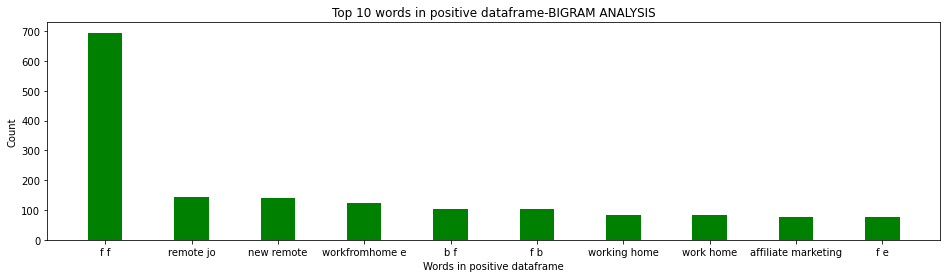

In [596]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

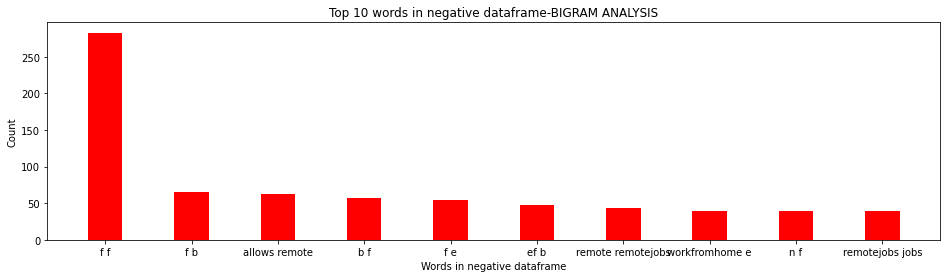

In [597]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

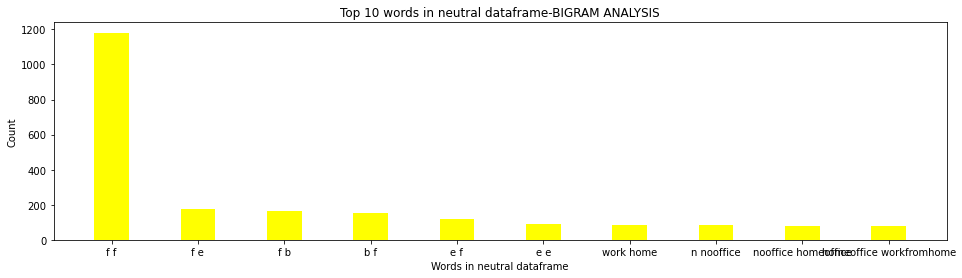

In [598]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [599]:


positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['uploaded', 'short', 'new', 'video', 'new', 'cryptocurrency', 'ai', 'bot', 'helps', 'earn', 'profits', 'whether', 'markets', 'e']
Sentence after removing stopwords: ['electrical', 'engineer', 'global', 'standards', 'nat', 'meta', 'nmeta', 'seeking', 'electrical', 'engineer', 'strong', 'project', 'management', 'e']
Sentence after removing stopwords: ['free', 'ebook', 'writing', 'cash', 'shows', 'different', 'ways', 'starting', 'writing', 'earning', 'money', 'st', 'e']
Sentence after removing stopwords: ['love', 'love', 'work', 'workfromhome']
Sentence after removing stopwords: ['worked', 'remotely', 'yrs', 'career', 'great', 'workfromhome', 'wednesdaymotivation', 'n', 'working', 'remotely', 'hu', 'e']
Sentence after removing stopwords: ['hide', 'bathroom', 'day', 'work', 'still', 'work', 'right', 'homeoffice', 'workingfromhome']
Sentence after removing stopwords: ['true', 'immigrationupdate', 'immigrationnews', 'immigrationchanges', 'uk', 'immigration

Sentence after removing stopwords: ['ahh', 'e', 'poured', 'steaming', 'cup', 'coffee', 'settle', 'drink', 'coffee', 'enjoy', 'e']
Sentence after removing stopwords: ['focus', 'concentration', 'important', 'assets', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['e', 'cworkbn', 'app', 'e', 'sound', 'appealing', 'company', 'text', 'e', 'cworkbn', 'app', 'e', 'exclusive', 'e']
Sentence after removing stopwords: ['totally', 'free', 'video', 'generate', 'viral', 'social', 'media', 'content', 'within', 'click', 'join']
Sentence after removing stopwords: ['make', 'first', 'dollars', 'online', 'never', 'made', 'money', 'online', 'chance', 'workfromhome']
Sentence after removing stopwords: ['teddy', 'standby', 'ready', 'help', 'mom', 'busy', 'day', 'meetings', 'dogsoftwitter', 'labs', 'workfromhome', 'lockdownlife', 'e']
Sentence after removing stopwords: ['truth', 'workingfromhome', 'australia', 'meet', 'new', 'colleagues', 'fr

Sentence after removing stopwords: ['new', 'remote', 'jo', 'product', 'consultant', 'usa', 'west', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['f', 'veterans', 'f', 'f', 'learn', 'skills', 'land', 'high', 'paying', 'jo', 'tech', 'help', 'f', 'f', 'b', 'find', 'e', 'ac', 'ef', 'b', 'f', 'e']
Sentence after removing stopwords: ['post', 'ads', 'internet', 'often', 'reap', 'bigger', 'profits', 'cool', 'marketing', 'software', 'saves', 'e']
Sentence after removing stopwords: ['choose', 'virtual', 'office', 'nwe', 'offer', 'serviced', 'offices', 'various', 'types', 'packages', 'available', 'e']
Sentence after removing stopwords: ['polygon', 'matic', 'metric', 'update', 'naccess', 'metrics', 'live', 'trade', 'calls', 'matic', 'e']
Sentence after removing stopwords: ['free', 'charge', 'training', 'inside', 'earn', 'figure', 'side', 'income', 'online', 'join']
Sentence after removing stopwords: ['best', 'height', 'adjustable', 'standing', 'desk', 'home', 'office', 'nfor', 'des

Sentence after removing stopwords: ['passion', 'football', 'turn', 'passion', 'income', 'source', 'e', 'bd', 'nif', 'interested', 'e']
Sentence after removing stopwords: ['dollarbiz', 'dollar', 'proven', 'year', 'paying', 'program', 'may', 'think', 'dollar', 'program', 'much', 'e']
Sentence after removing stopwords: ['chair', 'easy', 'n', 'moderndesign', 'officespace', 'workspace', 'furnituredesign', 'officefurniture', 'manufacturers', 'chair', 'e']
Sentence after removing stopwords: ['recent', 'survey', 'workers', 'said', 'willing', 'stay', 'current', 'employer', 'coul', 'e']
Sentence after removing stopwords: ['client', 'advisor', 'nat', 'social', 'security', 'scotland', 'nlocation', 'monifieth', 'sidlaw', 'ward', 'client', 'advisor', 'jo', 'location', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['gra', 'total', 'c

Sentence after removing stopwords: ['one', 'best', 'thing', 'workout', 'softwaredevelopment', 'workout', 'workingfromhome']
Sentence after removing stopwords: ['unexpected', 'benefits', 'homeworking', 'homeoffice', 'hr', 'smallbiz']
Sentence after removing stopwords: ['easily', 'start', 'earning', 'month', 'experience', 'needed', 'n']
Sentence after removing stopwords: ['want', 'increase', 'income', 'gain', 'experience', 'start', 'new', 'career', 'easy', 'jobs', 'c', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['thought', 'extra', 'income', 'selling', 'something', 'one', 'top', 'workfromhome', 'tips', 'open', 'shopify', 'store', 'e']
Sentence after removing s

Sentence after removing stopwords: ['new', 'remote', 'jo', 'senior', 'product', 'designer', 'plan', 'remotejo', 'workfromhome']
Sentence after removing stopwords: ['video', 'free', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['sharing', 'top', 'tips', 'create', 'better', 'work', 'life', 'balance', 'working', 'home', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'technical', 'support', 'manager', 'messaging', 'workfromhome']
Sentence after removing stopwords: ['monday', 'weekly', 'deals', 'live', 'weeklydeals', 'dealchangermonday', 'e']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['scandal', 'scandal', 'elect', 'i

Sentence after removing stopwords: ['essentially', 'vas', 'time', 'savers', 'time', 'important', 'commodity', 'business', 'life', 'virtualassistants', 'e']
Sentence after removing stopwords: ['hsbc', 'outlined', 'trend', 'working', 'home', 'impacting', 'businesses', 'latest', 'economic', 'commentary', 'e']
Sentence after removing stopwords: ['happy', 'sunday', 'makemoneyonline', 'workfromhome', 'cryptocurrency', 'nposted', 'via', 'webtalk']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['win', 'wfh', 'establish', 'systems', 'help', 'achieve', 'goals', 'tiptuesday', 'winwfh', 'workingfromhome', 'e']
Sentence after removing stopwords: ['initiate', 'amp', 'embrace', 'entrepreneurship', 'reach', 'full', 'potential', 'business', 'efficient', 'prominent', 'amp', 'prof', 'e']
Sentence after removing stopwords: ['solution', 'cloud'

Sentence after removing stopwords: ['looking', 'make', 'extra', 'money', 'freelancing', 'great', 'way', 'diversify', 'income', 'flexible', 'hours', 'n', 'freelance', 'e']
Sentence after removing stopwords: ['working', 'home', 'looking', 'new', 'ways', 'stay', 'active', 'f', 'f', 'f', 'nread', 'well', 'whilst', 'working', 'fr', 'e']
Sentence after removing stopwords: ['best', 'monitor', 'workingfromhome', 'n']
Sentence after removing stopwords: ['coworker', 'zoey', 'happy', 'friday', 'supermutt', 'dogsoftwitter', 'dogs', 'workingfromhome']
Sentence after removing stopwords: ['quickly', 'learn', 'construct', 'really', 'good', 'cta', 'want', 'receive', 'extra', 'potential', 'clients', 'venture', 'e']
Sentence after removing stopwords: ['interesting', 'survey', 'results', 'workfromhome', 'mlmtools']
Sentence after removing stopwords: ['work', 'remotely', 'net', 'developer', 'logically', 'secure', 'workfromhome', 'backendprogramming', 'n']
Sentence after removing stopwords: ['chair', 'smart

Sentence after removing stopwords: ['powerful', 'techniques', 'ntransform', 'clients', 'lives']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['high', 'valued', 'home', 'insurance', 'home', 'qualify', 'house', 'homeoffice', 'homeowner', 'e']
Sentence after removing stopwords: ['remote', 'principal', 'engineer', 'kotlin', 'java', 'high', 'load', 'marketplace', 'x', 'avantgarde', 'e', 'e', 'ccreating', 'fans', 'e', 'allows', 'e']
Sentence after removing stopwords: ['although', 'prefer', 'omnifocus', 'anything', 'really', 'work', 'know', 'need', 'accomplish', 'n', 'nooffice', 'e']
Sentence after removing stopwords: ['today', 'e', 'progress', 'old', 'carpet', 'underlay', 'taken', 'dpc', 'insulation', 'started', 'laying', 'new', 'oak', 'floor', 'e']
Sentence after removing stopwords: ['jobsearchtips', 'understand', 'new', 'opportunities', 'gt', 'gt', 'remote', 'jo', '

Sentence after removing stopwords: ['check', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'likely', 'best', 'well', 'performing', 'method', 'traffic', 'gen', 'e']
Sentence after removing stopwords: ['live', 'laptop', 'lifestyle', 'makemoneyonline', 'singlemom', 'stayathomejobs', 'passiveincome', 'e']
Sentence after removing stopwords: ['homeoffice', 'defends', 'right', 'seize', 'channel', 'asylumseekers', 'e', 'phones']
Sentence after removing stopwords: ['hiring', 'nsign', 'middleman', 'free', 'charge', 'jobs', 'agriculture', 'industry', 'hotels', 'e']
Sentence after removing stopwords: ['biztips', 'workfromhome', 'excellent', 'strategy', 'teach', 'practical', 'ideas', 'tempt', 'people

Sentence after removing stopwords: ['end', 'week', 'wearecitizensadvice', 'ssw', 'say', 'huge', 'thankyou', 'volunteers', 'e']
Sentence after removing stopwords: ['turning', 'part', 'home', 'new', 'office', 'space', 'major', 'hurdle', 'goinghomebased', 'homebased', 'workfromhome', 'e']
Sentence after removing stopwords: ['jan', 'new', 'year', 'full', 'opportunities', 'problem', 'many', 'people', 'nearly', 'year', 'e']
Sentence after removing stopwords: ['two', 'new', 'exciting', 'opportunities', 'opened', 'join', 'billi', 'team', 'nwe', 'looking', 'ui', 'ux', 'designer', 'vp', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['cc', 'e', 'ing', 'colleague', 'e', 'cyou', 'e', 

Sentence after removing stopwords: ['f', 'f', 'apply', 'fast', 'hr', 'part', 'time', 'amp', 'full', 'time', 'work', 'home', 'jobs', 'littl', 'via', 'e']
Sentence after removing stopwords: ['good', 'news', 'everyone', 'womeninbusiness', 'womenintech', 'workingmom', 'workfromhome', 'remotework']
Sentence after removing stopwords: ['love', 'windows', 'small', 'big', 'minor', 'ones', 'people', 'observation', 'inspiration', 'communication', 'street', 'e']
Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'f', 'avon', 'years', 'strong', 'nwhat', 'better', 'time', 'join', 'nstart', 'pathway', 'premiere', 'today', 'nsign', 'start', 'e']
Sentence after removing stopwords: ['look', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['back', 'work', 'tomorrow', 'e', 'fancy', 'new', 'monitor', 'make', 'productive', 'great', 'guide', 'work', 'hom', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'mid', 'market', 'fi

Sentence after removing stopwords: ['e', 'able', 'want', 'nif', 'suits', 'personal', 'circumstances', 'employer', 'able', 'willing', 'e']
Sentence after removing stopwords: ['bihar', 'nincrease', 'number', 'pregnant', 'wome', 'e']
Sentence after removing stopwords: ['thinking', 'starting', 'line', 'business', 'amazon', 'fba', 'store', 'e', 'better', 'alternative', 'join', 'e']
Sentence after removing stopwords: ['senior', 'product', 'manager', 'higher', 'education', 'nat', 'blackbaud', 'nsenior', 'product', 'manager', 'product', 'management', 'want', 'chan', 'e']
Sentence after removing stopwords: ['tips', 'find', 'jo', 'love', 'actually', 'according', 'career', 'recruiter']
Sentence after removing stopwords: ['f', 'e', 'f', 'f', 'b', 'remote', 'working', 'comes', 'many', 'pros', 'us', 'meeting', 'wednesdays', 'today', 'day', 'stay', 'focused', 'wit', 'e']
Sentence after removing stopwords: ['nice', 'video', 'related', 'free', 'paid', 'today', 'workathome', 'workfromhome', 'homebusines

Sentence after removing stopwords: ['f', 'ef', 'b', 'f', 'f', 'f', 'new', 'youtube', 'video', 'f', 'f', 'nthe', 'best', 'monitor', 'arm', 'mount', 'buyer', 'beware', 'vivo', 'monitor', 'arm', 'desk', 'mount', 'setup', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'marketing', 'automation', 'specialist', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['interesting', 'benefits', 'remote', 'work', 'remoteworking', 'remotejo', 'n', 'workingfromhome', 'flexibleworking', 'n']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['video', 'streaming', 'microsoft', 'teams', 'soon', 'better', 'n', 'business', 'av', 'e']
Sentence after removing stopwords: ['nerv

Sentence after removing stopwords: ['knitting', 'blanket', 'ganga', 'blankie', 'super', 'comfy', 'soft', 'knit', 'n', 'ganga', 'knitting', 'crochet', 'e']
Sentence after removing stopwords: ['may', 'startup', 'still', 'portray', 'professional', 'image', 'without', 'costly', 'office', 'look', 'options', 'e']
Sentence after removing stopwords: ['digital', 'first', 'financial', 'services', 'reap', 'gains', 'cybersecurity', 'technology', 'bigdata', 'log', 'workfromhome', 'network', 'e']
Sentence after removing stopwords: ['wish', 'people', 'stop', 'portraying', 'workingfromhome', 'kind', 'paradise', 'click', 'screen', 'wh', 'e']
Sentence after removing stopwords: ['enrolling', 'accountability', 'partner', 'give', 'headspace', 'creative', 'within', 'business', 'blog', 'e']
Sentence after removing stopwords: ['discover', 'step', 'system', 'made', 'extraordinary', 'hours', 'inside', 'hidden', 'billion', 'online', 'mark', 'e']
Sentence after removing stopwords: ['realise', 'go', 'office', 'fir

Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['comprehending', 'digital', 'communications', 'campaigns', 'amp', 'content', 'rock', 'social', 'handle', 'n', 'marketingandadvertising', 'e']
Sentence after removing stopwords: ['working', 'home', 'still', 'reality', 'many', 'people', 'may', 'permanent', 'know', 'fsa', 'eligible', 'e']
Sentence after removing stopwords: ['announcement', 'fresh', 'plans', 'overhaul', 'london', 'headquarters', 'citigroup', 'providing', 'vision', 'e']
Sentence after removing stopwords: ['good', 'morning', 'world', 'f', 'f', 'f', 'f', 'workflow', 'pgemp', 'workfromhomelife', 'f', 'f', 'f', 'f', 'f', 'e', 'f', 'f', 'b', 'ef', 'b', 'f']
Sentence after removing stopwords: ['heating', 'cabs', 'winter', 'guess', 'engines', 'idling', 'polluted', 'air', 'top', 'everything', 'el', 'e']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['discover', 'beautiful', 'wall', 'clocks', 'art', 'shop', 'nft', 'clock', 'minimalist', 'large', 'classic', 'white', 'grid', 'pattern', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['instant', 'access', 'super', 'affiliate', 'swipe', 'file', 'generates', 'commissions', 'daily', 'c', 'join', 'e']
Sentence after removing stopwords: ['list', 'seven', 'general', 'public', 'expectations', 'upcoming', 'indian', 'budget', 'sag', 'infotech', 'offic', 'e']
Sentence after removing stopwords: ['fun', 'facts', 'wfh', 'life', 'n', 'neighbours', 'think', 'jobless', 'n', 'family', 'thinks', 'getting', 'paid', 'talk', 'e']
Sentence after removing stopwords: ['technical', 'writer', 'grapecity', 'nsummary', 'technical', 'writer', 'responsible', 'generating', 'innovative', 'ideas', 'conte', 'e']
Sentence after remov

Sentence after removing stopwords: ['creative', 'writing', 'degrees', 'truejobs', 'truejobs', 'project', 'profile', 'employer', 'e']
Sentence after removing stopwords: ['f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'give', 'chance', 'make', 'first', 'paypal', 'small', 'work', 'interested', 'comment', 'yes', 'e']
Sentence after removing stopwords: ['advanced', 'technology', 'security', 'n', 'tvg', 'tvgcoin', 'cryptocurrency', 'vindax', 'earn', 'workfromhome', 'investment', 'e']
Sentence after removing stopwords: ['senior', 'project', 'manager', 'nat', 'fix', 'creative', 'ncome', 'join', 'client', 'multidisciplinary', 'creative', 'studio', 'blend', 'e']
Sentence after removing stopwords: ['send', 'business', 'papers', 'business', 'stuff', 'sure', 'business', 'desk', 'app', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'support', 'engineer', 'amer', 'vacancy', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'togethe

Sentence after removing stopwords: ['announced', 'company', 'wide', 'slack', 'channel', 'quitting', 'strong', 'urge', 'add', 'yo', 'e']
Sentence after removing stopwords: ['e', 'first', 'cup', 'copy', 'day', 'heaven', 'amwritersclu', 'volunteer', 'tasks', 'writing', 'amp', 'e']
Sentence after removing stopwords: ['working', 'home', 'easier', 'ni', 'hating', 'lack', 'clear', 'line', 'home', 'work', 'nthey', 'say', 'e']
Sentence after removing stopwords: ['new', 'l', 'cloning', 'process', 'launches', 'online', 'lifestyle', 'business', 'within', 'hours', 'even', 'star', 'e']
Sentence after removing stopwords: ['people', 'return', 'hybridworking', 'uk', 'organisations', 'need', 'make', 'sure', 'digitalexperience', 'scr', 'e']
Sentence after removing stopwords: ['biztips', 'workfromhome', 'leads', 'every', 'day', 'crucial', 'success', 'may', 'look', 'guide', 'regarding', 'h', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'r

Sentence after removing stopwords: ['remote', 'jo', 'hiring', 'full', 'stack', 'engineer', 'napply', 'nodejs', 'e']
Sentence after removing stopwords: ['want', 'truly', 'free', 'starting', 'online', 'business', 'business', 'earn', 'well', 'per', 'e']
Sentence after removing stopwords: ['changing', 'covid', 'restrictions', 'hard', 'keep', 'take', 'look', 'latest', 'working', 'home', 'g', 'e']
Sentence after removing stopwords: ['best', 'travel', 'deal', 'unbeatable', 'prices', 'n', 'losangeles', 'houston', 'sanantonio', 'riverside', 'e']
Sentence after removing stopwords: ['l', 'shaped', 'home', 'office', 'desk', 'perfect', 'office', 'kids', 'bedrooms', 'go', 'jds', 'kitchens', 'amp', 'bedrooms', 'ltd', 'e']
Sentence after removing stopwords: ['start', 'successful', 'business', 'expensive', 'hobby', 'questions', 'ask', 'first', 'workfromhome', 'wahm']
Sentence after removing stopwords: ['new', 'business', 'expert', 'piece', 'f', 'f', 'nfor', 'majority', 'businesses', 'normal', 'working'

Sentence after removing stopwords: ['new', 'remote', 'jo', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'n', 'lead', 'frontend', 'software', 'remotejobs', 'remoteworking', 'workfromhome', 'homejobs', 'remotejo', 'techjobs']
Sentence after removing stopwords: ['cancelspotify', 'free', 'website', 'hosting', 'ad', 'digitalmarketing', 'e']
Sentence after removing stopwords: ['last', 'week', 'january', 'savings', 'deals', 'value', 'flyer', 'online', 'great', 'prices', 'everything', 'need', 'st', 'e']
Sentence after removing stopwords: ['people', 'willing', 'take', 'paycuts', 'lose', 'benefits', 'keep', 'workingfromhome']
Sentence after removing stopwords: ['complete', 'done', 'system', 'gives', 'everything', 'need', 'create', 'thousands', 'per', 'month', 'passive', 'monthly', 'income', 'e']
Sentence after removing stopwords: ['wp', 'legal', 'briefcase', 'january', 'nsouth', 'african', 'businesses', 'face', 'costly', 'problem', 'e', 'getting', 'peopl', 'e']
Sentence after removing stopwords: ['wa

Sentence after removing stopwords: ['brand', 'new', 'billion', 'dollar', 'loophole', 'npays', 'every', 'day', 'simply', 'copy', 'amp', 'pasting', 'online', 'e']
Sentence after removing stopwords: ['comfortable', 'eye', 'level', 'monitor', 'release', 'neck', 'stress', 'bring', 'excellent', 'comfort', 'e']
Sentence after removing stopwords: ['published', 'affiliate', 'marketing', 'complete', 'guide', 'beginners']
Sentence after removing stopwords: ['fantastic', 'looking', 'new', 'extension', 'built', 'team', 'ready', 'decorating', 'homedecor', 'home', 'homeoffice', 'e']
Sentence after removing stopwords: ['love', 'train', 'guide', 'people', 'non', 'mission', 'building', 'entrepreneurs', 'better', 'believe', 'ndo', 'want', 'e']
Sentence after removing stopwords: ['looking', 'career', 'path', 'sabio', 'help', 'f', 'f', 'dcheck', 'success', 'story', 'edmund', 'busin', 'e']
Sentence after removing stopwords: ['best', 'ways', 'achieve', 'work', 'life', 'balance', 'benefits', 'truejobs', 'true

Sentence after removing stopwords: ['agile', 'n', 'maliksiinc', 'hiring', 'hiringnow', 'workingfromhome', 'workfromhomejobs', 'flexiblework', 'kotlin', 'e']
Sentence after removing stopwords: ['amazing', 'tips', 'find', 'good', 'work', 'life', 'balance', 'especially', 'home', 'office', 'e']
Sentence after removing stopwords: ['got', 'selected', 'second', 'round', 'first', 'remote', 'interview', 'really', 'happy', 'f', 'f', 'c', 'need', 'work', 'hard', 'e']
Sentence after removing stopwords: ['webex', 'desk', 'camera', 'camera', 'need', 'complete', 'office', 'setup', 'ncontact', 'sales', 'team', 'inform', 'e']
Sentence after removing stopwords: ['projects', 'organization', 'open', 'accessible', 'exception', 'shared', 'l', 'e']
Sentence after removing stopwords: ['new', 'rules', 'prevent', 'thousands', 'refugees', 'joining', 'close', 'family', 'uk', 'tuesday', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'software', 'engineer', 'remotejo', 'hiring', 'workfromhome']
Sen

Sentence after removing stopwords: ['saying', 'got', 'used', 'workingfromhome', 'right', 'wish', 'turn', 'c', 'temp', 'degrees', 'e']
Sentence after removing stopwords: ['c', 'today', 'e', 'agent', 'spotlight', 'e', 'c', 'ncongratulations', 'outstanding', 'weekend', 'hector', 'nwe', 'love', 'watching', 'grow', 'e']
Sentence after removing stopwords: ['ci', 'c', 'e', 'done', 'e', 'kristen', 'starr', 'felt', 'hopeless', 'workdays', 'grew', 'longer', 'pandemic', 'many', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'enterprise', 'account', 'executive', 'greater', 'chicago', 'area']
Sentence after removing stopwords: ['better', 'startups', 'hiring', 'remotely', 'f', 'f', 'b', 'n', 'startups', 'hiring', 'remote', 'talent', 'f', 'f', 'c', 'f', 'f', 'f', 'bd']
Sentence after removing stopwords: ['plus', 'footrest', 'black', 'footrest', 'f', 'b', 'f', 'free', 'shipping', 'orders', 'n']
Sentence after removing stopwords: ['free', 'download', 'make', 'money', 'online', 'ultimat

Sentence after removing stopwords: ['love', 'wfh', 'working', 'virtual', 'recruitment', 'fair', 'right', 'moments', 'talking', 'e']
Sentence after removing stopwords: ['india', 'nincrease', 'number', 'pregnant', 'wome', 'e']
Sentence after removing stopwords: ['latest', 'briefing', 'discusses', 'recently', 'published', 'draft', 'scheme', 'right', 'request', 'remote', 'working', 'bill', 'e']
Sentence after removing stopwords: ['due', 'covid', 'understand', 'cybersecurity', 'getting', 'important', 'widi', 'choose', 'aws', 'system', 'e']
Sentence after removing stopwords: ['icymi', 'cra', 'updated', 'forms', 'homeoffice', 'expenses', 'major', 'change', 'deduc', 'e']
Sentence after removing stopwords: ['modern', 'f', 'f', 'x', 'f', 'f', 'bf', 'f', 'f', 'bdidea', 'f', 'f', 'e', 'premium', 'granite', 'nplease', 'visit', 'ur', 'webpage', 'f', 'f', 'efor', 'bitcoin', 'metaverse', 'crypto', 'nftcommunity', 'e']
Sentence after removing stopwords: ['bold', 'penguin', 'looking', 'remote', 'cloud',

Sentence after removing stopwords: ['good', 'morning', 'e', 'ef', 'b', 'f', 'f', 'f', 'c', 'world', 'f', 'f', 'c', 'ntime', 'work', 'done', 'e', 'c', 'workingfromhome', 'mondaymotivation', 'goodmorning']
Sentence after removing stopwords: ['great', 'imagination', 'workplace', 'business', 'vp', 'businessnews', 'hybridwork', 'e']
Sentence after removing stopwords: ['classic', 'window', 'shutter', 'classic', 'british', 'interior', 'f', 'f', 'ac', 'f', 'f', 'nsurround', 'homeoffice', 'space', 'things', 'love', 'e']
Sentence after removing stopwords: ['best', 'gracias', 'onlinebusiness', 'onlinemarketing', 'bonus', 'oportunidad', 'homeoffice']
Sentence after removing stopwords: ['real', 'definition', 'virtual', 'assistant', 'per', 'us', 'think', 'n', 'wishup', 'virtualassistants', 'remotework', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['custome

Sentence after removing stopwords: ['paper', 'era', 'gone', 'f', 'f', 'nit', 'time', 'paper', 'free', 'smarter', 'secure', 'corporate', 'governance', 'nyou', 'request', 'sm', 'e']
Sentence after removing stopwords: ['much', 'debate', 'around', 'topic', 'workfromhome', 'preferred', 'option', 'n', 'womensinspire']
Sentence after removing stopwords: ['payroll', 'supervisor', 'robert', 'half', 'nrobert', 'half', 'currently', 'supporting', 'busy', 'business', 'located', 'edinburgh', 'th', 'e']
Sentence after removing stopwords: ['latest', 'nincrease', 'number', 'pregnant', 'wome', 'e']
Sentence after removing stopwords: ['office', 'mate', 'kind', 'freeloader', 'sure', 'cute', 'workfromhome', 'dogsoftwitter']
Sentence after removing stopwords: ['emailmarketing', 'residualincome', 'homebusiness', 'particular', 'daily', 'traffic', 'system', 'method', 'getting', 'traffic', 'actu', 'e']
Sentence after removing stopwords: ['software', 'developer', 'new', 'graduate', 'nat', 'ceridian', 'nceridian'

Sentence after removing stopwords: ['opportunity', 'f', 'f', 'e', 'nlooking', 'straightforward', 'bs', 'way', 'increase', 'income', 'improve', 'sales', 'skills', 'ngo', 'e']
Sentence after removing stopwords: ['jesuschrist', 'workfromhome', 'biblestudy', 'realitycheck', 'f', 'f', 'f', 'b', 'c', 'ef', 'b', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'n', 'years', 'social', 'media', 'f', 'f', 'f', 'b', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'n', 'embarrassing', 'e']
Sentence after removing stopwords: ['used', 'tools', 'particular', 'one', 'feel', 'free', 'leave', 'comm', 'e']
Sentence after removing stopwords: ['f', 'f', 'project', 'admission', 'hiring', 'remote', 'senior', 'software', 'engineer', 'full', 'stack', 'php', 'web', 'projectadmission', 'e']
Sentence after removing stopwords: ['work', 'home', 'ends', 'tech', 'company', 'warns', 'talent', 'exodus', 'nread', 'full', 'story']
Sentence after removing stopwords: ['blog', 'update', 'new', 'guidelines', 'condoland', 'hope', 'helps', 'finance', 'w

Sentence after removing stopwords: ['new', 'pilot', 'programme', 'launching', 'uk', 'later', 'year', 'prospect', 'shorter', 'working', 'week', 'seems', 'closer', 'e']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['new', 'week', 'new', 'challenges', 'n', 'homeoffice', 'workhard', 'besafe']
Sentence after removing stopwords: ['smart', 'app', 'plays', 'videos', 'right', 'inside', 'emails', 'drive', 'massive', 'traffic', 'nconversions', 'sales', 'clients', 'e']
Sentence after removing stopwords: ['complete', 'done', 'system', 'gives', 'everything', 'need', 'create', 'thousands', 'per', 'month', 'passive', 'monthly', 'income', 'e']
Sentence after removing stopwords: ['introverts', 'actually', 'win', 'lockdown', 'via', 'worklife', 'consulting', 'kuroken', 'e']
Sentence after removing stopwords: ['check', 'free', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after rem

Sentence after removing stopwords: ['look', 'free', 'earn', 'seconds', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['workfromhome', 'office', 'setting', 'sitting', 'much', 'day', 'uncommon', 'standing', 'work', 'e']
Sentence after removing stopwords: ['new', 'collection', 'meet', 'dinah', 'womensfashion', 'giftsforher', 'giftidea', 'workingfromhome', 'shoppingday', 'e']
Sentence after removing stopwords: ['day', 'working', 'night', 'sleeping', 'n', 'workingfromhome', 'happy']
Sentence after removing stopwords: ['much', 'time', 'wasting', 'home', 'based', 'business', 'time', 'figure', 'works', 'al', 'e']
Sentence after removing stopwords: ['better', 'people', 'choice', 'possible', 'better', 'environment', 'convert', 'unused', 'office', 'space', 'e']
Sentence after removing stopwords: ['believes', 'happy', 'customers', 'happy', 'employees', 'njoin', 'team', 'enthusiastic', 'ind', 'e']
Sentence after removing stopwords: ['enjoy', 'writing', 'journ

Sentence after removing stopwords: ['see', 'instagram', 'photo', 'hindesights', 'success', 'entrepreneur', 'e']
Sentence after removing stopwords: ['workfromhome', 'homebusiness', 'internetmarketing', 'important', 'video', 'tutorials', 'explains', 'ways', 'begin', 'worthwhile', 'ta', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['use', 'social', 'media', 'promote', 'company', 'f', 'f', 'nconsider', 'networks', 'likely', 'help', 'achieve', 'e']
Sentence after removing stopwords: ['happy', 'birthday', 'tobe', 'hooper', 'filmmakers', 'filmmaking', 'horror', 'e']
Sentence after removing stopwords: ['happy', 'quotes', 'coffee', 'thank', 'universe', 'homeoffice']
Sentence after removing stopwords: ['let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['post', 'ads', 'internet', 'often', 'reap', 'bi

Sentence after removing stopwords: ['separate', 'close', 'gardenroom', 'oasis', 'tranquillity', 'even', 'e', 'metre', 'main', 'hous', 'e']
Sentence after removing stopwords: ['desk', 'booking', 'system', 'gives', 'employees', 'certainty', 'desk', 'available', 'arrive', 'work', 'e']
Sentence after removing stopwords: ['members', 'team', 'enjoying', 'spot', 'training', 'workingfromhome', 'thanks', 'employment', 'specialist', 'dave', 'e']
Sentence after removing stopwords: ['want', 'work', 'remotely', 'experienced', 'python', 'django', 'contractor', 'full', 'time', 'stack', 'builders', 'e']
Sentence after removing stopwords: ['e', 'hard', 'see', 'anyone', 'pick', 'zoom', 'either', 'free', 'paid', 'versions', 'packages', 'e']
Sentence after removing stopwords: ['life', 'worth', 'living', 'unless', 'willing', 'take', 'big', 'chances', 'go', 'broke', 'eliot', 'wiggington', 'go', 'e']
Sentence after removing stopwords: ['senior', 'full', 'stack', 'developer', 'open', 'remote', 'nat', 'movewor

Sentence after removing stopwords: ['brand', 'new', 'facebook', 'live', 'coaching', 'build', 'connection', 'affiliate', 'marketing', 'well', 'business', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['n', 'tweeted', 'new', 'remote', 'jo', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e']
Sentence after removing stopwords: ['obtain', 'instant', 'access', 'little', 'known', 'database', 'top', 'selling', 'digital', 'products', 'pay', 'commissions', 'jo', 'e']
Sentence after removing stopwords: ['today', 'day', 'speak', 'lines', 'every', 'morning', 'discover', 'powerful', 'omnipotent', 'yo', 'e']
Sentence after removing stopwords: ['craft', 'good', 'open', 'rate', 'email', 'campaigns', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e']
Sentence after

Sentence after removing stopwords: ['manufacturing', 'jobs', 'available', 'careerbarn', 'apply', 'manufacturing', 'team', 'member', 'full', 'time', 'amp', 'jobopenings', 'jobs', 'e']
Sentence after removing stopwords: ['check', 'free', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['fresh', 'assistant', 'manager', 'management', 'nat', 'walmart', 'canada', 'nposition', 'summaryto', 'support', 'store', 'manager', 'manage', 'e']
Sentence after removing stopwords: ['desk', 'booking', 'system', 'gives', 'employees', 'certainty', 'need', 'desk', 'available', 'arrive', 'wor', 'e']
Sentence after removing stopwords: ['associate', 'product', 'manager', 'site', 'search', 'optimization', 'nat', 'canadian', 'tire', 'corporation', 'nhelp', 'us', 'boldly', 'shape', 'retail', 'e']
Sentence after removing stopwords: ['new', 'episode', 'productivity', 'cast', 'four', 'day', 'workweek', 'productivity']
Sentence after removing stopwords: ['funny', 

Sentence after removing stopwords: ['writers', 'anyone', 'works', 'desk', 'important', 'layout', 'tidiness', 'organisation', 'desk', 'e']
Sentence after removing stopwords: ['seamless', 'set', 'nsize', 'l', 'n', 'e', 'ac', 'n', 'workout', 'wonho', 'gymmotivation', 'gymlife', 'running', 'e']
Sentence after removing stopwords: ['new', 'workfromhome', 'cabins']
Sentence after removing stopwords: ['days', 'free', 'annual', 'convention', 'nwill', 'nregister']
Sentence after removing stopwords: ['caught', 'mute', 'e', 'talking', 'dog', 'entered', 'top', 'things', 'worry', 'workfromhome']
Sentence after removing stopwords: ['looking', 'bright', 'frontend', 'developers', 'hr', 'tech', 'company', 'product', 'experience', 'must', 'react', 'angular', 'vue', 'e']
Sentence after removing stopwords: ['getting', 'ready', 'go', 'live', 'virtual', 'webinar', 'apparently', 'e', 'needed', 'workfromhome', 'keynotespeaker']
Sentence after removing stopwords: ['hey', 'joined', 'network', 'called', 'savvycon

Sentence after removing stopwords: ['looking', 'internet', 'service', 'mbps', 'enough', 'good', 'gbps', 'work', 'home', 'internet', 'workfromhome', 'fiberoptic']
Sentence after removing stopwords: ['e', 'put', 'together', 'impressive', 'gallery', 'wall', 'part', 'living', 'room', 'e', 'interiordesign', 'e']
Sentence after removing stopwords: ['c', 'service', 'delivery', 'manager', 'role', 'available', 'amazing', 'candidates', 'ready', 'demonstrate', 'knowledge', 'ta', 'e']
Sentence after removing stopwords: ['make', 'money', 'clickbank', 'make', 'money', 'clickbank', 'fast', 'solution', 'clickbank', 'e']
Sentence after removing stopwords: ['quickly', 'learn', 'construct', 'really', 'good', 'cta', 'want', 'receive', 'extra', 'potential', 'clients', 'venture', 'e']
Sentence after removing stopwords: ['critical', 'ebooks', 'keys', 'success', 'working', 'freelancer', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e']
Sentence after removing stopwords: ['see', 'full', 'project', 'gt', 'gt', 'o

Sentence after removing stopwords: ['mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'actually', 'many', 'potential', 'customers', 'social', 'network', 'e']
Sentence after removing stopwords: ['google', 'searches', 'popular', 'homeoffice', 'products', 'skyrocketed', 'reveal', 'essentials', 'demand', 'e']
Sentence after removing stopwords: ['giveaway', 'day', 'doyourdata', 'super', 'eraser', 'win', 'amp', 'mac', 'via', 'spartipp', 'e']
Sentence after removing stopwords: ['work', 'saturday', 'fun', 'workfromhome', 'entrepreneur']
Sentence after removing stopwords: ['interested', 'home', 'office', 'help', 'homeoffice', 'office', 'renovation', 'remodel', 'e']
Sentence after removing stopwords: ['new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e']
Sentence after removing stopwords: ['human', 'civilisation', 'greatly', 'shaken', 'outbreak', 'covid', 'pandemic', 'bedroom', 'trans', 'e']
Sentence 

Sentence after removing stopwords: ['making', 'money', 'spend', 'finally', 'unlock', 'step', 'top', 'earner', 'framework', 'learn', 'g', 'e']
Sentence after removing stopwords: ['admit', 'love', 'winter', 'days', 'nothing', 'beats', 'big', 'fluffy', 'snow', 'flakes', 'n', 'mindfulmonday', 'localagent', 'e']
Sentence after removing stopwords: ['pretty', 'nwelcome', 'makehomecozy', 'homeoffice', 'homecooking', 'e']
Sentence after removing stopwords: ['mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'important', 'video', 'overview', 'reveals', 'proven', 'methods', 'start', 'e']
Sentence after removing stopwords: ['f', 'bc', 'enjoy', 'lazada', 'home', 'office', 'desks', 'amp', 'chairs', 'n', 'homeoffice', 'nasalazadayan', 'legitsalazmall', 'n']
Sentence after removing stopwords: ['look', 'free', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e']
Sentence after removing stopwords: ['biztips', 'workfromhome', 'ideal', 'suggestions', 'locating', 'qualified', 'prosp

In [600]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['nyle', 'enough', 'today', 'cat', 'e', 'life', 'hard', 'catsoftwitter', 'workingfromhome']
Sentence after removing stopwords: ['workfromhome', 'feeling', 'tired', 'sometime', 'sitting', 'chair', 'f', 'f', 'aa', 'whole', 'day', 'bump', 'flat', 'shape', 'nwha', 'e']
Sentence after removing stopwords: ['one', 'common', 'mistakes', 'productivity', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'e']
Sentence after removing stopwords: ['software', 'developer', 'front', 'end', 'remote', 'nat', 'geota', 'nwho', 'geota', 'global', 'leader', 'iot', 'connected', 'transpo', 'e']
Sentence after removing stopwords: ['squid', 'game', 'play', 'day', 'tonight', 'reach', 'dms', 'purchase', 'gamblingtwiitter', 'workingfromhome']
Sentence after removing stopwords: ['fullstack', 'developer', 'mirego', 'quebec', 'city', 'qc', 'canada', 'allows', 'remote', 'remotejobs', 'e']
Sentence after removing stopwords: ['senior', 'software', 'developer', 'b

Sentence after removing stopwords: ['weighs', 'younger', 'employees', 'miss', 'remote', 'work', 'workfromhome', 'flexiblework', 'remotework']
Sentence after removing stopwords: ['software', 'engineer', 'upmetrics', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['anyone', 'game', 'never', 'workfromhome', 'edition', 'thread']
Sentence after removing stopwords: ['digital', 'account', 'executive', 'e', 'remote', 'us', 'canada', 'mexico']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'intermediate', 'e', 'enzyme', 'react', 'f', 'f', 'ef', 'b', 'f', 'integer', 'consulting', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napp', 'e']
Sentence after removing stopwords: ['ux', 'designer', 'heidelbergcement', 'ag', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['payroll', 'officer', 'nat', 'hays', 'specialist', 'recruitment

Sentence after removing stopwords: ['reformieltspolicy', 'nigerians', 'sign', 'petitions', 'demand', 'ielts', 'foreign', 'institutions', 'e']
Sentence after removing stopwords: ['fully', 'remote', 'company', 'see', 'increased', 'productivity', 'daily', 'n', 'remoteworking', 'workingfromhome', 'hoodiefriday']
Sentence after removing stopwords: ['workfromhome', 'dilemma', 'calls', 'past', 'hours', 'need', 'take', 'personal', 'break', 'dogs', 'wa', 'e']
Sentence after removing stopwords: ['range', 'garden', 'rooms', 'versatile', 'used', 'year', 'round', 'fully', 'insulated', 'supplie', 'e']
Sentence after removing stopwords: ['workfromhome', 'networkmarketingrecruiting', 'homebusiness', 'one', 'way', 'build', 'internet', 'business', 'usually', 'bring', 'e']
Sentence after removing stopwords: ['remote', 'working', 'charities', 'need', 'know', 'check', 'blog', 'remoteworking', 'e']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'ar', 'software', 'engineer', 'remote', 'americas',

Sentence after removing stopwords: ['home', 'office', 'home', 'entertainment', 'barcelona', 'bringing', 'designer', 'style', 'every', 'space', 'small', 'e']
Sentence after removing stopwords: ['neck', 'exercises', 'anyone', 'experiencing', 'poor', 'posture', 'due', 'working', 'computer', 'sciencetwitter', 'workfromhome']
Sentence after removing stopwords: ['senior', 'backend', 'engineer', 'us', 'remote', 'c', 'c', 'pulsar', 'informatics', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['cold', 'leads', 'open', 'mails', 'socialmediamarketing', 'tbt', 'businesstraining', 'motivation', 'workfromhome', 'otoslink']
Sentence after removing stopwords: ['workfromhome', 'involve', 'uninteresting', 'furniture', 'pieces', 'antique', 'secretary', 'desks', 'commonly']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'javascript', 'jquery', 'f', 'f', 'ef', 'b', 'f', 'granite', 'digital', 'f', 'aa', 'f', 'f', 'workfromhome'

Sentence after removing stopwords: ['hiring', 'remote', 'fullstack', 'software', 'developer', 'ii', 'iii', 'workfromhome', 'fullstackprogramming', 'n']
Sentence after removing stopwords: ['new', 'remote', 'jo', 'bilingual', 'customer', 'service', 'specialist', 'fluent', 'spanish', 'remote', 'ireland', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'angular', 'ruby', 'f', 'f', 'ef', 'b', 'f', 'telleroo', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply', 'e']
Sentence after removing stopwords: ['data', 'protection', 'amp', 'compliance', 'analyst', 'fullscript', 'allows', 'remote', 'remotejobs', 'jobs', 'e']
Sentence after removing stopwords: ['check', 'development', 'jo', 'openings', 'careerbarn', 'application', 'consulting', 'remote', 'android', 'ios', 'jobopenings', 'e']
Sentence after removing stopwords: ['jo', 'take', 'big', 'toll', 'mental', 'wellbeing', 'hard', 'talk', 'workplace', 'especiall', 'e']
Sentence a

Sentence after removing stopwords: ['worst', 'commute', 'used', 'drive', 'across', 'baybridge', 'sanfrancisco', 'denver', 'mile', 'e']
Sentence after removing stopwords: ['keep', 'desk', 'comfy', 'cozy', 'winter', 'desk', 'lights', 'compact', 'heaters', 'n', 'querneysofficeplus', 'e']
Sentence after removing stopwords: ['another', 'day', 'working', 'home', 'f', 'f', 'least', 'make', 'yummy', 'lunch', 'instead', 'microwave', 'food', 'f', 'f', 'grea', 'e']
Sentence after removing stopwords: ['dedicated', 'linux', 'engineer', 'emea', 'canonical', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['wtf', 'happened', 'crashed', 'bear', 'stearns', 'antiwork', 'news', 'cringe', 'reddit', 'workingfromhome']
Sentence after removing stopwords: ['hard', 'work', 'hard', 'working', 'people', 'n', 'motivation', 'inspiration', 'inspirationalquotes', 'people', 'zambia', 'e']
Sentence after removing stopwords: ['woo', 'takes', 'deep', 'personal', 'interest', 'wo

Sentence after removing stopwords: ['single', 'lever', 'organisations', 'pull', 'begin', 'overcoming', 'labour', 'shortages', 'n', 'thegreatresignation', 'e']
Sentence after removing stopwords: ['hard', 'work', 'supervising', 'every', 'one', 'working', 'home', 'morning', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'f', 'b', 'ef', 'b', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'bordercollie', 'supervising', 'e']
Sentence after removing stopwords: ['support', 'adventure', 'hiring', 'remote', 'remote', 'help', 'desk', 'technician', 'level', 'workfromhome', 'e']
Sentence after removing stopwords: ['workforce', 'remote', 'employee', 'blueprint', 'yourskillsfuture', 'book', 'fopr', 'hr', 'dept', 'humanresources', 'remoteworking', 'e']
Sentence after removing stopwords: ['cozy', 'channel', 'old', 'hollywood', 'glamour', 'luxurious', 'vintage', 'inspired', 'slippers']
Sentence after removing stopwords: ['spent', 'five', 'minutes', 'playing', 'peek', 'boo', 'crow', 'deck', 'e', 'caw', 'e', 'peek', 'curtains', 

Sentence after removing stopwords: ['bailey', 'amp', 'desk', 'day', 'today', 'quite', 'annoying', 'especially', 'keeps', 'lying', 'arms', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'frontend', 'graphicdesign', 'f', 'f', 'ef', 'b', 'f', 'randstad', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply', 'e']
Sentence after removing stopwords: ['tech', 'tips', 'manage', 'personal', 'space', 'remote', 'work', 'remoteworkers', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'android', 'userinterface', 'f', 'f', 'ef', 'b', 'f', 'modus', 'create', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply', 'e']
Sentence after removing stopwords: ['workers', 'care', 'flexible', 'hours', 'remote', 'work', 'wfh', 'gt', 'workfromhome']
Sentence after removing stopwords: ['software', 'development', 'engineer', 'nat', 'inc', 'nprogramming', 'experience', 'least', 'on

Sentence after removing stopwords: ['frustrated', 'e', 'still', 'spinning', 'wheels', 'going', 'nowhere', 'fast', 'internet', 'business', 'e']
Sentence after removing stopwords: ['hope', 'peace', 'reigns', 'part', 'world', 'today', 'everyday', 'n', 'digitalmarketing', 'affiliatemarketing', 'onlinework', 'e']
Sentence after removing stopwords: ['homeoffice', 'half', 'year', 'ago', 'th', 'july', 'year', 'old', 'myrtle', 'cothill', 'applied', 'visa', 'extension', 'e']
Sentence after removing stopwords: ['nyc', 'lately', 'n', 'askali', 'skincare', 'skincaretips', 'rodanandfields', 'premiumskincare', 'glowingskin', 'e']
Sentence after removing stopwords: ['windrush', 'victims', 'dying', 'receiving', 'compensation', 'e', 'homeoffice', 'cowers', 'behind', 'lawyers', 'e']
Sentence after removing stopwords: ['activate', 'c', 'e', 'cmultiple', 'streams', 'e', 'autopilot', 'traffic', 'amp', 'sales', 'inside', 'one', 'dashboard', 'seconds', 'less', 'visit', 'l', 'e']
Sentence after removing stopwo

Sentence after removing stopwords: ['f', 'superhuman', 'hiring', 'remote', 'product', 'lead', 'superhuman', 'remotework', 'remotejo', 'workfromhome', 'userexperience', 'e']
Sentence after removing stopwords: ['people', 'ready', 'f', 'f', 'b', 'without', 'bunch', 'tired', 'excuses', 'network', 'networkmarketing', 'e']
Sentence after removing stopwords: ['developer', 'angular', 'suse', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['finally', 'gets', 'send', 'important', 'mail', 'entire', 'department', 'nalso', 'signs', 'name', 'wrong', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'junior', 'e', 'peoplemanagement', 'devops', 'f', 'f', 'ef', 'b', 'f', 'match', 'profiler', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'nap', 'e']
Sentence after removing stopwords: ['events', 'fundraiser', 'vacancy', 'ryder', 'via', 'remote', 'london', 'napply']
Sentence a

Sentence after removing stopwords: ['foreground', 'commerce', 'platform', 'photographers', 'hiring', 'remote', 'partner', 'operations', 'specialist', 'entry', 'e']
Sentence after removing stopwords: ['morning', 'relaxing', 'music', 'f', 'f', 'nature', 'pictures', 'stress', 'relief', 'nostalgic', 'calm', 'via', 'e']
Sentence after removing stopwords: ['bored', 'jo', 'looking', 'something', 'sabio', 'help', 'check', 'success', 'story', 'billy', 'w', 'e']
Sentence after removing stopwords: ['aws', 'architect', 'remote', 'e', 'us', 'based', 'modus', 'create', 'allows', 'remote', 'remotejobs', 'jobs', 'e']
Sentence after removing stopwords: ['every', 'business', 'big', 'small', 'story', 'n', 'smallbusiness', 'workfromhome', 'piccolosolutions']
Sentence after removing stopwords: ['f', 'litmus', 'hiring', 'remote', 'technical', 'onboarding', 'specialist', 'saas', 'litmus', 'remotework', 'remotejo', 'workfromhome', 'e']
Sentence after removing stopwords: ['staff', 'accountant', 'robert', 'half

Sentence after removing stopwords: ['know', 'struggle', 'sue', 'e', 'hard', 'keep', 'focus', 'suegrayreport', 'workingfromhome', 'deadlines', 'borisjohnsonmustgo']
Sentence after removing stopwords: ['time', 'management', 'tips', 'remote', 'team', 'leaders', 'wfh', 'gt', 'workfromhome']
Sentence after removing stopwords: ['gain', 'productivity', 'efficiency', 'looking', 'hours', 'save', 'time', 'saving', 'wasted', 'minutes', 'ch', 'e']
Sentence after removing stopwords: ['jesuschrist', 'workfromhome', 'naturalimmunity', 'smartlink', 'bodybuilding', 'healing', 'f', 'f', 'f', 'f', 'f', 'b', 'c', 'ef', 'b', 'f', 'e', 'f', 'f', 'f', 'b', 'n', 'nagainst', 'center', 'disease', 'co', 'e']
Sentence after removing stopwords: ['legislators', 'newhampshire', 'considering', 'proposal', 'prevent', 'nh', 'remote', 'workers', 'work', 'state', 'e']
Sentence after removing stopwords: ['data', 'scientist', 'engineer', 'nat', 'south', 'west', 'water', 'nis', 'next', 'role', 'one', 'take', 'active', 'role

Sentence after removing stopwords: ['hiring', 'senior', 'software', 'engineer', 'go', 'remote', 'uk', 'eu', 'remotework', 'f', 'f', 'aa', 'f', 'f', 'ba', 'e']
Sentence after removing stopwords: ['frontend', 'developer', 'jobandtalent', 'madrid', 'spain', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e']
Sentence after removing stopwords: ['legit', 'remote', 'receptionist', 'positions', 'home', 'via', 'remotework', 'remoteworking', 'workfromhome']
Sentence after removing stopwords: ['mobile', 'app', 'mere', 'pression', 'houston', 'sanantonio', 'riverside', 'e']
Sentence after removing stopwords: ['nearly', 'half', 'migrants', 'recourse', 'public', 'funds', 'surveyed', 'migrant', 'rights', 'chari', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'intermediate', 'e', 'javascript', 'typescript', 'f', 'f', 'ef', 'b', 'f', 'emitu', 'f', 'aa', 'f', 'f', 'workfromhome', 'e', 'remote', 'napply']
Sentence after removing stopwords: ['software', '

In [601]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['senior', 'software', 'engineer', 'e', 'enterprise', 'semaphore', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['six', 'month', 'sabbaticals', 'may', 'valuable', 'perk', 'given', 'burnout', 'mentalhealth', 'issues', 'people', 'face', 'today', 'v', 'e']
Sentence after removing stopwords: ['subscript', 'client', 'partner', 'sales', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['traffic', 'hackster', 'review', 'via', 'affiliatemarketing', 'affiliate', 'traffic', 'workingfromhome']
Sentence after removing stopwords: ['show', 'us', 'see', 'workstation', 'let', 'go', 'places', 'virtually', 'f', 'f', 'e', 'n', 'workingfromhome']
Sentence after removing stopwords: ['without', 'lot', 'organization', 'restrictions', 'hybrid', 'e', 'work', 'risks', 'sacrificing', 'productivity', 'e']
Sentence after removing stopwords: ['join', 'us', 'w

Sentence after removing stopwords: ['start', 'lt', 'makemoneyonline', 'makemoneyonlinefree', 'makemoneyonlinenow', 'e']
Sentence after removing stopwords: ['dear', 'michelle', 'campaign', 'requests', 'nthank', 'shinning', 'lig', 'e']
Sentence after removing stopwords: ['home', 'office', 'cooking', 'eating', 'tips', 'alter', 'ego', 'thinks', 'cook', 'even', 'writing', 'advice', 'posts', 'f', 'f', 'f', 'f', 'f', 'b', 'f', 'check', 'e']
Sentence after removing stopwords: ['benefits', 'hiring', 'va', 'n', 'virtualassistant', 'virtualassistantservices', 'smallbusiness', 'workfromhome', 'e']
Sentence after removing stopwords: ['review', 'tell', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'e']
Sentence after removing stopwords: ['vintage', 'vitra', 'sprung', 'back', 'desk', 'chair', 'coming', 'soon', 'vitra', 'vintage', 'desk', 'homeoffice', 'e']
Sentence after removing stopwords: ['e', 'truth', 'womenworkharder', 'equality', 'women', 'workplace', 'workingfromhome', 

Sentence after removing stopwords: ['tips', 'maximizing', 'productivity', 'working', 'home', 'wfh', 'gt', 'workfromhome']
Sentence after removing stopwords: ['make', 'c', 'see', 'matched', 'betting', 'matchedbetting', 'e']
Sentence after removing stopwords: ['almost', 'forgot', 'work', 'e', 'ef', 'b', 'f', 'n', 'homeoffice', 'dogsoftwitter']
Sentence after removing stopwords: ['e', 'wfh', 'life', 'week', 'people', 'demanding', 'f', 'f', 'n', 'atx', 'austin', 'babiesofinstagram', 'e']
Sentence after removing stopwords: ['click', 'n', 'affiliatemarketing', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e']
Sentence after removing stopwords: ['morning', 'home', 'home', 'homeoffice', 'goodmorning', 'gutenmorgen', 'sunrise']
Sentence after removing stopwords: ['saving', 'ten', 'minutes', 'daily', 'seem', 'big', 'big', 'thing', 'hour', 'per', 'week', 'n', 'nooffice', 'e']
Sentence after removing stopwords: ['boss', 'deserves', 'recognition', 'workingfromhome']
Sentence af

Sentence after removing stopwords: ['hr', 'procurement', 'category', 'specialist', 'london', 'nat', 'bramwith', 'consulting', 'nlocation', 'london', 'flexi', 'work', 'salary', 'c', 'p', 'e']
Sentence after removing stopwords: ['freelancer', 'motion', 'designer', 'homeoffice', 'motiondesign', 'digitalsignage', 'adobeaftereffects', 'dasauge', 'jobs', 'e']
Sentence after removing stopwords: ['everywhere', 'around', 'home', 'offices', 'hospitals', 'public', 'spaces', 'schools', 'training', 'centers', 'etc', 'nwe']
Sentence after removing stopwords: ['find', 'altar', 'rock', 'life', 'watch', 'instructional', 'video', 'author', 'james', 'papp', 'amp', 'inspired', 'e']
Sentence after removing stopwords: ['officesupplies', 'homeoffice', 'model', 'beauty', 'plastic', 'organizer', 'pencils']
Sentence after removing stopwords: ['pandemic', 'increasing', 'syphilis', 'rates', 'workfromhome', 'hashtag']
Sentence after removing stopwords: ['streams', 'income', 'clicks', 'makemoneyonline', 'workfromho

Sentence after removing stopwords: ['irrefutable', 'laws', 'building', 'personal', 'brand', 'n', 'personalbrand', 'entrepreneur', 'e']
Sentence after removing stopwords: ['f', 'e', 'f', 'f', 'ccome', 'see', 'painting', 'reels', 'see', 'e', 'ad', 'ef', 'b', 'f', 'art', 'artwork', 'acrylic', 'e']
Sentence after removing stopwords: ['work', 'home', 'atrocities', 'n', 'som', 'e']
Sentence after removing stopwords: ['work', 'home', 'nft', 'bramhi', 'f', 'f', 'f', 'f', 'f', 'f', 'workfromhome']
Sentence after removing stopwords: ['finance', 'admin', 'accounts', 'payable', 'specialist', 'nat', 'safariland', 'group', 'ntogether', 'save', 'lives', 'duties', 'responsibilities', 'e']
Sentence after removing stopwords: ['time', 'running', 'two', 'syrian', 'toddlers', 'reunite', 'father', 'scotland', 'e', 'home', 'office', 'e', 'e']
Sentence after removing stopwords: ['radio', 'mixes', 'plosive', 'archives', 'djxplosiveboom', 'soundcloud', 'workfromhome', 'workflow']
Sentence after removing stopwor

Sentence after removing stopwords: ['growing', 'path', 'phygicart', 'arising', 'stars', 'phygital', 'life', 'team', 'capital', 'team', 'olympian', 'bobychemmanur', 'e']
Sentence after removing stopwords: ['walking', 'office', 'morning', 'made', 'understand', 'folks', 'prefer', 'workfromhome']
Sentence after removing stopwords: ['despite', 'encouragement', 'return', 'office', 'amp', 'businesses', 'embracing', 'workfromhome', 'culture', 'nand', 'e']
Sentence after removing stopwords: ['jynji', 'discussing', 'essentially', 'contested', 'concepts', 'ecc', 'circulareconomy', 'catsoftwitter', 'e']
Sentence after removing stopwords: ['mr', 'sabanc', 'c', 'b', 'said', 'said', 'work', 'work', 'work', 'workingfromhome', 'e']
Sentence after removing stopwords: ['found', 'workingfromhome', 'feel', 'need', 'support', 'n', 'advice', 'e']
Sentence after removing stopwords: ['work', 'us', 'longavite', 'f', 'f', 'freelance', 'workingfromhome', 'jobalert']
Sentence after removing stopwords: ['copy', 'pa

Sentence after removing stopwords: ['uk', 'assistant', 'business', 'administrator', 'workfromhome', 'napply', 'f', 'f']
Sentence after removing stopwords: ['time', 'upgrade', 'office', 'n', 'f', 'f', 'wellness', 'heightadjustabledesk', 'electricdesk', 'e']
Sentence after removing stopwords: ['reclaim', 'personal', 'space', 'working', 'office', 'n', 'behotbox', 'hotdesking', 'workingfromhome', 'officework']
Sentence after removing stopwords: ['home', 'office', 'reveal', 'c', 'million', 'paid', 'windrush', 'scandal', 'victims', 'fridaymorning', 'e']
Sentence after removing stopwords: ['data', 'entry', 'entails', 'inputting', 'data', 'computers', 'using', 'variety', 'methods', 'typing', 'voice', 'recording', 'e', 'c', 'f', 'f', 'b', 'e']
Sentence after removing stopwords: ['end', 'lifesaver', 'homeoffice', 'batterybackup']
Sentence after removing stopwords: ['contentmarketing', 'marketingstrategy', 'sales', 'online', 'income', 'makemoney', 'workfromhome', 'affiliatemarketing', 'e']
Senten

Sentence after removing stopwords: ['mortgage', 'advisor', 'lsl', 'property', 'services', 'njo', 'profile', 'mortgage', 'advisor', 'durham', 'low', 'fell', 'primis', 'mortgage', 'network', 'e']
Sentence after removing stopwords: ['c', 'net', 'azure', 'functions', 'microservices', 'c', 'pd', 'nat', 'gravitas', 'recruitment', 'group', 'ltd', 'nc', 'net', 'azure', 'functions', 'micr', 'e']
Sentence after removing stopwords: ['pandemic', 'surge', 'workingfromhome', 'exacerbated', 'decline', 'formal', 'office', 'dress', 'code', 'hy', 'e']
Sentence after removing stopwords: ['need', 'desk', 'wobble', 'type', 'suggestions', 'desksetup', 'desk', 'wfh', 'workfromhome']
Sentence after removing stopwords: ['simplehouseware', 'metal', 'desk', 'monitor', 'stand', 'riser', 'organizer', 'drawer', 'ergonomics', 'officesupplies', 'workfromhome', 'e']
Sentence after removing stopwords: ['isis', 'homeoffice', 'liverpool', 'bomber', 'lied', 'stay', 'uk', 'documents', 'released', 'bbc', 'show']
Sentence af

Sentence after removing stopwords: ['thank', 'rachel', 'going', 'back', 'take', 'photos', 'litter', 'collected', 'today', 'whilst', 'lunchbreak', 'e']
Sentence after removing stopwords: ['mask', 'sleek', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'e']
Sentence after removing stopwords: ['start', 'lt', 'makemoneyonline', 'makemoneyonlinefree', 'makemoneyonlinenow', 'e']
Sentence after removing stopwords: ['need', 'plan', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'personalproductivity', 'e']
Sentence after removing stopwords: ['uk', 'starts', 'ease', 'restrictions', 'around', 'covid', 'workplace', 'plans', 'going', 'forward', 'please', 'leave', 'co', 'e']
Sentence after removing stopwords: ['work', 'home', 'tips', 'stay', 'motivated', 'jo', 'work', 'workingfromhome', 'e']
Sentence after removing stopwords: ['sign', 'engage', 'pay', 'solutions', 'umbrella', 'services', 'one', 'roof', 'nto', 'e']
S

Sentence after removing stopwords: ['nap', 'hrs', 'workfromhome']
Sentence after removing stopwords: ['thank', 'boss', 'taking', 'care', 'covid', 'work', 'home', 'similar', 'working', 'e']
Sentence after removing stopwords: ['e', 'spending', 'time', 'workingfromhome', 'creating', 'amp', 'running', 'business', 'macbook', 'monitor', 'checklist', 'help', 'e']
Sentence after removing stopwords: ['grovehill', 'tyler', 'georgia', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'espresso', 'machi', 'e']
Sentence after removing stopwords: ['playing', 'workfromhome', 'anyone', 'grow', 'watching', 'show', 'continue', 'blow', 'e']
Sentence after removing stopwords: ['business', 'strategies', 'setting', 'worklifebalance', 'workingfromhome', 'practice', 'saying', 'setting', 'healt', 'e']
Sentence after removing stopwords: ['pandemic', 'proof', 'cash', 'demand', 'system', 'nbanks', 'us', 'per', 'day', 'day']
Sentence after removing stopwords: ['someone', 'tells', 'readi

Sentence after removing stopwords: ['companies', 'hire', 'medical', 'coders', 'medical', 'coding', 'jobs', 'medicalcoding', 'medicalbilling', 'medical', 'e']
Sentence after removing stopwords: ['join', 'us', 'show', 'guys', 'using', 'multiple', 'streams', 'income', 'create', 'life', 'freedom', 'prosperit', 'e']
Sentence after removing stopwords: ['lifestyle', 'make', 'money', 'online', 'broke', 'beginner']
Sentence after removing stopwords: ['work', 'home', 'one', 'day', 'week', 'e', 'done', 'without', 'office', 'distractions', 'timetip', 'work', 'e']
Sentence after removing stopwords: ['workfromhome', 'internetmarketing', 'networkmarketingsuccess', 'video', 'reveal', 'start', 'profitable', 'discu', 'e']
Sentence after removing stopwords: ['daschunds', 'nutshell', 'dog', 'homeoffice']
Sentence after removing stopwords: ['listen', 'body', 'according', 'cleveland', 'clinic', 'biggest', 'red', 'flags', 'e']
Sentence after removing stopwords: ['replay', 'friday', 'work', 'break', 'w', 'amp

Sentence after removing stopwords: ['combination', 'ai', 'amp', 'cryptocurrency', 'brings', 'automated', 'trading', 'technologies', 'removes', 'bias', 'well', 'emotio', 'e']
Sentence after removing stopwords: ['time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'business', 'e']
Sentence after removing stopwords: ['digital', 'transformation', 'benefit', 'business', 'n']
Sentence after removing stopwords: ['engineering', 'manager', 'connectivity', 'nat', 'nylas', 'nnylas', 'pioneer', 'leading', 'provider', 'productivity', 'infrastructure', 'e']
Sentence after removing stopwords: ['todays', 'work', 'position', 'e', 'workfromhome', 'workbuddy', 'catsoftwitter', 'catsontwitter', 'catlovers']
Sentence after removing stopwords: ['pn', 'home', 'sale', 'section', 'site', 'going', 'curated', 'selection', 'rotating', 'products', 'changes', 'regularly', 'e']
Sentence after removing stopwords: ['working', 'home', 'toddler', 'oh', 'joys', 'btw', 'e', 'work', 'side', 'snacks'

Sentence after removing stopwords: ['begin', 'return', 'office', 'adjustment', 'period', 'pets', 'c', 'nlearn', 'e']
Sentence after removing stopwords: ['office', 'steps', 'away', 'instead', 'hour', 'snuggle', 'back', 'body', 'pillow', 'f', 'f', 'b', 'e']
Sentence after removing stopwords: ['stayinshape', 'workfromhome', 'affiliate', 'link']
Sentence after removing stopwords: ['alex', 'stewart', 'went', 'year', 'month', 'months', 'nwatch', 'video', 'e']
Sentence after removing stopwords: ['party', 'party', 'lie', 'lie', 'disgraced', 'prime', 'minister', 'brings', 'pain', 'every', 'day', 'bereaved', 'families', 'e']
Sentence after removing stopwords: ['people', 'dyin', 'back', 'office', 'days', 'wfh', 'office', 'want', 'permanentl', 'e']
Sentence after removing stopwords: ['people', 'middle', 'ground', 'productivity', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'e']
Sentence after removing stopwords: ['david', 'allen', 'explains', 'holacracy', 'n', 'nooffice', 'homeoffi

Sentence after removing stopwords: ['regional', 'director', 'operations', 'nat', 'shields', 'health', 'solutions', 'nat', 'shields', 'improving', 'lives', 'elevating', 'performance', 'ar', 'e']
Sentence after removing stopwords: ['give', 'someone', 'fish', 'feed', 'day', 'teach', 'fish', 'buy', 'bait', 'amp', 'tackle', 'fo', 'e']
Sentence after removing stopwords: ['working', 'weekend', 'work', 'workingfromhome']
Sentence after removing stopwords: ['research', 'proven', 'history', 'tvg', 'f', 'f', 'af', 'n', 'tvg', 'tvgcoin', 'cryptocurrency', 'vindax', 'earn', 'workfromhome', 'investment', 'trending', 'e']
Sentence after removing stopwords: ['investor', 'news', 'lm', 'trade', 'workfromhome', 'nba', 'instafit', 'boys', 'crypto']
Sentence after removing stopwords: ['onpassive', 'ai', 'work', 'shares', 'profits', 'check', 'onpassive', 'e']
Sentence after removing stopwords: ['customer', 'service', 'rep', 'home', 'based', 'nat', 'gc', 'services', 'nprovides', 'quality', 'service', 'inform

Sentence after removing stopwords: ['running', 'business', 'home', 'simple', 'option', 'e', 'need', 'rented', 'owned', 'premises', 'still', 'e']
Sentence after removing stopwords: ['make', 'passive', 'income', 'online', 'need', 'workfromhome', 'passiveincomeideas', 'e']
Sentence after removing stopwords: ['gtd', 'compare', 'deep', 'work', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'personalproductivity', 'e']
Sentence after removing stopwords: ['sales', 'consultant', 'surgical', 'solutions', 'nat', 'highbridge', 'talent', 'nsales', 'consultant', 'surgical', 'solutions', 'basic', 'salary', 'poun', 'e']
Sentence after removing stopwords: ['introverts', 'excelled', 'working', 'home', 'via', 'worklife', 'consulting', 'kuroken', 'e']
Sentence after removing stopwords: ['f', 'click', 'link', 'want', 'people', 'open', 'emails', 'want', 'grow', 'busines', 'e']
Sentence after removing stopwords: ['senior', 'software', 'engineer', 'e', 'backend', 'c', 'c', 'moov', '

Sentence after removing stopwords: ['truth', 'f', 'f', 'n', 'va', 'virtualassistant', 'personalassistant', 'executiveassistant', 'workfromhome', 'homeoffice', 'e']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'peoplemanagement', 'projectmanagement', 'f', 'f', 'ef', 'b', 'f', 'one', 'solutions', 'f', 'aa', 'f', 'f', 'workfromhome', 'e']
Sentence after removing stopwords: ['streams', 'retirement', 'income', 'retirementincome', 'workfromhome']
Sentence after removing stopwords: ['pasta', 'carbonara', 'sun', 'workingfromhome', 'discussing', 'wine']
Sentence after removing stopwords: ['godzilla', 'neck', 'vs', 'kong', 'butt', 'fixing', 'monster', 'posture', 'problems', 'anteriorpelvictilt', 'e']
Sentence after removing stopwords: ['take', 'look', 'bottling', 'facility', 'n', 'n', 'h', 'water', 'mineralwater', 'aqle', 'ocean', 'river', 'waterfall', 'spring', 'e']
Sentence after removing stopwords: ['reason', 'coca', 'cola', 'believed'

Sentence after removing stopwords: ['homeoffice', 'accused', 'e', 'bullying', 'e', 'asylumseekers', 'handing', 'phones']
Sentence after removing stopwords: ['click', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e']
Sentence after removing stopwords: ['dear', 'mpme', 'thousands', 'workfromhome', 'teachers', 'lose', 'access', 'internet', 'pr', 'e']
Sentence after removing stopwords: ['chair', 'elly', 'n', 'moderndesign', 'officespace', 'workspace', 'furnituredesign', 'officefurniture', 'manufacturers', 'chair', 'e']
Sentence after removing stopwords: ['become', 'business', 'owner', 'zero', 'home', 'business', 'startup', 'fees', 'homebusiness', 'workfromhome']
Sentence after removing stopwords: ['lite', 'rage', 'boots', 'amp', 'sneakers', 'sneaker', 'unisex', 'n', 'affiliatemarketing', 'affiliates', 'marketing', 'advertising', 'e']
Sentence after removing stopwords: ['david', 'allen', 'come', 'book', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'e']
S

Sentence after removing stopwords: ['calling', 'mturk', 'workers', 'ncredit', 'n', 'mturk', 'workfromhome', 'gigeconomy', 'gigwork', 'crowdsource', 'e']
Sentence after removing stopwords: ['ngirls', 'dresses', 'es', 'redbubbleartist', 'redbubbleshop', 'e']
Sentence after removing stopwords: ['see', 'triplevaxxed', 'n', 'hibernating', 'workingfromhome', 'preventitivecarecompleted', 'praying', 'hcws']
Sentence after removing stopwords: ['homeoffice', 'requires', 'similar', 'approach', 'one', 'undertaken', 'germany', 'post', 'thorough', 'les', 'e']
Sentence after removing stopwords: ['arizona', 'saving', 'millions', 'rent', 'government', 'work', 'home', 'policy', 'continues', 'via', 'e']
Sentence after removing stopwords: ['studio', 'one', 'one', 'interview', 'patricia', 'king', 'ictu', 'e']
Sentence after removing stopwords: ['boss', 'works', 'remotework', 'workfromhome', 'catsoftwittter']
Sentence after removing stopwords: ['alex', 'stewart', 'went', 'year', 'month', 'months', 'workfrom

Sentence after removing stopwords: ['said', 'work', 'say', 'work', 'bring', 'office', 'smoky', 'e']
Sentence after removing stopwords: ['work', 'home', 'productivity', 'tips', 'f', 'f', 'e', 'f', 'f', 'n', 'softwareco', 'workfromhome', 'wfh', 'productivity', 'productivitytips', 'e']
Sentence after removing stopwords: ['working', 'f', 'f', 'b', 'f', 'f', 'f', 'bf', 'e', 'e', 'ef', 'b', 'f', 'workfromhome']
Sentence after removing stopwords: ['opportunity', 'beemployeed', 'e', 'beunemployeed', 'e', 'bedoctor', 'e', 'bestudent', 'e', 'beengineer', 'e', 'behousewife', 'e', 'bebusinessman', 'e', 'befarmer', 'e', 'jo']
Sentence after removing stopwords: ['f', 'bc', 'hurry', 'lazada', 'home', 'office', 'desks', 'amp', 'chairs', 'n', 'homeoffice', 'nasalazadayan', 'legitsalazmall', 'n']
Sentence after removing stopwords: ['hear', 'dogs', 'barking', 'roosters', 'traffic', 'online', 'meetings', 'classes', 'f', 'price', 'amp', 'details', 'e']
Sentence after removing stopwords: ['want', 'change', 

Sentence after removing stopwords: ['virtual', 'assistant', 'consultant', 'wanted', 'napply', 'today', 'nread', 'details', 'instructions', 'apply']
Sentence after removing stopwords: ['dollar', 'miracle', 'paid', 'everyone', 'downline', 'matter', 'refers']
Sentence after removing stopwords: ['workfromhome', 'onlinebusiness', 'nare', 'leader', 'servant', 'heart']
Sentence after removing stopwords: ['according', 'bbc', 'survey', 'around', 'managers', 'felt', 'workingfromhome', 'helps', 'advance', 'careers', 'women', 'ndo', 'e']
Sentence after removing stopwords: ['actually', 'save', 'time', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'ipadonly', 'personalproductivity', 'e']
Sentence after removing stopwords: ['want', 'entrepreneur', 'amp', 'make', 'big', 'money', 'npick', 'problem', 'amp', 'find', 'solutions', 'worldwide', 'markets', 'e']
Sentence after removing stopwords: ['starting', 'website', 'easier', 'fact', 'probably', 'set', 'one', 'minute', 'e']
Sentence after r

Sentence after removing stopwords: ['start', 'career', 'digital', 'marketing', 'makemoneyfromhome', 'e']
Sentence after removing stopwords: ['interest', 'people', 'ncheck', 'bio', 'n', 'weightgain', 'weightloss', 'dayschallenge', 'workouts', 'health', 'healthcare', 'e']
Sentence after removing stopwords: ['uk', 'e', 'scotland', 'workfromhome', 'guidance', 'relaxed', 'next', 'week', 'bbc', 'news']
Sentence after removing stopwords: ['idea', 'implement', 'future', 'different', 'version', 'files', 'inside', 'nozbe', 'teams', 'n', 'nooffice', 'homeoffice', 'e']
Sentence after removing stopwords: ['amp', 'mention', 'gaping', 'chasm', 'zerocovid', 'amp', 'e', 'clet', 'e', 'even', 'bother', 'try', 'e', 'strategy', 'e', 'e']
Sentence after removing stopwords: ['time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'worklifebalance', 'e']
Sentence after removing stopwords: ['chilled', 'morning', 'coffee', 'knitting', 'workingfromhome']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['telesales', 'executive', 'nat', 'schofield', 'publishing', 'nlocation', 'earlham', 'telesales', 'executive', 'location', 'cringleford', 'read', 'fu', 'e']
Sentence after removing stopwords: ['feeling', 'mum', 'working', 'home', 'f', 'f', 'f', 'f', 'f', 'b', 'f', 'f', 'dogsoftwitter', 'homeoffice']
Sentence after removing stopwords: ['workfromhome', 'returrntooffice', 'hmm', 'question', 'ngoogle', 'going', 'e']
Sentence after removing stopwords: ['payroll', 'administrator', 'emergency', 'medical', 'care', 'nat', 'medavie', 'blue', 'cross', 'nemergency', 'medical', 'care', 'inc', 'emc', 'wholly', 'e']
Sentence after removing stopwords: ['pay', 'dollars', 'per', 'referral', 'never', 'made', 'money', 'online', 'chance']
Sentence after removing stopwords: ['inspiration', 'mid', 'sized', 'transitional', 'built', 'desk', 'porcelain', 'tile', 'white', 'floor', 'craft', 'room', 'remodel', 'denver', 'e']
Sentence after removing stopwords: ['desk', 'calendars'

Sentence after removing stopwords: ['many', 'employees', 'feel', 'disturbed', 'unable', 'share', 'thoughts', 'amp', 'keep', 'quiet', 'workplace', 'unh', 'e']
Sentence after removing stopwords: ['part', 'n', 'workingfromhome', 'freelancers']
Sentence after removing stopwords: ['prevent', 'musculoskeletal', 'injuries', 'benefits', 'staff', 'working', 'home', 'global', 'musculoskeletal', 'msk', 'e']
Sentence after removing stopwords: ['senior', 'javascript', 'developer', 'reactjs', 'nat', 'spectrum', 'recruitment', 'south', 'ltd', 'nsenior', 'javascript', 'developer', 'reactjs', 'ho', 'e']
Sentence after removing stopwords: ['uk', 'unlawfully', 'stripped', 'woman', 'citizenship', 'without', 'telling', 'e', 'court', 'wednesday', 'wednesdaythought', 'homeoffice']
Sentence after removing stopwords: ['f', 'jobalert', 'n', 'f', 'f', 'e', 'f', 'f', 'b', 'senior', 'e', 'projectmanagement', 'artificialintelligence', 'f', 'f', 'ef', 'b', 'f', 'contovista', 'f', 'aa', 'f', 'f', 'workfromhome', 'e',

Sentence after removing stopwords: ['listening', 'workingfromhome']
Sentence after removing stopwords: ['f', 'e', 'c', 'n', 'dm', 'us', 'updates', 'follow', 'us', 'f', 'f', 'e']
Sentence after removing stopwords: ['need', 'support', 'nsyedtaxsolutionspk', 'tax', 'incometax', 'fbr', 'registration', 'workfromhome', 'e']
Sentence after removing stopwords: ['fully', 'insulated', 'langham', 'gardenoffice', 'traditional', 'style', 'apex', 'roof', 'desk', 'height', 'windows', 'includ', 'e']
Sentence after removing stopwords: ['looking', 'remotework', 'working', 'solutions', 'hiring', 'use', 'link', 'apply', 'n', 'workingfromhome', 'work']
Sentence after removing stopwords: ['morning', 'cornwall', 'nocommute', 'workingfromhome']
Sentence after removing stopwords: ['gananoque', 'landmark', 'illinois', 'might', 'homeoffice', 'must', 'breville', 'bes', 'xl', 'barista', 'express', 'espresso', 'e']
Sentence after removing stopwords: ['post', 'reached', 'e', 'sign', 'n', 'maliksiinc', 'hiring', 'hir

Sentence after removing stopwords: ['click', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e']
Sentence after removing stopwords: ['even', 'employees', 'working', 'home', 'still', 'responsibility', 'health', 'safety', 'e']
Sentence after removing stopwords: ['want', 'sell', 'online', 'course', 'e', 'another', 'option', 'sell', 'somebody', 'e', 'click', 'see', 'reason', 'join', 'e']
Sentence after removing stopwords: ['cad', 'currency', 'converter', 'website', 'f', 'c', 'f', 'worldwide', 'shipping', 'f', 'f', 'c', 'f', 'f', 'share', 'choose', 'one', 'f', 'f', 'e']
Sentence after removing stopwords: ['consumers', 'paying', 'attention', 'business', 'starting', 'prefer', 'use', 'companies', 'e']
Sentence after removing stopwords: ['course', 'record', 'year', 'majority', 'workforce', 'worldwide', 'workingfromhome', 'e']
Sentence after removing stopwords: ['travel', 'blogger', 'consulting', 'kuroken', 'jobseekerssa', 'jobs', 'workevent', 'e']
Sentence after removing stop

Sentence after removing stopwords: ['crowd', 'gathering', 'back', 'door', 'intimidated', 'f', 'f', 'ac', 'homeoffice']
Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'f', 'sell', 'f', 'f', 'b', 'f', 'f', 'b', 'bitcoin', 'f', 'f', 'b', 'save', 'f', 'f', 'f', 'f', 'af', 'f', 'f', 'f', 'e', 'b', 'use', 'f', 'f', 'collateral', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'f', 'af', 'loan', 'f', 'f', 'zigieqt', 'lending', 'e']
Sentence after removing stopwords: ['hiring', 'senior', 'product', 'manager', 'workfromhome', 'product', 'n']
Sentence after removing stopwords: ['end', 'praise', 'bcus', 'believe', 'motivation', 'keepgoing', 'gym', 'fitnessmodel', 'fitness', 'bodybuilding', 'back', 'e']
Sentence after removing stopwords: ['upon', 'time', 'naples', 'florida', 'nvn', 'vintage', 'collection', 'espresso', 'gold', 'vn', 'n', 'elisa', 'e']
Sentence after removing stopwords: ['create', 'responsive', 'website', 'business', 'elementor', 'pro', 'website', 'builder', 'de

Sentence after removing stopwords: ['ml', 'watering', 'sprayer', 'garden', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'houseplant', 'decorative', 'gardening', 'e']
Sentence after removing stopwords: ['lucrative', 'part', 'time', 'jo', 'ideas', 'women', 'atulhost', 'jo', 'jobs', 'workingfromhome', 'business', 'service']
Sentence after removing stopwords: ['upon', 'time', 'naples', 'florida', 'nvn', 'vintage', 'collection', 'espresso', 'gold', 'vn', 'n', 'elisa', 'e']
Sentence after removing stopwords: ['may', 'actually', 'fascia', 'muscle', 'pain', 'nwhat', 'fascia', 'n', 'e', 'c', 'f', 'f', 'c', 'bf', 'f', 'f', 'e', 'c', 'f', 'f', 'c', 'bf', 'f', 'f', 'e', 'c', 'n']
Sentence after removing stopwords: ['react', 'developer', 'financial', 'technology', 'nat', 'motion', 'recruitment', 'none', 'wellknown', 'companies', 'financial', 'e']
Sentence after removing stopwords: ['take', 'guess', 'f', 'f', 'airmax', 'custom', 'artistontwitter', 'workingfromhome', 'somethingnew', 'sneake

Sentence after removing stopwords: ['entry', 'level', 'customer', 'service', 'work', 'home', 'nat', 'american', 'income', 'life', 'insurance', 'company', 'ndue', 'covid', 'effort', 'e']
Sentence after removing stopwords: ['back', 'end', 'developer', 'aj', 'bell', 'njo', 'description', 'looking', 'backend', 'developer', 'join', 'digital', 'team', 'w', 'e']
Sentence after removing stopwords: ['supervisor', 'looks', 'e', 'think', 'deserve', 'day', 'workingfromhome', 'catsoftwitter']
Sentence after removing stopwords: ['work', 'home', 'spouse', 'works', 'outside', 'home', 'nwho', 'takes', 'care', 'p', 'e']
Sentence after removing stopwords: ['need', 'held', 'accountable', 'anything', 'set', 'motion', 'n', 'nooffice', 'homeoffice', 'workfromhome', 'nozbeteams', 'e']
Sentence after removing stopwords: ['f', 'bc', 'lazada', 'home', 'office', 'desks', 'amp', 'chairs', 'n', 'homeoffice', 'nasalazadayan', 'legitsalazmall', 'n']
Sentence after removing stopwords: ['made', 'c', 'matched', 'betting

In [602]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [603]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_positive.csv",mode='w',index=False,header=False)

In [604]:
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_negative.csv",mode='w',index=False,header=False)

In [605]:
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_neutral.csv",mode='w',index=False,header=False)

In [606]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",mode='a',index=False,header=False)

In [607]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(153553, 2)

In [608]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [609]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [610]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

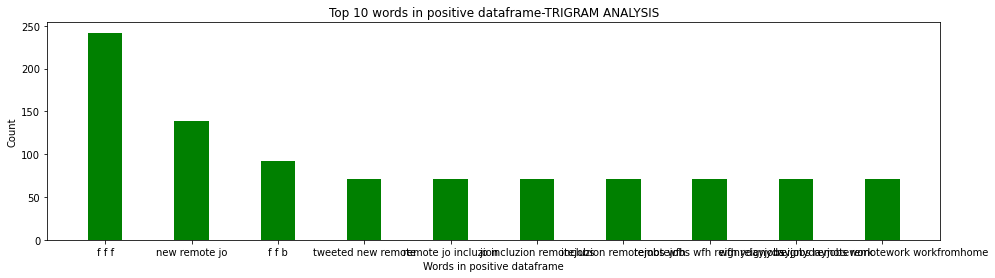

In [611]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

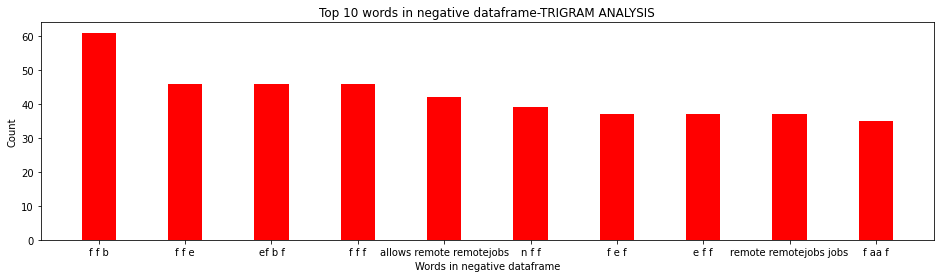

In [612]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

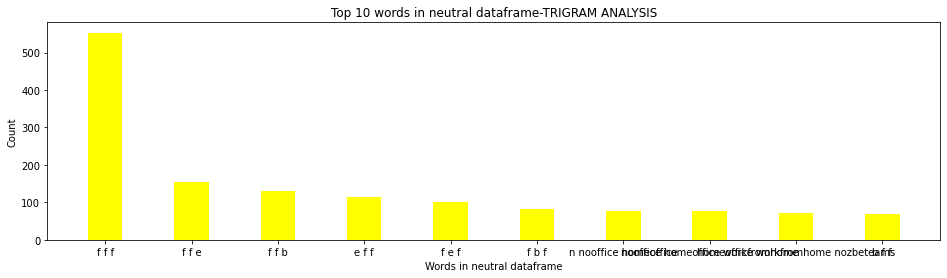

In [613]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()